#Anchor Box Calculation



In [ ]:
import matplotlib.pyplot as plt

class main:
  def __init__(self,no):
    self.num_clusters = no

   
args = main(9)

'''
Created on Feb 20, 2017
@author: jumabek
'''
from os import listdir
from os.path import isfile, join
import argparse
#import cv2
import numpy as np
import sys
import os
import shutil
import random 
import math

width_in_cfg_file = 1248.
height_in_cfg_file = 1248.

def IOU(X,centroids):
    similarities = []
    k = len(centroids)
    for centroid in centroids:
        c_x,c_y,c_z = centroid
        x,y,z = X
        inner_vol = min(x,c_x)*min(y,c_y)*min(z,c_z)
        similarity = inner_vol/((x*y*z+c_x*c_y*c_z)-inner_vol)
        similarities.append(similarity) # will become (k,) shape
    return np.array(similarities) 

def avg_IOU(X,centroids):
    n,d = X.shape
    sum = 0.
    for i in range(X.shape[0]):
        #note IOU() will return array which contains IoU for each centroid and X[i] // slightly ineffective, but I am too lazy
        sum+= max(IOU(X[i],centroids)) 
    return sum/n

def write_anchors_to_file(centroids,X,anchor_file):
    f = open(anchor_file,'w')
    
    anchors = centroids.copy()
    print(anchors.shape)

    for i in range(anchors.shape[0]):
        anchors[i][0]*=width_in_cfg_file
        anchors[i][1]*=height_in_cfg_file
        anchors[i][2]*= 5
         

    widths = anchors[:,0]+ anchors[:,1]
    sorted_indices = np.argsort(widths)

    print('Anchors = ', anchors[sorted_indices])
        
    for i in sorted_indices[:-1]:
        f.write('%0.5f,%0.5f,%0.5f, '%(anchors[i,0],anchors[i,1],anchors[i,2]))

    #there should not be comma after last anchor, that's why
    f.write('%0.5f,%0.5f,%0.5f\n'%(anchors[sorted_indices[-1:],0],anchors[sorted_indices[-1:],1],anchors[sorted_indices[-1:],2]))
    
    f.write('%f\n'%(avg_IOU(X,centroids)))
    plt.scatter(centroids.shape[0], avg_IOU(X,centroids))

def kmeans(X,centroids,eps,anchor_file):
    
    N = X.shape[0]
    iterations = 0
    k,dim = centroids.shape
    print("k,dim =",k,dim)
    prev_assignments = np.ones(N)*(-1)    
    iter = 0
    old_D = np.zeros((N,k))

    while True:
        D = [] 
        iter+=1           
        for i in range(N):
            d = 1 - IOU(X[i],centroids)
            D.append(d)
        D = np.array(D) # D.shape = (N,k)
        
        print("iter {}: dists = {}".format(iter,np.sum(np.abs(old_D-D))))
            
        #assign samples to centroids 
        assignments = np.argmin(D,axis=1)
        
        if (assignments == prev_assignments).all() :
            print("Centroids = ",centroids)
            write_anchors_to_file(centroids,X,anchor_file)
            return

        #calculate new centroids
        centroid_sums=np.zeros((k,dim),np.float)
        for i in range(N):
            centroid_sums[assignments[i]]+=X[i]        
        for j in range(k):            
            centroids[j] = centroid_sums[j]/(np.sum(assignments==j))
        
        prev_assignments = assignments.copy()     
        old_D = D.copy()  

    

annotation_dims = []

size = np.zeros((1,1,3))
file_path = '/gdrive/My Drive/data/'
for scene  in nusc.scene :
  sample_token = scene['first_sample_token']
  sample = nusc.get('sample',sample_token)
  sensor = 'LIDAR_TOP'
  lidar_top_data = nusc.get('sample_data', sample['data'][sensor])
  ego_pose = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
  for annotation in sample['anns']:
    annotation = nusc.get('sample_annotation',annotation)
    x,y,z = annotation['size']
    x = float(x) / 140.
    y = float(y) / 140.
    z = float(z) / 5.
    annotation_dims.append(tuple(map(float,(x,y,z))))
#print(annotation_dims)  
annotation_dims = np.array(annotation_dims)

eps = 0.005

if args.num_clusters == 0:
    for num_clusters in range(1,11): #we make 1 through 10 clusters 
        anchor_file = 'anchors%d.txt'%(num_clusters)

        indices = [ random.randrange(annotation_dims.shape[0]) for i in range(num_clusters)]
        centroids = annotation_dims[indices]
        kmeans(annotation_dims,centroids,eps,anchor_file)
        print('centroids.shape', centroids.shape)
else:
    anchor_file = 'anchors%d.txt'%(args.num_clusters)
    indices = [ random.randrange(annotation_dims.shape[0]) for i in range(args.num_clusters)]
    centroids = annotation_dims[indices]
    kmeans(annotation_dims,centroids,eps,anchor_file)
    print('centroids.shape', centroids.shape)



In [ ]:
from collections import Counter 

annotation_dims = []
cat = []
size = np.zeros((1,1,3))
file_path = '/gdrive/My Drive/data/'
for scene  in nusc.scene :
  sample_token = scene['first_sample_token']
  sample = nusc.get('sample',sample_token)
  sensor = 'LIDAR_TOP'
  lidar_top_data = nusc.get('sample_data', sample['data'][sensor])
  ego_pose = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
  for annotation in sample['anns']:
    annotation = nusc.get('sample_annotation',annotation)
    print(annotation['size'],annotation['category_name'])
    x,y,z = annotation['size']
    cat.append(annotation['category_name'])
    #x = float(x) / 140.
    #y = float(y) / 140.
    #z = float(z) / 5.
    annotation_dims.append(tuple(map(float,(x,y,z))))
print(annotation_dims)
d = Counter(cat)   
print(d)
print(annotation_dims[1])
print(max(x[0] for x in annotation_dims))
print(max(x[1] for x in annotation_dims))
print(max(x[2] for x in annotation_dims))
#print(sum(annotation_dims[:,1]))
#print(sum(annotation_dims[:,2]))

In [ ]:
!pip3 install terminaltables
!pip install nuscenes-devkit
!pip install turfpy
!pip install wandb

#data test

In [ ]:
import matplotlib.pyplot as plt
i = ListDataset(train_samples)


In [ ]:
img, targets = i.__getitem__(2)
dpi = 80
print(img.shape)
im_data = img.permute(1, 2, 0)
height, width, depth = 1024, 1024, 3

# What size does the figure need to be in inches to fit the image?
figsize = width / float(dpi), height / float(dpi)

# Create a figure of the right size with one axes that takes up the full figure
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])

# Hide spines, ticks, etc.
ax.axis('off')

# Display the image.
ax.imshow(im_data, cmap='gray')

plt.show()
#print(targets)

6


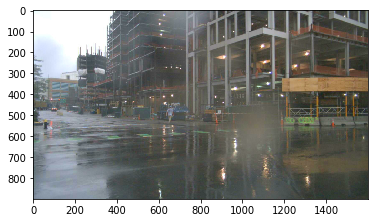

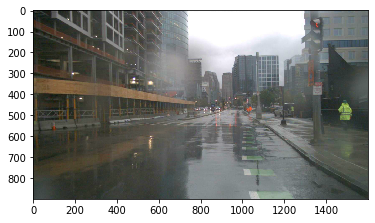

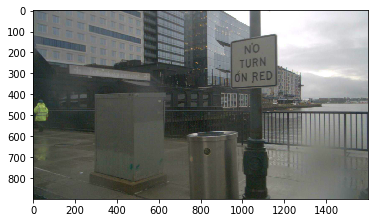

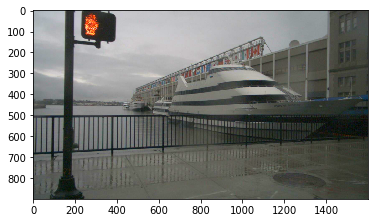

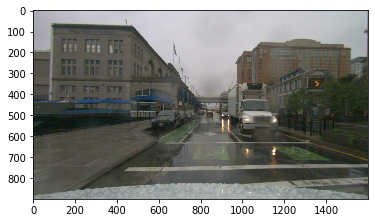

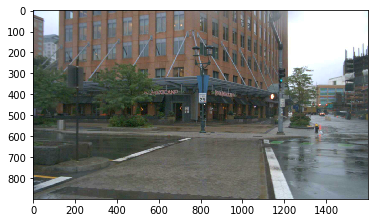

In [ ]:
img, targets = i.__getitem__(2)

#Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/data
!mkdir /content/data/samples
!mkdir /content/data/samples/CAM_FRONT
!mkdir /content/data/samples/CAM_FRONT_RIGHT
!mkdir /content/data/samples/CAM_FRONT_LEFT
!mkdir /content/data/samples/CAM_BACK
!mkdir /content/data/samples/CAM_BACK_RIGHT
!mkdir /content/data/samples/CAM_BACK_LEFT
print("Folders Made !!")

!cp /content/drive/MyDrive/data/CAM_FRONT.zip /content/data/samples/CAM_FRONT
!unzip /content/data/samples/CAM_FRONT/CAM_FRONT.zip -d /content/data/samples/CAM_FRONT/
!rm /content/data/samples/CAM_FRONT/CAM_FRONT.zip
print("Cam front copied !!")

!cp /content/drive/MyDrive/data/CAM_FRONT_LEFT.zip /content/data/samples/CAM_FRONT_LEFT
!unzip /content/data/samples/CAM_FRONT_LEFT/CAM_FRONT_LEFT.zip -d /content/data/samples/CAM_FRONT_LEFT/
!rm /content/data/samples/CAM_FRONT_LEFT/CAM_FRONT_LEFT.zip
print("Cam front left copied !!")

!cp /content/drive/MyDrive/data/CAM_FRONT_RIGHT.zip /content/data/samples/CAM_FRONT_RIGHT
!unzip /content/data/samples/CAM_FRONT_RIGHT/CAM_FRONT_RIGHT.zip -d /content/data/samples/CAM_FRONT_RIGHT
!rm /content/data/samples/CAM_FRONT_RIGHT/CAM_FRONT_RIGHT.zip
print("Cam front right copied !!")

!cp /content/drive/MyDrive/data/CAM_BACK.zip /content/data/samples/CAM_BACK
!unzip /content/data/samples/CAM_BACK/CAM_BACK.zip -d /content/data/samples/CAM_BACK
!rm /content/data/samples/CAM_BACK/CAM_BACK.zip
print("Cam back copied !!")

!cp /content/drive/MyDrive/data/CAM_BACK_LEFT.zip /content/data/samples/CAM_BACK_LEFT
!unzip /content/data/samples/CAM_BACK_LEFT/CAM_BACK_LEFT.zip -d /content/data/samples/CAM_BACK_LEFT
!rm /content/data/samples/CAM_BACK_LEFT/CAM_BACK_LEFT.zip
print("Cam back right copied !!")

!cp /content/drive/MyDrive/data/CAM_BACK_RIGHT.zip /content/data/samples/CAM_BACK_RIGHT
!unzip /content/data/samples/CAM_BACK_RIGHT/CAM_BACK_RIGHT.zip -d /content/data/samples/CAM_BACK_RIGHT
!rm /content/data/samples/CAM_BACK_RIGHT/CAM_BACK_RIGHT.zip
print("Cam back left copied !!")

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/samples/CAM_BACK_RIGHT/n015-2018-08-01-16-32-59+0800__CAM_BACK_RIGHT__1533112533177893.jpg  
  inflating: /content/data/samples/CAM_BACK_RIGHT/n008-2018-09-18-12-53-31-0400__CAM_BACK_RIGHT__1537289868528113.jpg  
  inflating: /content/data/samples/CAM_BACK_RIGHT/n015-2018-10-08-16-03-24+0800__CAM_BACK_RIGHT__1538986128427893.jpg  
  inflating: /content/data/samples/CAM_BACK_RIGHT/n015-2018-11-21-19-21-35+0800__CAM_BACK_RIGHT__1542799642527893.jpg  
  inflating: /content/data/samples/CAM_BACK_RIGHT/n008-2018-08-28-13-40-50-0400__CAM_BACK_RIGHT__1535478800178113.jpg  
  inflating: /content/data/samples/CAM_BACK_RIGHT/n015-2018-10-02-10-50-40+0800__CAM_BACK_RIGHT__1538448782677893.jpg  
  inflating: /content/data/samples/CAM_BACK_RIGHT/n015-2018-07-18-11-50-34+0800__CAM_BACK_RIGHT__1531886211777893.jpg  
  inflating: /content/data/samples/CAM_BACK_RIGHT/n008-2018-09-18-12-07-26-0400__CAM_BACK_RIGHT__153728734487

In [ ]:
!mkdir /content/data/files
#!mkdir '/content/data/files/attribute'
#!mkdir '/content/data/files/calibrated_sensor'
!mkdir '/content/data/files/category'
!mkdir '/content/data/files/ego_pose'
#!mkdir '/content/data/files/instance'
#!mkdir '/content/data/files/log'
#!mkdir '/content/data/files/map'
!mkdir '/content/data/files/sample'
!mkdir '/content/data/files/sample_annotation'
!mkdir '/content/data/files/sample_data'
!mkdir '/content/data/files/scene'
#!mkdir '/content/data/files/sensor'
!mkdir '/content/data/files/visibility'

In [ ]:
read_files = [#'/content/drive/MyDrive/data/files/attribute.json',
#'/content/drive/MyDrive/data/files/calibrated_sensor.json',
'/content/drive/MyDrive/data/files/category.json',
'/content/drive/MyDrive/data/files/ego_pose.json',
#'/content/drive/MyDrive/data/files/instance.json',
#'/content/drive/MyDrive/data/files/log.json',
#'/content/drive/MyDrive/data/files/map.json',
'/content/drive/MyDrive/data/files/sample.json',
'/content/drive/MyDrive/data/files/sample_annotation.json',
'/content/drive/MyDrive/data/files/sample_data.json',
'/content/drive/MyDrive/data/files/scene.json',
#'/content/drive/MyDrive/data/files/sensor.json',
'/content/drive/MyDrive/data/files/visibility.json']

write_files = [#'/content/data/files/attribute.json',
#'/content/data/files/calibrated_sensor.json',
'/content/data/files/category.json',
'/content/data/files/ego_pose.json',
#'/content/data/files/instance.json',
#'/content/data/files/log.json',
#'/content/data/files/map.json',
'/content/data/files/sample.json',
'/content/data/files/sample_annotation.json',
'/content/data/files/sample_data.json',
'/content/data/files/scene.json',
#'/content/data/files/sensor.json',
'/content/data/files/visibility.json']

In [ ]:
import json
import tqdm

for file_r,file_w in zip(read_files,write_files):
  with open(file_r) as file_1:
    file_1 = json.load(file_1)
  for f in tqdm.tqdm(file_1):
    with open(file_w[0:-5]+'/'+f['token']+'.json', 'w') as fout:
      json.dump(f , fout)

100%|██████████| 4/4 [00:00<00:00, 967.27it/s]


#Start off

In [ ]:
!pip3 install terminaltables
!pip install turfpy
!pip install wandb
!pip install pyquaternion

In [ ]:
#import wandb
#wandb.init()

In [ ]:
import json
import os

class Nuscenes:
  def __init__(self,data_path,):
    self.scene = []
    self.path = '/content/data/files'
    with open(data_path+"/files/scene.json") as f:
      self.scene = json.load(f)
    print(self.scene)
  
  def get(self,file,token):
    with open(self.path+"/"+file+"/"+token+".json") as f:
      return json.load(f)

nusc = Nuscenes("/content/drive/MyDrive/data")

[{'token': '73030fb67d3c46cfb5e590168088ae39', 'log_token': '6b6513e6c8384cec88775cae30b78c0e', 'nbr_samples': 40, 'first_sample_token': 'e93e98b63d3b40209056d129dc53ceee', 'last_sample_token': '40e413c922184255a94f08d3c10037e0', 'name': 'scene-0001', 'description': 'Construction, maneuver between several trucks'}, {'token': 'c3e0e9f6ee8d4170a3d22a6179f1ca3a', 'log_token': '6b6513e6c8384cec88775cae30b78c0e', 'nbr_samples': 40, 'first_sample_token': '9e28820bd2ba4eb480e1b9079f17c30c', 'last_sample_token': 'd0dc3c18dfc64c779bc9e4ee6e9e2e3b', 'name': 'scene-0002', 'description': 'Intersection, peds, waiting vehicle, parked motorcycle at parking lot'}, {'token': 'e7ef871f77f44331aefdebc24ec034b7', 'log_token': '92af2609d31445e5a71b2d895376fed6', 'nbr_samples': 40, 'first_sample_token': 'fd8420396768425eabec9bdddf7e64b6', 'last_sample_token': '20684b77c01641e7a5ada48308a0b1e1', 'name': 'scene-0003', 'description': 'Parking lot, barrier, exit parking lot'}, {'token': '25496f19ffd14bd088cb430

In [ ]:
arr = os.listdir('/content/data/files/sample_data')

nusc.get('sample_data',arr[0][:-5])

{'calibrated_sensor_token': 'fa972f3a7727463c9c6df3eee526cff0',
 'channel': 'CAM_FRONT_LEFT',
 'ego_pose_token': '1d53a42548bd40a9911eca1876a00e0d',
 'fileformat': 'jpg',
 'filename': 'samples/CAM_FRONT_LEFT/n015-2018-10-02-10-50-40+0800__CAM_FRONT_LEFT__1538448750504844.jpg',
 'height': 900,
 'is_key_frame': True,
 'next': 'e481f401dcae458b9b2582f8ced9de3d',
 'prev': '65f45fca17a64ae9a6f2401c302e1816',
 'sample_token': '7fd597745c26471ab336b3dd41a5f6dc',
 'sensor_modality': 'camera',
 'timestamp': 1538448750504844,
 'token': '1d53a42548bd40a9911eca1876a00e0d',
 'width': 1600}

In [ ]:

from __future__ import division

from terminaltables import AsciiTable

import os
import sys
import time
import datetime
import argparse

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.optim as optim

#Utils

In [ ]:
#Angle Decoder

def angle_decoder(r):
  teta1 = torch.asin(2*r[0] - 1)
  teta2 = torch.acos(2*r[1] - 1)
  teta = 0
  if 2*r[0] - 1 >= 0 and 2*r[1] - 1 >= 0:
    teta = (teta1+teta2)/2
  elif 2*r[0] - 1 >= 0 and 2*r[1] - 1 < 0:
    teta = (math.pi-teta1+teta2)/2
  elif 2*r[0] - 1 < 0 and 2*r[1] - 1 <= 0:
    teta = (math.pi - teta1+2*math.pi -teta2)/2
  elif 2*r[0] - 1 < 0 and 2*r[1] - 1 > 0:
    teta = (2*math.pi + teta1+2*math.pi - teta2)/2
  return teta

In [ ]:
#Utils

from __future__ import division
import math
import time
import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from shapely.geometry import Polygon


def to_cpu(tensor):
    return tensor.detach().cpu()

def rotate_around_point(point, radians, origin=(0, 0)):
  """Rotate a point around a given point.
  
  I call this the "low performance" version since it's recalculating
  the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
  It's more readable than the next function, though.
  """
  x, y = point
  ox, oy = origin

  qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
  qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

  return qx.item(), qy.item()

def load_classes(path):
    """
    Loads class labels at 'path'
    """
    fp = open(path, "r")
    names = fp.read().split("\n")[:-1]
    return names


def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


def rescale_boxes(boxes, current_dim, original_shape):
    """ Rescales bounding boxes to the original shape """
    orig_h, orig_w = original_shape
    # The amount of padding that was added
    pad_x = max(orig_h - orig_w, 0) * (current_dim / max(original_shape))
    pad_y = max(orig_w - orig_h, 0) * (current_dim / max(original_shape))
    # Image height and width after padding is removed
    unpad_h = current_dim - pad_y
    unpad_w = current_dim - pad_x
    # Rescale bounding boxes to dimension of original image
    boxes[:, 0] = ((boxes[:, 0] - pad_x // 2) / unpad_w) * orig_w
    boxes[:, 1] = ((boxes[:, 1] - pad_y // 2) / unpad_h) * orig_h
    boxes[:, 2] = ((boxes[:, 2] - pad_x // 2) / unpad_w) * orig_w
    boxes[:, 3] = ((boxes[:, 3] - pad_y // 2) / unpad_h) * orig_h
    return boxes


def ap_per_class(tp, conf, pred_cls, target_cls):
    """ Compute the average precision, given the recall and precision curves.
    Source: https://github.com/rafaelpadilla/Object-Detection-Metrics.
    # Arguments
        tp:    True positives (list).
        conf:  Objectness value from 0-1 (list).
        pred_cls: Predicted object classes (list).
        target_cls: True object classes (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """

    # Sort by objectness
    i = np.argsort(-conf)
    tp, conf, pred_cls = tp[i], conf[i], pred_cls[i]

    # Find unique classes
    unique_classes = np.unique(target_cls)

    # Create Precision-Recall curve and compute AP for each class
    ap, p, r = [], [], []
    for c in tqdm.tqdm(unique_classes, desc="Computing AP"):
        i = pred_cls == c
        n_gt = (target_cls == c).sum()  # Number of ground truth objects
        n_p = i.sum()  # Number of predicted objects

        if n_p == 0 and n_gt == 0:
            continue
        elif n_p == 0 or n_gt == 0:
            ap.append(0)
            r.append(0)
            p.append(0)
        else:
            # Accumulate FPs and TPs
            fpc = (1 - tp[i]).cumsum()
            tpc = (tp[i]).cumsum()

            # Recall
            recall_curve = tpc / (n_gt + 1e-16)
            r.append(recall_curve[-1])

            # Precision
            precision_curve = tpc / (tpc + fpc)
            p.append(precision_curve[-1])

            # AP from recall-precision curve
            ap.append(compute_ap(recall_curve, precision_curve))

    # Compute F1 score (harmonic mean of precision and recall)
    p, r, ap = np.array(p), np.array(r), np.array(ap)
    f1 = 2 * p * r / (p + r + 1e-16)

    return p, r, ap, f1, unique_classes.astype("int32")


def compute_ap(recall, precision):
    """ Compute the average precision, given the recall and precision curves.
    Code originally from https://github.com/rbgirshick/py-faster-rcnn.

    # Arguments
        recall:    The recall curve (list).
        precision: The precision curve (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """
    # correct AP calculation
    # first append sentinel values at the end
    mrec = np.concatenate(([0.0], recall, [1.0]))
    mpre = np.concatenate(([0.0], precision, [0.0]))

    # compute the precision envelope
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    # to calculate area under PR curve, look for points
    # where X axis (recall) changes value
    i = np.where(mrec[1:] != mrec[:-1])[0]

    # and sum (\Delta recall) * prec
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap


def get_batch_statistics(outputs, targets, iou_threshold):
    """ Compute true positives, predicted scores and predicted labels per sample """
    batch_metrics = []
    for sample_i in range(len(outputs)):

        if outputs[sample_i] is None:
            continue

        output = outputs[sample_i]   #each batch
        pred_boxes = output[:, :8]
        pred_scores = output[:, 8]
        pred_labels = output[:, -1]

        true_positives = np.zeros(pred_boxes.shape[0])

        annotations = targets[targets[:, 0] == sample_i][:, 1:]  #each batch annotation
        target_labels = annotations[:, 0] if len(annotations) else [] 
        if len(annotations):
            detected_boxes = []
            target_boxes = annotations[:, 1:]

            for pred_i, (pred_box, pred_label) in enumerate(zip(pred_boxes, pred_labels)):

                # If targets are found break
                if len(detected_boxes) == len(annotations):
                    break

                # Ignore if label is not one of the target labels
                if pred_label not in target_labels:
                    continue

                iou, box_index = bbox_iou(pred_box.unsqueeze(0), target_boxes).max(0)
                if iou >= iou_threshold and box_index not in detected_boxes:
                    true_positives[pred_i] = 1
                    detected_boxes += [box_index]
        batch_metrics.append([true_positives, pred_scores, pred_labels])
    return batch_metrics


def bbox_wh_iou(wh1, wh2):
    wh2 = wh2.t()
    w1, l1, h1 = wh1[0], wh1[1] ,wh1[2]
    w2, l2, h2 = wh2[0], wh2[1] ,wh1[2]
    inter_area = torch.min(w1, w2) * torch.min(l1, l2) * torch.min(h1, h2)
    union_area = (w1 * l1 * h1 + 1e-16) + (w2 * l2 * h2) - inter_area
    return inter_area / union_area



def bbox_iou(box1, box2):
    """
    Returns the IoU of two bounding boxes
    """
    #print("box shapes",box1.shape,box2.shape)
    iou_scores = []
    # Transform from center and width to exact coordinates
    b1_x1, b1_x3 = box1[:,0] - box1[:,3] / 2, box1[:,0] + box1[:,3] / 2
    b1_y1, b1_y3 = box1[:,1] - box1[:,4] / 2, box1[:,1] + box1[:,4] / 2
    b1_x2, b1_x4 = b1_x3, b1_x1
    b1_y2, b1_y4 = b1_y1, b1_y3
    #b1_z1, b1_z3 = box1[2] - box1[5] / 2, box1[2] + box1[5] / 2
    b2_x1, b2_x3 = box2[:,0] - box2[:,3] / 2, box2[:,0] + box2[:,3] / 2
    b2_x2, b2_x4 = b2_x3, b2_x1
    b2_y1, b2_y3 = box2[:,1] - box2[:,4] / 2, box2[:,1] + box2[:,4] / 2
    b2_y2, b2_y4 = b2_y1, b2_y3
    #b2_z1, b2_z3 = box2[2] - box2[5] / 2, box2[2] + box2[5] / 2

    rotation1 = [angle_decoder(r[6:8]) for r in box1]
    rotation2 = [angle_decoder(r[6:8]) for r in box2]
    


    if box1.shape == box2.shape:
      #print("in 1")
      for x11,x12,x13,x14,y11,y12,y13,y14,x21,x22,x23,x24,y21,y22,y23,y24,r1,r2, b1,b2 in zip(b1_x1,b1_x2,b1_x3,b1_x4, b1_y1,b1_y2,b1_y3,b1_y4, b2_x1,b2_x2,b2_x3,b2_x4, b2_y1,b2_y2,b2_y3,b2_y4, rotation1,rotation2, box1,box2):
        p1 = Polygon([rotate_around_point((x11, y11), r1, (b1[0], b1[1])),
             rotate_around_point((x12, y12), r1, (b1[0], b1[1])),
             rotate_around_point((x13, y13), r1, (b1[0], b1[1])),
             rotate_around_point((x14, y14), r1, (b1[0], b1[1]))])
        p2 = Polygon([rotate_around_point((x21, y21), r2, (b2[0], b2[1])),
             rotate_around_point((x22, y22), r2, (b2[0], b2[1])),
             rotate_around_point((x23, y23), r2, (b2[0], b2[1])),
             rotate_around_point((x24, y24), r2, (b2[0], b2[1]))])
        p3 = p1.intersection(p2)
        inter_area = p3.area
        b1_area = p1.area
        b2_area = p2.area

        iou = inter_area / (b1_area + b2_area - inter_area + 1e-16)
        iou_scores.append(iou)

      return torch.Tensor(iou_scores).to(device)
    else:
      #print("in 2")
      x11,x12,x13,x14, y11,y12,y13,y14 = b1_x1[0],b1_x2[0],b1_x3[0],b1_x4[0], b1_y1[0],b1_y2[0],b1_y3[0],b1_y4[0]
      r1, b1 = rotation1[0], box1[0]
      for x21,x22,x23,x24,y21,y22,y23,y24,r2 ,b2 in zip(b2_x1,b2_x2,b2_x3,b2_x4, b2_y1,b2_y2,b2_y3,b2_y4, rotation2, box2):
        p1 = Polygon([rotate_around_point((x11, y11), r1, (b1[0], b1[1])),
             rotate_around_point((x12, y12), r1, (b1[0], b1[1])),
             rotate_around_point((x13, y13), r1, (b1[0], b1[1])),
             rotate_around_point((x14, y14), r1, (b1[0], b1[1]))])
        p2 = Polygon([rotate_around_point((x21, y21), r2, (b2[0], b2[1])),
             rotate_around_point((x22, y22), r2, (b2[0], b2[1])),
             rotate_around_point((x23, y23), r2, (b2[0], b2[1])),
             rotate_around_point((x24, y24), r2, (b2[0], b2[1]))])
        p3 = p1.intersection(p2)
        inter_area = p3.area
        b1_area = p1.area
        b2_area = p2.area

        iou = inter_area / (b1_area + b2_area - inter_area + 1e-16)
        iou_scores.append(iou)
        #print("iou = ",iou,"iou_scores.shape :",len(iou_scores))

      return torch.Tensor(iou_scores).to(device)

def non_max_suppression(prediction, conf_thres=0.5, nms_thres=0.5):
    """
    Removes detections with lower object confidence score than 'conf_thres' and performs
    Non-Maximum Suppression to further filter detections.
    Returns detections with shape:
        (x1, y1, x2, y2, object_conf, class_score, class_pred)
    """

    # From (center x, center y, width, height) to (x1, y1, x2, y2)
    output = [None for _ in range(len(prediction))]
    for image_i, image_pred in enumerate(prediction):
        # Filter out confidence scores below threshold
        image_pred = image_pred[image_pred[:, 8] >= conf_thres]
        # If none are remaining => process next image
        if not image_pred.size(0):
            continue
        # Object confidence times class confidence
        score = image_pred[:, 8] * image_pred[:, 9:].max(1)[0]
        # Sort by it
        image_pred = image_pred[(-score).argsort()]
        class_confs, class_preds = image_pred[:, 9:].max(1, keepdim=True)
        detections = torch.cat((image_pred[:, :9], class_confs.float(), class_preds.float()), 1)
        # Perform non-maximum suppression
        keep_boxes = []
        while detections.size(0):
            #print("bbox :",bbox_iou(detections[0, :8].unsqueeze(0), detections[:, :8]))
            large_overlap = bbox_iou(detections[0, :8].unsqueeze(0), detections[:, :8]) > nms_thres
            #print("detection.size:",detections.size())
            label_match = detections[0, -1] == detections[:, -1]
            label_match = label_match.cuda()
            # Indices of boxes with lower confidence scores, large IOUs and matching labels
            invalid = large_overlap & label_match
            weights = detections[invalid, 8:9]
            # Merge overlapping bboxes by order of confidence
            detections[0, :8] = (weights * detections[invalid, :8]).sum(0) / weights.sum()
            keep_boxes += [detections[0]]
            detections = detections[~invalid]
        if keep_boxes:
            output[image_i] = torch.stack(keep_boxes)

    return output


def build_targets(pred_boxes, pred_cls, target, anchors, ignore_thres):
    ByteTensor = torch.cuda.BoolTensor if pred_boxes.is_cuda else torch.BoolTensor
    FloatTensor = torch.cuda.FloatTensor if pred_boxes.is_cuda else torch.FloatTensor

    nB = pred_boxes.size(0)
    nA = pred_boxes.size(1)
    nC = pred_cls.size(-1)
    nG = pred_boxes.size(2)
    
    obj_mask = ByteTensor(nB, nA, nG, nG).fill_(0)
    noobj_mask = ByteTensor(nB, nA, nG, nG).fill_(1)
    class_mask = FloatTensor(nB, nA, nG, nG).fill_(0)
    iou_scores = FloatTensor(nB, nA, nG, nG).fill_(0)
    tx = FloatTensor(nB, nA, nG, nG).fill_(0)
    ty = FloatTensor(nB, nA, nG, nG).fill_(0)
    tz = FloatTensor(nB, nA, nG, nG).fill_(0)
    tw = FloatTensor(nB, nA, nG, nG).fill_(0)
    tl = FloatTensor(nB, nA, nG, nG).fill_(0)
    th = FloatTensor(nB, nA, nG, nG).fill_(0)
    tr1 = FloatTensor(nB, nA, nG, nG).fill_(0)
    tr2 = FloatTensor(nB, nA, nG, nG).fill_(0)
    tcls = FloatTensor(nB, nA, nG, nG, nC).fill_(0)
    
    target_boxes = target[:, 2:10]
    target_boxes[:, :2] = target_boxes[:, :2] * nG
    target_boxes[:, 3:5] = target_boxes[:, 3:5] * nG
    target_boxes[:, 5] = target_boxes[:, 5] * 5

    gxy = target_boxes[:, :2]
    gwlh = target_boxes[:, 3:6]

    ious = torch.stack([bbox_wh_iou(anchor, gwlh) for anchor in anchors]) #here
    try:
      best_ious, best_n = ious.max(0)
      #print("ious shape :",ious.shape)
      #print("ious :", ious)
      #print("Best_ious shape :", best_ious.shape)
      #print("Best_ious :", best_ious)
      #print("Best_n shape :", best_n.shape)
      #print("Best_n :", best_n)


    except:
      best_ious, best_n = torch.LongTensor(0), torch.LongTensor(0)
      #tconf = obj_mask.float()
      #return iou_scores, class_mask, obj_mask, noobj_mask, tx, ty, tz, tw, tl, th, tr1, tr2, tcls, tconf
      pass

    b, target_labels = target[:, :2].long().t()
    
    gx, gy = gxy.t()
    gw, gl, gh = gwlh.t()
    gi, gj = gxy.long().t()
    
    # Set masks
    obj_mask[b, best_n, gj, gi] = 1
    noobj_mask[b, best_n, gj, gi] = 0

    # Set noobj mask to zero where iou exceeds ignore threshold
    for i, anchor_ious in enumerate(ious.t()):
        noobj_mask[b[i], anchor_ious > ignore_thres, gj[i], gi[i]] = 0

    # Coordinates
    tx[b, best_n, gj, gi] = gx - gx.floor()
    ty[b, best_n, gj, gi] = gy - gy.floor()
    tz[b, best_n, gj, gi] = target_boxes[:,2]
    # Width and height
    tw[b, best_n, gj, gi] = torch.log(gw / anchors[best_n][:, 0] + 1e-16)
    tl[b, best_n, gj, gi] = torch.log(gl / anchors[best_n][:, 1] + 1e-16)
    th[b, best_n, gj, gi] = torch.log(gh / anchors[best_n][:, 2] + 1e-16)
    
    tr1[b, best_n, gj, gi] = target_boxes[:,6]
    tr2[b, best_n, gj, gi] = target_boxes[:,7]
    # One-hot encoding of label
    tcls[b, best_n, gj, gi, target_labels] = 1
    # Compute label correctness and iou at best anchor
    try:
      class_mask[b, best_n, gj, gi] = (pred_cls[b, best_n, gj, gi].argmax(-1) == target_labels).float()
    except:
      pass
    tconf = obj_mask.float()
    target_boxes[:, :2] = target_boxes[:, :2] / nG
    target_boxes[:, 3:5] = target_boxes[:, 3:5] / nG
    target_boxes[:, 5] = target_boxes[:, 5] / 5
    return class_mask, obj_mask, noobj_mask, tx, ty, tz, tw, tl, th, tr1, tr2, tcls, tconf


In [ ]:
#Parse_config

def parse_model_config(path):
    """Parses the yolo-v3 layer configuration file and returns module definitions"""
    file = open(path, 'r')
    lines = file.read().split('\n')
    lines = [x for x in lines if x and not x.startswith('#')]
    lines = [x.rstrip().lstrip() for x in lines] # get rid of fringe whitespaces
    module_defs = []
    for line in lines:
        if line.startswith('['): # This marks the start of a new block
            module_defs.append({})
            module_defs[-1]['type'] = line[1:-1].rstrip()
            if module_defs[-1]['type'] == 'convolutional':
                module_defs[-1]['batch_normalize'] = 0
        else:
            key, value = line.split("=")
            value = value.strip()
            module_defs[-1][key.rstrip()] = value.strip()

    return module_defs

def parse_data_config(path):
    """Parses the data configuration file"""
    options = dict()
    options['gpus'] = '0,1,2,3'
    options['num_workers'] = '10'
    with open(path, 'r') as fp:
        lines = fp.readlines()
    for line in lines:
        line = line.strip()
        if line == '' or line.startswith('#'):
            continue
        key, value = line.split('=')
        options[key.strip()] = value.strip()
    return options


In [ ]:
#Draw
def draw(targets, ax = None):
  flag = False
  if ax == None:
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    flag = True
  for target in targets:
    rotation = angle_decoder(target[6:8]) + math.pi/2
    length = target[3]
    width = target[4]
    x_temp, y_temp = rotate_around_point((target[0],-target[1]), -(rotation), origin=(target[0]-width/2, -target[1] - length/2))
    x_offset, y_offset = x_temp - target[0], y_temp + target[1]
    rectas = patches.Rectangle(xy=((target[0]-width/2) - x_offset, (-target[1] - length/2) - y_offset) ,width=width, height=length, angle = (rotation)*180/math.pi, linewidth=1, color='blue', fill=False)
    ax.add_patch(rectas)
    ax.scatter(target[0], -target[1], color = 'red', s=10)
  ax.scatter(0.5, -0.5)
  plt.xlim(0, 1)
  plt.ylim(-1,0)
  if flag:
    plt.show()
  return ax

In [ ]:
#Dataset

import glob
import random
import os
import sys
import numpy as np
from PIL import Image, ImageEnhance
import torch
import torch.nn.functional as F
from pyquaternion import Quaternion
import math
import json
from random import randint

from torch.utils.data import Dataset
import torchvision.transforms as transforms


def pad_to_square(img, pad_value):
    c, h, w = img.shape
    dim_diff = np.abs(h - w)
    # (upper / left) padding and (lower / right) padding
    pad1, pad2 = dim_diff // 2, dim_diff - dim_diff // 2
    # Determine padding
    pad = (0, 0, pad1, pad2) if h <= w else (pad1, pad2, 0, 0)
    # Add padding
    img = F.pad(img, pad, "constant", value=pad_value)

    return img, pad


def resize(image, size):
    image = F.interpolate(image.unsqueeze(0), size=size, mode="nearest").squeeze(0)
    return image


def random_resize(images, min_size=288, max_size=448):
    new_size = random.sample(list(range(min_size, max_size + 1, 32)), 1)[0]
    images = F.interpolate(images, size=new_size, mode="nearest")
    return images


class ImageFolder(Dataset):
    def __init__(self, folder_path, img_size=1248):
        self.files = sorted(glob.glob("%s/*.*" % folder_path))
        self.img_size = img_size

    def __getitem__(self, index):
        img_path = self.files[index % len(self.files)]
        # Extract image as PyTorch tensor
        img = transforms.ToTensor()(Image.open(img_path))
        # Pad to square resolution
        img, _ = pad_to_square(img, 0)
        # Resize
        img = resize(img, self.img_size)

        return img_path, img

    def __len__(self):
        return len(self.files)


class ListDataset(Dataset):
    def __init__(self, sample_mapping, img_size=1248, camera_blackout_augment=True, image_augment = True, multiscale=False, normalized_labels=False, max_height=5, max_length=20, max_width=20):
       
        self.img_size = img_size
        self.max_objects = 100
        self.augment = camera_blackout_augment
        self.image_augment = image_augment
        self.multiscale = multiscale
        self.normalized_labels = normalized_labels
        self.min_size = self.img_size - 3 * 32
        self.max_size = self.img_size + 3 * 32
        self.batch_count = 0
        self.sample_mapping = sample_mapping
        self.file_path = 'data/'
        

        #get categories
        self.categories = ['human','animal','car','motorcycle','bicycle','bus','truck','construction_vehicle','trailer']
        self.categories_map = {'human.pedestrian.adult':'human',
        'human.pedestrian.child':'human',
        'human.pedestrian.wheelchair':'human',
        'human.pedestrian.stroller':'human',
        'human.pedestrian.personal_mobility':'human',
        'human.pedestrian.police_officer':'human',
        'human.pedestrian.construction_worker':'human',
        'animal':'animal',
        'vehicle.car':'car',
        'vehicle.emergency.police':'car',
        'vehicle.motorcycle':'motorcycle',
        'vehicle.bicycle':'bicycle',
        'vehicle.bus.bendy':'bus',
        'vehicle.bus.rigid':'bus',
        'vehicle.truck':'truck',
        'vehicle.construction':'construction_vehicle',
        'vehicle.trailer':'trailer'}
        self.num_category = len(self.categories)
        
        #important items for tweking
        self.max_height = max_height
        self.max_width = max_width
        self.max_length = max_length

    def quaternion_yaw(self, q: Quaternion) -> float:
      """
      Calculate the yaw angle from a quaternion.
      See https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles.
      :param q: Quaternion of interest.
      :return: Yaw angle in radians.
      """

      a = 2.0 * (q[0] * q[3] + q[1] * q[2])
      b = 1.0 - 2.0 * (q[2] ** 2 + q[3] ** 2)

      return np.arctan2(a, b)

    def rotate_around_point_lowperf(self, point, radians, origin=(0, 0)):
      """Rotate a point around a given point.
      
      I call this the "low performance" version since it's recalculating
      the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
      It's more readable than the next function, though.
      """
      x, y = point
      ox, oy = origin

      qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
      qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

      return qx, qy

    def convert_to_top_corner(self, point):
      """Convert the position with respect to the top left corner"""
      point[0] = self.max_length + point[0]
      point[1] = self.max_width - point[1]
      return point

    def check_cameraregion(self,coordinates,cameras,sample,verbose = False):
      """To check if the coordinate of the object lies in blacked out camera region
       and if so return flag as 0"""
      if verbose:
        print("Start of Checking for the point :",coordinates)
      angle = 0
      flag = False
      for camera in cameras:
        flag = False
        sample_data = nusc.get('sample_data',sample['data'][camera])
        sensor = nusc.get('calibrated_sensor',sample_data['calibrated_sensor_token'])
        if camera == 'CAM_BACK':
          angle = 55/180 * math.pi
        else :
          angle = 35/180 * math.pi
        if verbose:
          print("Sensor before rotation:", sensor['translation'][0:2])
        x, y = self.rotate_around_point_lowperf(sensor['translation'][0:2], -math.pi/2)
        if verbose:
          print("Sensor after rotation:", x,y)
        rotation = self.quaternion_yaw(sensor['rotation']) +math.pi
        vl = coordinates[1] - y - math.tan(rotation+angle) * (coordinates[0]-x)
        vr = coordinates[1] - y - math.tan(rotation-angle) * (coordinates[0]-x)
        if verbose:
          print(camera,"Angles :",(rotation+angle)*180/math.pi,(rotation-angle)*180/math.pi)
        if (rotation + angle >= math.pi/2 and rotation + angle <= math.pi*3/2):
          if vl >= 0:
            flag = True
        else:
          if vl <= 0:
            flag = True
        if flag:
          if (rotation - angle >= math.pi/2 and rotation - angle <= math.pi*3/2):
            if vr <= 0:
              flag = True
              break
            else:
              flag = False
          else:
            if vr >= 0:
              flag = True
              break
            else:
              flag = False
      return flag

    def __getitem__(self, index):

        token = self.sample_mapping[index]
        my_sample = nusc.get('sample',token)
        
        # ---------
        #  Image
        # ---------

        camera = ['CAM_FRONT_LEFT','CAM_FRONT','CAM_FRONT_RIGHT', 'CAM_BACK_RIGHT','CAM_BACK','CAM_BACK_LEFT']

        blackout_cameras = []

        #Augmentation using camera blackout
        if self.augment:
          if np.random.random() < 0.3:
            numbers = [1,2,3,4,5]
            number = random.choice(numbers)
            blackout_cameras = random.sample(camera,number)

        flag = False
        if self.image_augment :
          if np.random.random() < 0.5:
            flag = True
            choice = randint(1, 6)

        #Camera image stitching and applying blackout from the selected cameras
        for i, c in enumerate(camera):
          sample_data = nusc.get('sample_data',my_sample['data'][c])
          image = Image.open(self.file_path + sample_data['filename']).convert('RGB')
          
          if flag :
            if choice == 1:
              enhancer = ImageEnhance.Contrast(image)
              factor = 0.7 #gives original image
              image = enhancer.enhance(factor)
            if choice == 2:
              enhancer = ImageEnhance.Contrast(image)
              factor = 1.3 #gives original image
              image = enhancer.enhance(factor)
            if choice == 3:
              enhancer = ImageEnhance.Sharpness(image)
              factor = -3.5 #gives original image
              image = enhancer.enhance(factor)
            if choice == 4:
              enhancer = ImageEnhance.Sharpness(image)
              factor = 5 #gives original image
              image = enhancer.enhance(factor)
            if choice == 5:
              enhancer = ImageEnhance.Color(image)
              factor = 0.6 #gives original image
              image = enhancer.enhance(factor)
            if choice == 6:
              enhancer = ImageEnhance.Color(image)
              factor = 2 #gives original image
              image = enhancer.enhance(factor)


          data = transforms.ToTensor()(image)
          #plt.imshow( data.permute(1, 2, 0) )
          #plt.show()
          if i % 2 != 0 :
            data = torch.flip(data, [-1])
            #print("fliped")
            #plt.imshow( data.permute(1, 2, 0) ) 
            #plt.show()
          if c in blackout_cameras:
            data = torch.rand(data.shape)
          if c == 'CAM_FRONT_LEFT':
            image_data = data
          else:
            image_data = torch.cat((image_data,data),0)
          #print("Current image shape :", image_data.shape)

        image_data, _ = pad_to_square(image_data,0)
        #print("Current image shape :", image_data.shape)

        
        # ---------
        #  Label
        # ---------

        l_factor, w_factor, h_factor = (self.max_length, self.max_width, self.max_height) if self.normalized_labels else (1, 1, 1)
        targets = None


        annos_list = my_sample['anns']
        converted_anotations = []
        #ego pose
        sensor = 'LIDAR_TOP'
        lidar_top_data = nusc.get('sample_data', my_sample['data'][sensor])
        ego_pose = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
        ego_yaw = self.quaternion_yaw(ego_pose['rotation']) - math.pi/2

        boxes = []
        t=[]
        original_ego_yaw = ego_yaw + math.pi/2 #converting back to original value

        for annos in annos_list:
          annotation = nusc.get('sample_annotation', annos)
          vis = nusc.get('visibility',annotation['visibility_token'])
          vis = vis['level'][1:].split("-")
          if int(vis[1]) <= 40 :
            continue
          #print(vis)
          box = []

          #xyz
          flag = False
          cordinates = [annotation['translation'][i] - ego_pose['translation'][i] for i in range(3)]
          cordinates[0], cordinates[1] = self.rotate_around_point_lowperf(cordinates[:2], ego_yaw, origin=(0, 0))
          if self.augment :
            flag = self.check_cameraregion(cordinates,blackout_cameras,my_sample)
          cordinates = self.convert_to_top_corner(cordinates)
          if cordinates[0] > 2*self.max_width or cordinates[0] < 0 or cordinates[1] > 2*self.max_length or cordinates[1] < 0 or flag:# or (self.augment and self.check_cameraregion() == 0):
            continue

          #whl
          size = annotation['size']

          #angle r1, r2
            #converting to relative angle (0-360)
          rotation_yaw = self.quaternion_yaw(annotation['rotation']) - original_ego_yaw
          if rotation_yaw < 0:
            rotation_yaw += math.pi*2
          r1 = (1 + math.sin(rotation_yaw))/2
          r2 = (1 + math.cos(rotation_yaw))/2

          #category
          try:
            category_index = self.categories.index(self.categories_map[annotation['category_name']])
          except:
            continue
          
          #Appending to Box
          box.append(category_index)
          for i,j in zip(cordinates, [self.max_width*2, self.max_length*2, self.max_height]):
            box.append(i/j)
          for i,j in zip(size, [self.max_width*2, self.max_length*2, self.max_height]):
            box.append(i/j)
          box.append(r1)
          box.append(r2)

          #Appending to Boxes
          boxes.append(box)
          t.append(annos)

        boxes = torch.Tensor(boxes)

        targets = torch.zeros((len(boxes), 10))
        if len(boxes)> 0:
          targets[:, 1:] = boxes

        # Apply augmentations
        #if self.augment:
        #  image_data, targets = horisontal_flip(image_data, targets, Verbose = True)
        #    if np.random.random() < 0.5:
        return image_data, targets

    def collate_fn(self, batch):
        imgs, targets = list(zip(*batch))
        # Remove empty placeholder targets
        targets = [boxes for boxes in targets if boxes is not None]
        # Add sample index to targets
        for i, boxes in enumerate(targets):
            targets[i][:, 0] = i
        targets = torch.cat(targets, 0)
        """
        # Selects new image size every tenth batch
        if self.multiscale and self.batch_count % 10 == 0:
            self.img_size = random.choice(range(self.min_size, self.max_size + 1, 32))
        """
        # Resize images to input shape
        imgs = torch.stack([resize(img, 416) for img in imgs])
        self.batch_count += 1
        
        return imgs, targets

    def __len__(self):
        return len(self.sample_mapping)


#MODEL.py

In [ ]:
#MODEL

from __future__ import division

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.patches as patches


def create_modules(module_defs):
    """
    Constructs module list of layer blocks from module configuration in module_defs
    """
    hyperparams = module_defs.pop(0)
    output_filters = [int(hyperparams["channels"])]
    module_list = nn.ModuleList()
    for module_i, module_def in enumerate(module_defs):
        modules = nn.Sequential()

        if module_def["type"] == "convolutional":
            bn = int(module_def["batch_normalize"])
            filters = int(module_def["filters"])
            kernel_size = int(module_def["size"])
            pad = (kernel_size - 1) // 2
            modules.add_module(
                f"conv_{module_i}",
                nn.Conv2d(
                    in_channels=output_filters[-1],
                    out_channels=filters,
                    kernel_size=kernel_size,
                    stride=int(module_def["stride"]),
                    padding=pad,
                    bias=not bn,
                ),
            )
            if bn:
                modules.add_module(f"batch_norm_{module_i}", nn.BatchNorm2d(filters, momentum=0.9, eps=1e-5))
            if module_def["activation"] == "leaky":
                modules.add_module(f"leaky_{module_i}", nn.LeakyReLU(0.1))

        elif module_def["type"] == "maxpool":
            kernel_size = int(module_def["size"])
            stride = int(module_def["stride"])
            if kernel_size == 2 and stride == 1:
                modules.add_module(f"_debug_padding_{module_i}", nn.ZeroPad2d((0, 1, 0, 1)))
            maxpool = nn.MaxPool2d(kernel_size=kernel_size, stride=stride, padding=int((kernel_size - 1) // 2))
            modules.add_module(f"maxpool_{module_i}", maxpool)

        elif module_def["type"] == "upsample":
            upsample = Upsample(scale_factor=int(module_def["stride"]), mode="nearest")
            modules.add_module(f"upsample_{module_i}", upsample)

        elif module_def["type"] == "route":
            layers = [int(x) for x in module_def["layers"].split(",")]
            filters = sum([output_filters[1:][i] for i in layers])
            modules.add_module(f"route_{module_i}", EmptyLayer())

        elif module_def["type"] == "shortcut":
            filters = output_filters[1:][int(module_def["from"])]
            modules.add_module(f"shortcut_{module_i}", EmptyLayer())

        elif module_def["type"] == "yolo":
            anchor_idxs = [int(x) for x in module_def["mask"].split(",")]
            # Extract anchors
            anchors = [float(x) for x in module_def["anchors"].split(",")]
            anchors = [(anchors[i], anchors[i + 1], anchors[i + 2]) for i in range(0, len(anchors), 3)]
            anchors = [anchors[i] for i in anchor_idxs]
            num_classes = int(module_def["classes"])
            img_size = int(hyperparams["height"])
            # Define detection layer
            yolo_layer = YOLOLayer(anchors, num_classes, img_size)
            modules.add_module(f"yolo_{module_i}", yolo_layer)
        # Register module list and number of output filters
        module_list.append(modules)
        output_filters.append(filters)

    return hyperparams, module_list


class Upsample(nn.Module):
    """ nn.Upsample is deprecated """

    def __init__(self, scale_factor, mode="nearest"):
        super(Upsample, self).__init__()
        self.scale_factor = scale_factor
        self.mode = mode

    def forward(self, x):
        x = F.interpolate(x, scale_factor=self.scale_factor, mode=self.mode)
        return x


class EmptyLayer(nn.Module):
    """Placeholder for 'route' and 'shortcut' layers"""

    def __init__(self):
        super(EmptyLayer, self).__init__()


class YOLOLayer(nn.Module):
    """Detection layer"""

    def __init__(self, anchors, num_classes, img_dim=416):
        super(YOLOLayer, self).__init__()
        self.anchors = anchors
        self.num_anchors = len(anchors)
        self.num_classes = num_classes
        self.ignore_thres = 0.5
        self.mse_loss = nn.MSELoss()
        self.bce_loss = nn.BCELoss()
        self.obj_scale = 1
        self.noobj_scale = 100
        self.metrics = {}
        self.img_dim = img_dim
        self.grid_size = 0  # grid size

    def compute_grid_offsets(self, grid_size, cuda=True):
        self.grid_size = grid_size
        g = self.grid_size
        FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
        stride = 1248 / self.grid_size
        self.stride = self.img_dim / self.grid_size
        # Calculate offsets for each grid
        self.grid_x = torch.arange(g).repeat(g, 1).view([1, 1, g, g]).type(FloatTensor)
        self.grid_y = torch.arange(g).repeat(g, 1).t().view([1, 1, g, g]).type(FloatTensor)
        self.scaled_anchors = FloatTensor([(a_w / stride, a_l / stride, a_h ) for a_w, a_l, a_h in self.anchors])
        self.anchor_w = self.scaled_anchors[:, 0:1].view((1, self.num_anchors, 1, 1))
        self.anchor_l = self.scaled_anchors[:, 1:2].view((1, self.num_anchors, 1, 1))
        self.anchor_h = self.scaled_anchors[:, 2:3].view((1, self.num_anchors, 1, 1))

    def forward(self, x, targets=None, img_dim=None):

        # Tensors for cuda support
        FloatTensor = torch.cuda.FloatTensor if x.is_cuda else torch.FloatTensor
        LongTensor = torch.cuda.LongTensor if x.is_cuda else torch.LongTensor
        ByteTensor = torch.cuda.BoolTensor if x.is_cuda else torch.BoolTensor

        self.img_dim = img_dim
        num_samples = x.size(0)
        grid_size = x.size(2)
        prediction = (
            x.view(num_samples, self.num_anchors, self.num_classes + 9, grid_size, grid_size)
            .permute(0, 1, 3, 4, 2)
            .contiguous()
        )

        # Get outputs
        x = torch.sigmoid(prediction[..., 0])  # Center x
        y = torch.sigmoid(prediction[..., 1])  # Center y
        z = torch.sigmoid(prediction[..., 2])  # Center z
        l = prediction[..., 3]  # Length
        w = prediction[..., 4]  # Width
        h = prediction[..., 5]  # Height
        r1 = torch.sigmoid(prediction[..., 6])  # Rotation r1
        r2 = torch.sigmoid(prediction[..., 7])  # Rotation r2
        pred_conf = torch.sigmoid(prediction[..., 8])  # Conf
        pred_cls = torch.sigmoid(prediction[..., 9:])  # Cls pred.
        
        # If grid size does not match current we compute new offsets
        if grid_size != self.grid_size:
            self.compute_grid_offsets(grid_size, cuda=x.is_cuda)
        # Add offset and scale with anchors
        pred_boxes = FloatTensor(prediction[..., :8].shape)
        pred_boxes[..., 0] = x.data + self.grid_x
        pred_boxes[..., 1] = y.data + self.grid_y
        pred_boxes[..., 2] = z.data
        pred_boxes[..., 3] = torch.exp(w.data) * self.anchor_w
        pred_boxes[..., 4] = torch.exp(l.data) * self.anchor_l
        pred_boxes[..., 5] = torch.exp(h.data) * self.anchor_h
        pred_boxes[..., 6] = r1.data
        pred_boxes[..., 7] = r2.data

        replacement = pred_boxes.view(num_samples, -1, 8)
        replacement[...,:2] = replacement[...,:2] * self.stride
        replacement[...,2] = replacement[...,2] * 5
        replacement[...,3:5] = replacement[...,3:5] * self.stride
        replacement[...,5] = replacement[...,5]
        replacement[...,6] = replacement[...,6]
        replacement[...,7] = replacement[...,7]


        output = torch.cat(
            (
                replacement,
                pred_conf.view(num_samples, -1, 1),
                pred_cls.view(num_samples, -1, self.num_classes),
            ),
            -1,
        )

        if targets is None:
            return output, 0
        else:
            class_mask, obj_mask, noobj_mask, tx, ty, tz, tw, tl, th, tr1, tr2, tcls, tconf = build_targets(
                pred_boxes=pred_boxes,
                pred_cls=pred_cls,
                target=targets,
                anchors=self.scaled_anchors,
                ignore_thres=self.ignore_thres,
            )
            # Loss : Mask outputs to ignore non-existing objects (except with conf. loss)
            loss_x = self.mse_loss(x[obj_mask], tx[obj_mask])
            loss_y = self.mse_loss(y[obj_mask], ty[obj_mask])
            loss_z = self.mse_loss(z[obj_mask], tz[obj_mask])
            loss_w = self.mse_loss(w[obj_mask], tw[obj_mask])
            loss_l = self.mse_loss(l[obj_mask], tl[obj_mask])
            loss_h = self.mse_loss(h[obj_mask], th[obj_mask])
            loss_r1 = self.mse_loss(r1[obj_mask], tr1[obj_mask])
            loss_r2 = self.mse_loss(r2[obj_mask], tr2[obj_mask])
            loss_conf_obj = self.bce_loss(pred_conf[obj_mask], tconf[obj_mask])
            loss_conf_noobj = self.bce_loss(pred_conf[noobj_mask], tconf[noobj_mask])
            loss_conf = self.obj_scale * loss_conf_obj + self.noobj_scale * loss_conf_noobj
            loss_cls = self.bce_loss(pred_cls[obj_mask], tcls[obj_mask])
            total_loss = loss_x + loss_y + loss_z + loss_w + loss_l + loss_h + loss_r1 + loss_r2 + loss_conf + loss_cls


            return output, total_loss


class Darknet(nn.Module):
    """YOLOv3 object detection model"""

    def __init__(self, config_path, img_size=416):
        super(Darknet, self).__init__()
        self.module_defs = parse_model_config(config_path)
        self.hyperparams, self.module_list = create_modules(self.module_defs)
        self.yolo_layers = [layer[0] for layer in self.module_list if hasattr(layer[0], "metrics")]
        self.img_size = img_size
        self.seen = 0
        self.header_info = np.array([0, 0, 0, self.seen, 0], dtype=np.int32)

    def forward(self, x, targets=None):
        img_dim = x.shape[2]
        loss = 0
        layer_outputs, yolo_outputs = [], []
        for i, (module_def, module) in enumerate(zip(self.module_defs, self.module_list)):
            if module_def["type"] in ["convolutional", "upsample", "maxpool"]:
                x = module(x)
            elif module_def["type"] == "route":
                x = torch.cat([layer_outputs[int(layer_i)] for layer_i in module_def["layers"].split(",")], 1)
            elif module_def["type"] == "shortcut":
                layer_i = int(module_def["from"])
                x = layer_outputs[-1] + layer_outputs[layer_i]
            elif module_def["type"] == "yolo":
                x, layer_loss = module[0](x, targets, img_dim)
                loss += layer_loss
                yolo_outputs.append(x)
            layer_outputs.append(x)
        yolo_outputs = to_cpu(torch.cat(yolo_outputs, 1))
        return yolo_outputs if targets is None else (loss, yolo_outputs)

    def load_darknet_weights(self, weights_path):
        """Parses and loads the weights stored in 'weights_path'"""

        # Open the weights file
        with open(weights_path, "rb") as f:
            header = np.fromfile(f, dtype=np.int32, count=5)  # First five are header values
            self.header_info = header  # Needed to write header when saving weights
            self.seen = header[3]  # number of images seen during training
            weights = np.fromfile(f, dtype=np.float32)  # The rest are weights

        # Establish cutoff for loading backbone weights
        cutoff = None
        if "darknet53.conv.74" in weights_path:
            cutoff = 75

        ptr = 0
        for i, (module_def, module) in enumerate(zip(self.module_defs, self.module_list)):
            if i == cutoff:
                break
            if module_def["type"] == "convolutional":
                conv_layer = module[0]
                if module_def["batch_normalize"]:
                    # Load BN bias, weights, running mean and running variance
                    bn_layer = module[1]
                    num_b = bn_layer.bias.numel()  # Number of biases
                    # Bias
                    bn_b = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.bias)
                    bn_layer.bias.data.copy_(bn_b)
                    ptr += num_b
                    # Weight
                    bn_w = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.weight)
                    bn_layer.weight.data.copy_(bn_w)
                    ptr += num_b
                    # Running Mean
                    bn_rm = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.running_mean)
                    bn_layer.running_mean.data.copy_(bn_rm)
                    ptr += num_b
                    # Running Var
                    bn_rv = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.running_var)
                    bn_layer.running_var.data.copy_(bn_rv)
                    ptr += num_b
                else:
                    # Load conv. bias
                    num_b = conv_layer.bias.numel()
                    conv_b = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(conv_layer.bias)
                    conv_layer.bias.data.copy_(conv_b)
                    ptr += num_b
                # Load conv. weights
                num_w = conv_layer.weight.numel()
                conv_w = torch.from_numpy(weights[ptr : ptr + num_w]).view_as(conv_layer.weight)
                conv_layer.weight.data.copy_(conv_w)
                ptr += num_w

    def save_darknet_weights(self, path, cutoff=-1):
        """
            @:param path    - path of the new weights file
            @:param cutoff  - save layers between 0 and cutoff (cutoff = -1 -> all are saved)
        """
        fp = open(path, "wb")
        self.header_info[3] = self.seen
        self.header_info.tofile(fp)

        # Iterate through layers
        for i, (module_def, module) in enumerate(zip(self.module_defs[:cutoff], self.module_list[:cutoff])):
            if module_def["type"] == "convolutional":
                conv_layer = module[0]
                # If batch norm, load bn first
                if module_def["batch_normalize"]:
                    bn_layer = module[1]
                    bn_layer.bias.data.cpu().numpy().tofile(fp)
                    bn_layer.weight.data.cpu().numpy().tofile(fp)
                    bn_layer.running_mean.data.cpu().numpy().tofile(fp)
                    bn_layer.running_var.data.cpu().numpy().tofile(fp)
                # Load conv bias
                else:
                    conv_layer.bias.data.cpu().numpy().tofile(fp)
                # Load conv weights
                conv_layer.weight.data.cpu().numpy().tofile(fp)

        fp.close()


#Evaluation

In [ ]:
from __future__ import division


import os
import sys
import time
import datetime
import argparse
import tqdm

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.optim as optim


def evaluate(model, data_samples, iou_thres, conf_thres, nms_thres, img_size, batch_size):
    model.eval()

    # Get dataloader
    dataset = ListDataset(data_samples, img_size=img_size, camera_blackout_augment=False, image_augment = False, multiscale=False)
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=dataset.collate_fn
    )

    Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

    labels = []
    sample_metrics = []  # List of tuples (TP, confs, pred)
    for batch_i, (imgs, targets) in enumerate(tqdm.tqdm(dataloader, desc="Detecting objects")):

        # Extract labels
        labels += targets[:, 1].tolist()
        # Rescale target
        targets[:, 2:8] *= img_size

        imgs = Variable(imgs.type(Tensor), requires_grad=False)

        with torch.no_grad():
            outputs = model(imgs)
            outputs = non_max_suppression(outputs, conf_thres=conf_thres, nms_thres=nms_thres)

        sample_metrics += get_batch_statistics(outputs, targets, iou_threshold=iou_thres)
        #print("Sample Metrics : ",sample_metrics)
        
        del imgs,targets,outputs
        torch.cuda.empty_cache()
    # Concatenate sample statistics
    if not sample_metrics :
      precision, recall, AP, f1, ap_class = np.asarray([0]),np.asarray([0]),np.asarray([0]),np.asarray([0]),[]
    else :
      true_positives, pred_scores, pred_labels = [np.concatenate(x, 0) for x in list(zip(*sample_metrics))]
      precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, labels)

    return precision, recall, AP, f1, ap_class

In [ ]:
"""precision, recall, AP, f1, ap_class = evaluate(
    model,
    test_samples,
    iou_thres=0.1,
    conf_thres=0.1,
    nms_thres=0.01, 
    img_size=opt.img_size,
    batch_size=32,
)
evaluation_metrics = [
    ("val_precision", precision.mean()),
    ("val_recall", recall.mean()),
    ("val_mAP", AP.mean()),
    ("val_f1", f1.mean()),
]"""

'precision, recall, AP, f1, ap_class = evaluate(\n    model,\n    test_samples,\n    iou_thres=0.1,\n    conf_thres=0.1,\n    nms_thres=0.01, \n    img_size=opt.img_size,\n    batch_size=32,\n)\nevaluation_metrics = [\n    ("val_precision", precision.mean()),\n    ("val_recall", recall.mean()),\n    ("val_mAP", AP.mean()),\n    ("val_f1", f1.mean()),\n]'

#Train Setup

In [ ]:
class parameters:
  def __init__(self, pretrained_weights = "weights/darknet53.conv.74", epochs = 100, batch_size = 8, step_size = 4, model_def = "/content/drive/MyDrive/SingleImgDepthYolo/config/newcatyolov3custom-stacked-image.cfg", n_cpu = 8, img_size = 416, checkpoint_interval = 1, evaluation_interval = 5, compute_map = False, multiscale_training = True):
    self.epochs = epochs #number of epochs
    self.batch_size = batch_size #size of each image batch
    self.gradient_accumulations =step_size    #number of gradient accums before step
    self.model_def = model_def #path to model definition file
    #self.data_config = data_config #path to data config file`
    self.pretrained_weights = pretrained_weights #if specified starts from checkpoint model
    self.n_cpu = n_cpu #number of cpu threads to use during batch generation
    self.img_size = img_size #size of each image dimension
    self.checkpoint_interval = checkpoint_interval #interval between saving model weights
    self.evaluation_interval = evaluation_interval #interval evaluations on validation set
    self.compute_map = compute_map #if True computes mAP every tenth batch
    self.multiscale_training = multiscale_training #allow for multi-scale training


In [ ]:
opt = parameters(epochs = 10, pretrained_weights = "/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/stacked-images-20m-0.pth",img_size = 416,batch_size = 8,evaluation_interval = 1,checkpoint_interval=50,step_size=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = Darknet(opt.model_def,img_size = opt.img_size).to(device)
model.apply(weights_init_normal) #applying initial weights to the model. Since it is using module apply recursively goes through each layer and initializes the specified weights weights_init_normal is a function in utils
# If specified we start from checkpoint
if opt.pretrained_weights:
  if opt.pretrained_weights.endswith(".pth"):
    model.load_state_dict(torch.load(opt.pretrained_weights))
    print("Model LOADING Finished !!!")
  else:
    model.load_darknet_weights(opt.pretrained_weights) 

Model LOADING Finished !!!


In [ ]:
from sklearn.model_selection import train_test_split

train_scene, test_scene = train_test_split(nusc.scene, test_size=0.05, random_state=42)

train_samples = []
for scene  in train_scene :
  sample_token = scene['first_sample_token']
  sample = nusc.get('sample',sample_token)
  while not sample['next'] =='':
    new_token = sample['token']
    train_samples.append(new_token)
    sample = nusc.get('sample',sample['next'])


test_samples = []
for scene  in test_scene :
  sample_token = scene['first_sample_token']
  sample = nusc.get('sample',sample_token)
  while not sample['next'] =='':
    new_token = sample['token']
    test_samples.append(new_token)
    sample = nusc.get('sample',sample['next'])


#train_samples, test_samples = train_test_split(sample_mapping, test_size=0.2, random_state=42)
print(len(train_samples),len(test_samples))

31612 1687


In [ ]:
dataset = ListDataset(train_samples,  camera_blackout_augment=False, image_augment = True, multiscale=opt.multiscale_training)
dataloader = torch.utils.data.DataLoader(
    dataset,
    shuffle = True,
    batch_size=opt.batch_size,
    num_workers=0,
    pin_memory=True,
    collate_fn=dataset.collate_fn,
)
class_names = dataset.categories

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr =0.0005)

#Train Loop

Step : 0  --  0 Batch 250.3829 Targets =  53 Ratio = 4.724205736844045 Threshold (0.5):
Step : 0  --  1 Batch 251.9453 Targets =  57 Ratio = 4.420092934056332 Threshold (0.5):
Step : 1  --  2 Batch 231.02081 Targets =  44 Ratio = 5.2504730224609375 Threshold (0.5):
Step : 2  --  3 Batch 215.64124 Targets =  33 Ratio = 6.534582889441288 Threshold (0.5):
Step : 3  --  4 Batch 196.84933 Targets =  97 Ratio = 2.029374584709246 Threshold (0.5):
Step : 4  --  5 Batch 184.1983 Targets =  42 Ratio = 4.38567388625372 Threshold (0.5):
Step : 5  --  6 Batch 171.1755 Targets =  41 Ratio = 4.1750123558974845 Threshold (0.5):
Step : 6  --  7 Batch 165.7177 Targets =  44 Ratio = 3.766311298717152 Threshold (0.5):
Step : 7  --  8 Batch 147.79094 Targets =  55 Ratio = 2.687107987837358 Threshold (0.5):
Step : 8  --  9 Batch 142.4094 Targets =  39 Ratio = 3.6515229053986378 Threshold (0.5):
Step : 9  --  10 Batch 131.87564 Targets =  48 Ratio = 2.747409184773763 Threshold (0.5):
Step : 10  --  11 Batch 

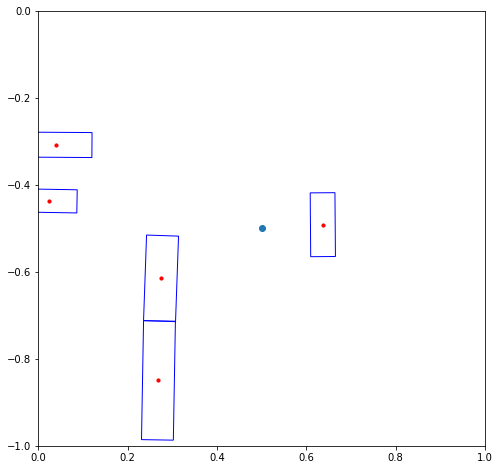

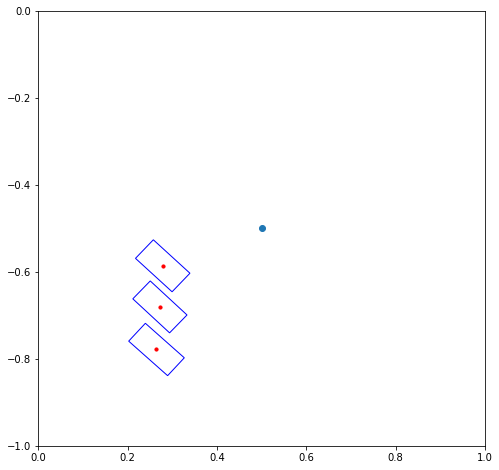

threshold : 0.3
Step : 50  --  51 Batch 19.48213 Targets =  59 Ratio = 0.33020559407896916 Threshold (0.5):
Step : 51  --  52 Batch 20.29512 Targets =  56 Ratio = 0.3624128614153181 Threshold (0.5):
Step : 52  --  53 Batch 18.38599 Targets =  55 Ratio = 0.33429072986949576 Threshold (0.5):
Step : 53  --  54 Batch 18.997978 Targets =  44 Ratio = 0.43177223205566406 Threshold (0.5):
Step : 54  --  55 Batch 18.690731 Targets =  40 Ratio = 0.4672682762145996 Threshold (0.5):
Step : 55  --  56 Batch 17.477322 Targets =  46 Ratio = 0.37994177445121435 Threshold (0.5):
Step : 56  --  57 Batch 19.374918 Targets =  40 Ratio = 0.4843729496002197 Threshold (0.5):
Step : 57  --  58 Batch 16.862143 Targets =  27 Ratio = 0.6245237986246744 Threshold (0.5):
Step : 58  --  59 Batch 18.66539 Targets =  61 Ratio = 0.30599000024013834 Threshold (0.5):
Step : 59  --  60 Batch 18.7773 Targets =  59 Ratio = 0.31825932001663465 Threshold (0.5):
Step : 60  --  61 Batch 17.485535 Targets =  72 Ratio = 0.242854

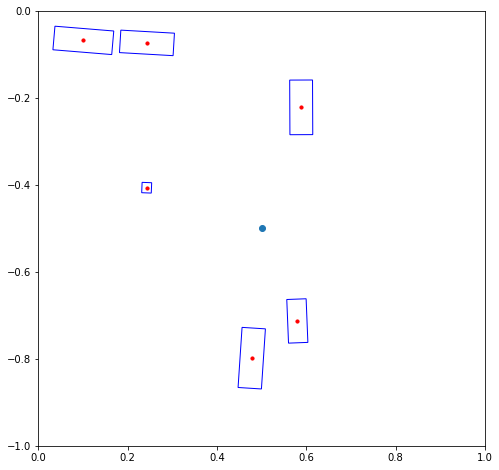

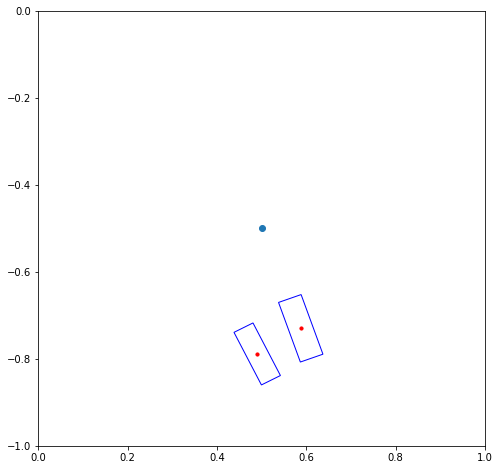

threshold : 0.5
Step : 100  --  101 Batch 13.073671 Targets =  52 Ratio = 0.2514167565565843 Threshold (0.5):
Step : 101  --  102 Batch 12.460529 Targets =  52 Ratio = 0.2396255639883188 Threshold (0.5):
Step : 102  --  103 Batch 15.708681 Targets =  43 Ratio = 0.3653181652690089 Threshold (0.5):
Step : 103  --  104 Batch 14.403068 Targets =  41 Ratio = 0.3512943314342964 Threshold (0.5):
Step : 104  --  105 Batch 14.576504 Targets =  53 Ratio = 0.2750283727106058 Threshold (0.5):
Step : 105  --  106 Batch 13.668861 Targets =  51 Ratio = 0.26801688998353246 Threshold (0.5):
Step : 106  --  107 Batch 16.438543 Targets =  44 Ratio = 0.37360325726595794 Threshold (0.5):
Step : 107  --  108 Batch 15.398981 Targets =  51 Ratio = 0.3019408057717716 Threshold (0.5):
Step : 108  --  109 Batch 12.158213 Targets =  52 Ratio = 0.2338117819565993 Threshold (0.5):
Step : 109  --  110 Batch 14.2314 Targets =  70 Ratio = 0.20330570765904019 Threshold (0.5):
Step : 110  --  111 Batch 13.600282 Targets

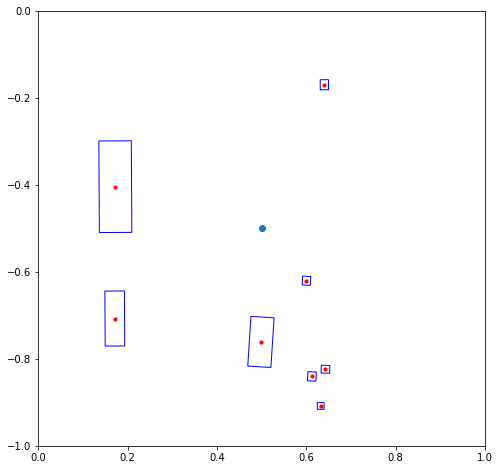

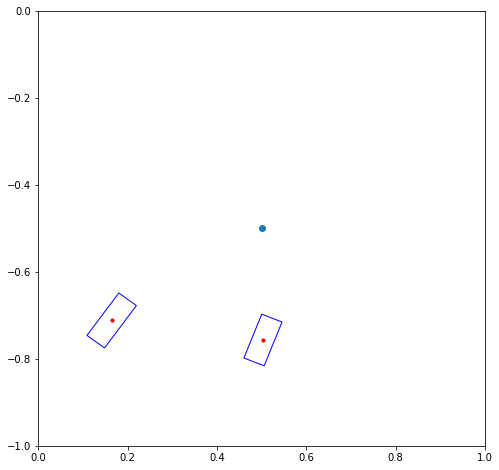

threshold : 0.5
Step : 150  --  151 Batch 11.137917 Targets =  35 Ratio = 0.31822618756975446 Threshold (0.5):
Step : 151  --  152 Batch 12.686882 Targets =  47 Ratio = 0.26993365997963764 Threshold (0.5):
Step : 152  --  153 Batch 13.039214 Targets =  38 Ratio = 0.3431372140583239 Threshold (0.5):
Step : 153  --  154 Batch 10.659688 Targets =  50 Ratio = 0.21319375991821288 Threshold (0.5):
Step : 154  --  155 Batch 14.094431 Targets =  67 Ratio = 0.2103646406486853 Threshold (0.5):
Step : 155  --  156 Batch 12.482338 Targets =  49 Ratio = 0.25474159085020726 Threshold (0.5):
Step : 156  --  157 Batch 10.952182 Targets =  34 Ratio = 0.3221229945912081 Threshold (0.5):
Step : 157  --  158 Batch 12.075251 Targets =  42 Ratio = 0.28750596727643696 Threshold (0.5):
Step : 158  --  159 Batch 11.358086 Targets =  46 Ratio = 0.2469149050505265 Threshold (0.5):
Step : 159  --  160 Batch 12.009106 Targets =  42 Ratio = 0.28593108767554876 Threshold (0.5):
Step : 160  --  161 Batch 10.933744 Ta

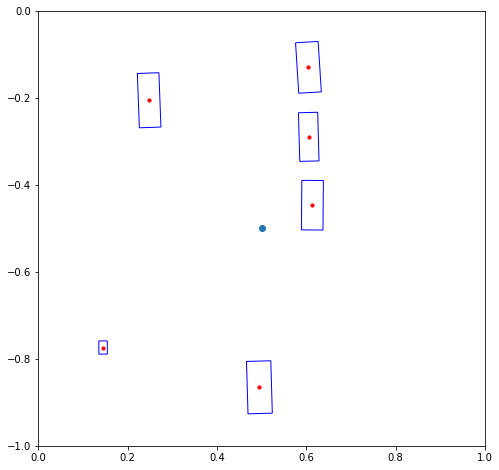

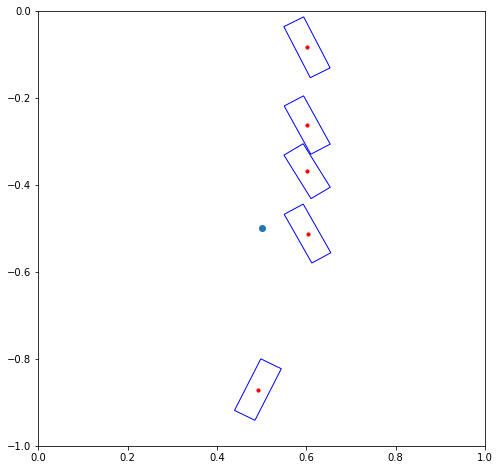

threshold : 0.5
Step : 200  --  201 Batch 11.962766 Targets =  46 Ratio = 0.26006012377531634 Threshold (0.5):
Step : 201  --  202 Batch 12.982045 Targets =  46 Ratio = 0.28221837334010913 Threshold (0.5):
Step : 202  --  203 Batch 12.912804 Targets =  62 Ratio = 0.20827102661132812 Threshold (0.5):
Step : 203  --  204 Batch 11.319724 Targets =  60 Ratio = 0.18866206804911295 Threshold (0.5):
Step : 204  --  205 Batch 11.705962 Targets =  71 Ratio = 0.16487270677593394 Threshold (0.5):
Step : 205  --  206 Batch 9.539462 Targets =  45 Ratio = 0.21198804643419053 Threshold (0.5):
Step : 206  --  207 Batch 11.669286 Targets =  37 Ratio = 0.31538610200624206 Threshold (0.5):
Step : 207  --  208 Batch 12.336807 Targets =  49 Ratio = 0.2517715765505421 Threshold (0.5):
Step : 208  --  209 Batch 12.25994 Targets =  61 Ratio = 0.2009826253672115 Threshold (0.5):
Step : 209  --  210 Batch 10.840555 Targets =  46 Ratio = 0.2356642432834791 Threshold (0.5):
Step : 210  --  211 Batch 13.221405 Tar

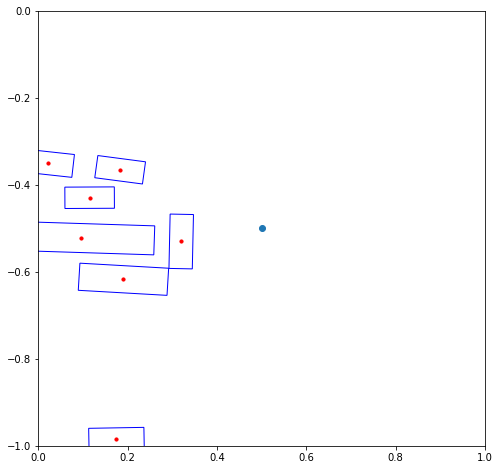

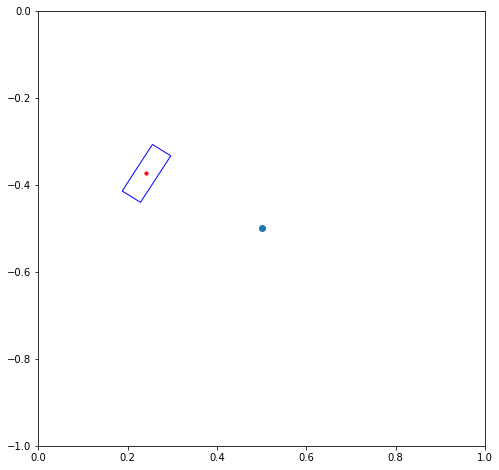

threshold : 0.3
Step : 250  --  251 Batch 11.3323965 Targets =  67 Ratio = 0.16914024637706243 Threshold (0.5):
Step : 251  --  252 Batch 9.818182 Targets =  79 Ratio = 0.1242807847035082 Threshold (0.5):
Step : 252  --  253 Batch 9.493307 Targets =  54 Ratio = 0.17580198358606408 Threshold (0.5):
Step : 253  --  254 Batch 9.923207 Targets =  26 Ratio = 0.38166181857769305 Threshold (0.5):
Step : 254  --  255 Batch 11.68313 Targets =  43 Ratio = 0.2717007038205169 Threshold (0.5):
Step : 255  --  256 Batch 8.100584 Targets =  34 Ratio = 0.23825247147504022 Threshold (0.5):
Step : 256  --  257 Batch 9.578829 Targets =  43 Ratio = 0.22276346073594205 Threshold (0.5):
Step : 257  --  258 Batch 11.79339 Targets =  24 Ratio = 0.49139126141866046 Threshold (0.5):
Step : 258  --  259 Batch 11.968929 Targets =  63 Ratio = 0.1899830046154204 Threshold (0.5):
Step : 259  --  260 Batch 11.823246 Targets =  56 Ratio = 0.21112939289637975 Threshold (0.5):
Step : 260  --  261 Batch 12.860434 Targets

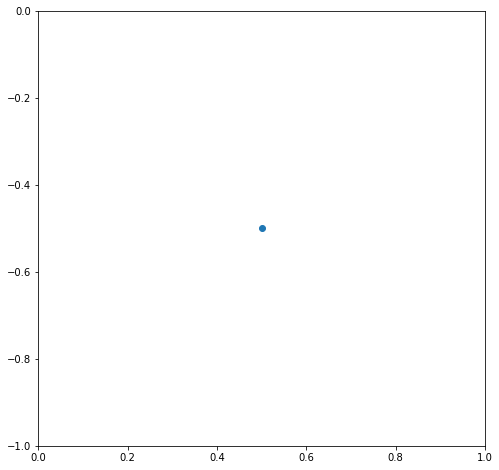

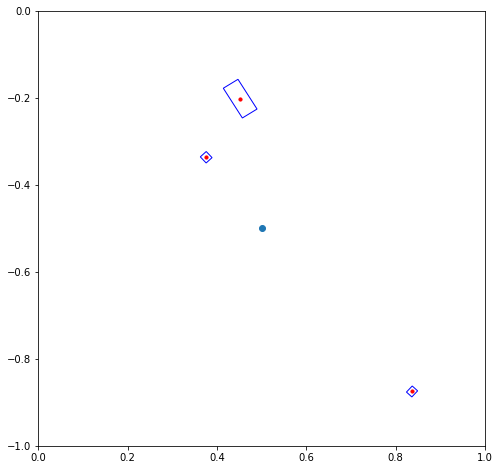

threshold : 0.3
Step : 300  --  301 Batch 12.445936 Targets =  34 Ratio = 0.366056947147145 Threshold (0.5):
Step : 301  --  302 Batch 10.23579 Targets =  62 Ratio = 0.16509339117234753 Threshold (0.5):
Step : 302  --  303 Batch 11.90798 Targets =  57 Ratio = 0.20891192921420984 Threshold (0.5):
Step : 303  --  304 Batch 10.067531 Targets =  62 Ratio = 0.1623795263228878 Threshold (0.5):
Step : 304  --  305 Batch 10.345311 Targets =  67 Ratio = 0.1544076293262083 Threshold (0.5):
Step : 305  --  306 Batch 11.373922 Targets =  91 Ratio = 0.1249881576705765 Threshold (0.5):
Step : 306  --  307 Batch 11.12154 Targets =  82 Ratio = 0.13562853743390338 Threshold (0.5):
Step : 307  --  308 Batch 14.741211 Targets =  24 Ratio = 0.6142171223958334 Threshold (0.5):
Step : 308  --  309 Batch 10.616953 Targets =  48 Ratio = 0.22118651866912842 Threshold (0.5):
Step : 309  --  310 Batch 13.503544 Targets =  28 Ratio = 0.48226942334856304 Threshold (0.5):
Step : 310  --  311 Batch 9.714655 Targets 

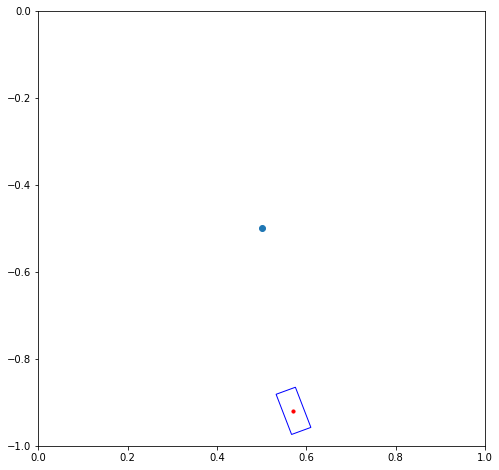

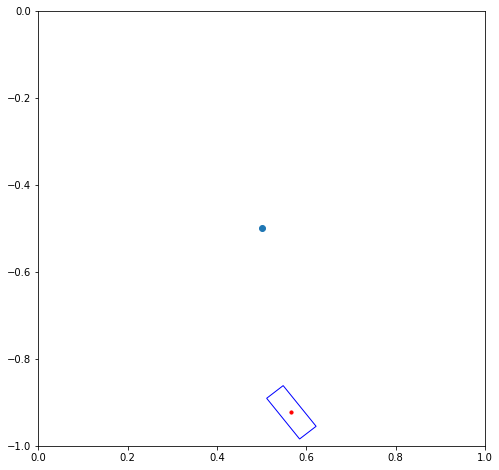

threshold : 0.5
Step : 350  --  351 Batch 12.723448 Targets =  52 Ratio = 0.24468168845543495 Threshold (0.5):
Step : 351  --  352 Batch 10.62473 Targets =  37 Ratio = 0.28715486784239075 Threshold (0.5):
Step : 352  --  353 Batch 10.268786 Targets =  24 Ratio = 0.4278661012649536 Threshold (0.5):
Step : 353  --  354 Batch 12.0772 Targets =  43 Ratio = 0.28086511478867643 Threshold (0.5):
Step : 354  --  355 Batch 11.663584 Targets =  67 Ratio = 0.17408333963422634 Threshold (0.5):
Step : 355  --  356 Batch 9.596043 Targets =  63 Ratio = 0.1523181370326451 Threshold (0.5):
Step : 356  --  357 Batch 13.471954 Targets =  40 Ratio = 0.33679885864257814 Threshold (0.5):
Step : 357  --  358 Batch 8.314307 Targets =  63 Ratio = 0.13197313036237443 Threshold (0.5):
Step : 358  --  359 Batch 10.729034 Targets =  76 Ratio = 0.14117150557668587 Threshold (0.5):
Step : 359  --  360 Batch 9.768574 Targets =  33 Ratio = 0.2960173866965554 Threshold (0.5):
Step : 360  --  361 Batch 9.313623 Targets 

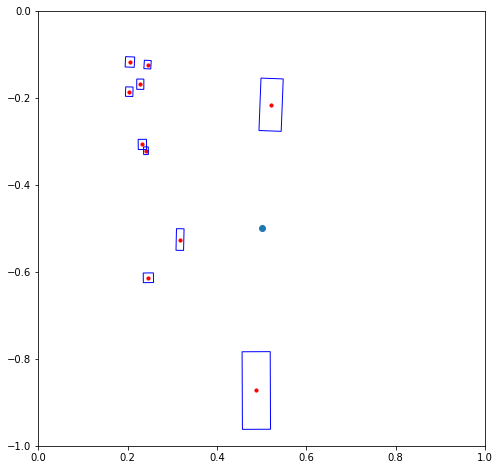

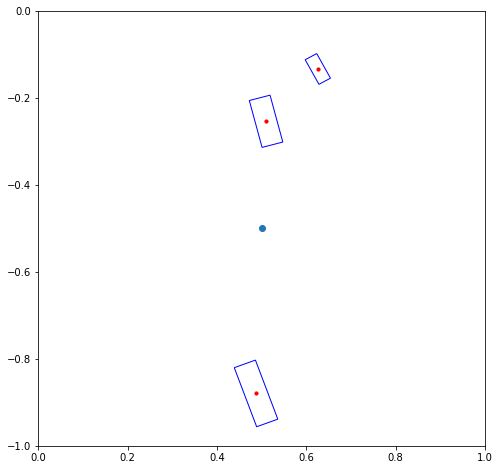

threshold : 0.5
Step : 400  --  401 Batch 10.928764 Targets =  83 Ratio = 0.1316718595573701 Threshold (0.5):
Step : 401  --  402 Batch 12.591656 Targets =  29 Ratio = 0.4341950252138335 Threshold (0.5):
Step : 402  --  403 Batch 10.888902 Targets =  42 Ratio = 0.25925956453595844 Threshold (0.5):
Step : 403  --  404 Batch 9.251503 Targets =  37 Ratio = 0.2500406213708826 Threshold (0.5):
Step : 404  --  405 Batch 10.632055 Targets =  37 Ratio = 0.28735284547548035 Threshold (0.5):
Step : 405  --  406 Batch 8.117858 Targets =  35 Ratio = 0.2319387980869838 Threshold (0.5):
Step : 406  --  407 Batch 11.324207 Targets =  26 Ratio = 0.4355464348426232 Threshold (0.5):
Step : 407  --  408 Batch 10.087525 Targets =  45 Ratio = 0.22416723039415148 Threshold (0.5):
Step : 408  --  409 Batch 12.74423 Targets =  64 Ratio = 0.19912859797477722 Threshold (0.5):
Step : 409  --  410 Batch 11.837429 Targets =  44 Ratio = 0.26903247833251953 Threshold (0.5):
Step : 410  --  411 Batch 9.506899 Targets

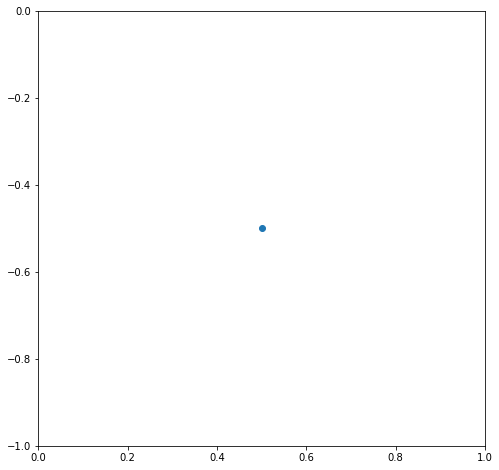

Nothing !!!!
Step : 450  --  451 Batch 10.597892 Targets =  49 Ratio = 0.21628350627665616 Threshold (0.5):
Step : 451  --  452 Batch 12.061478 Targets =  72 Ratio = 0.16752052307128906 Threshold (0.5):
Step : 452  --  453 Batch 12.603803 Targets =  61 Ratio = 0.20661971608146293 Threshold (0.5):
Step : 453  --  454 Batch 10.042288 Targets =  32 Ratio = 0.3138214945793152 Threshold (0.5):
Step : 454  --  455 Batch 14.191055 Targets =  38 Ratio = 0.3734488236276727 Threshold (0.5):
Step : 455  --  456 Batch 10.673721 Targets =  55 Ratio = 0.19406766024502842 Threshold (0.5):
Step : 456  --  457 Batch 13.2430105 Targets =  55 Ratio = 0.24078200947154652 Threshold (0.5):
Step : 457  --  458 Batch 13.424042 Targets =  59 Ratio = 0.2275261313228284 Threshold (0.5):
Step : 458  --  459 Batch 8.443951 Targets =  55 Ratio = 0.15352637551047585 Threshold (0.5):
Step : 459  --  460 Batch 10.650806 Targets =  35 Ratio = 0.3043087550571987 Threshold (0.5):
Step : 460  --  461 Batch 9.64774 Targets

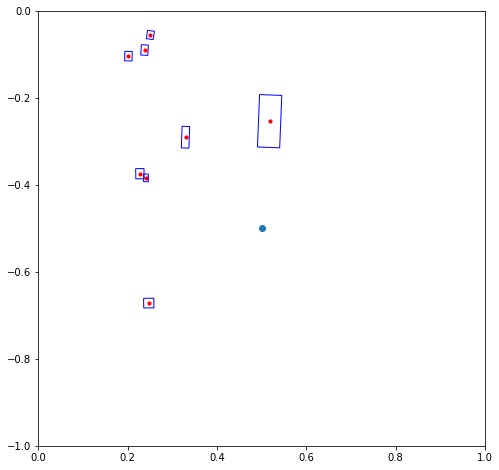

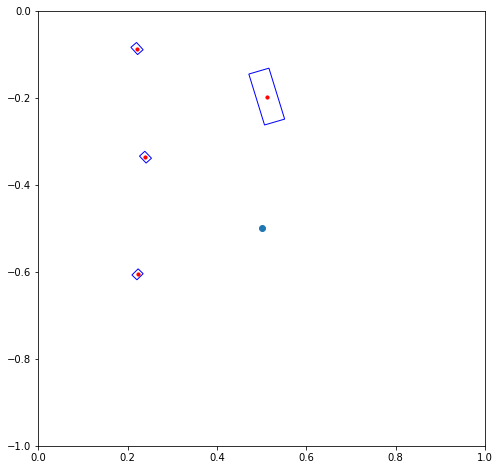

threshold : 0.5
Step : 500  --  501 Batch 11.956912 Targets =  45 Ratio = 0.2657091564602322 Threshold (0.5):
Step : 501  --  502 Batch 12.3559 Targets =  29 Ratio = 0.42606551071693155 Threshold (0.5):
Step : 502  --  503 Batch 11.855568 Targets =  54 Ratio = 0.21954755429868344 Threshold (0.5):
Step : 503  --  504 Batch 11.85048 Targets =  60 Ratio = 0.19750800132751464 Threshold (0.5):
Step : 504  --  505 Batch 13.56196 Targets =  46 Ratio = 0.29482522218123725 Threshold (0.5):
Step : 505  --  506 Batch 13.1418705 Targets =  37 Ratio = 0.355185689152898 Threshold (0.5):
Step : 506  --  507 Batch 13.562338 Targets =  36 Ratio = 0.37673160764906144 Threshold (0.5):
Step : 507  --  508 Batch 11.892705 Targets =  47 Ratio = 0.2530362758230656 Threshold (0.5):
Step : 508  --  509 Batch 11.735476 Targets =  55 Ratio = 0.21337228254838422 Threshold (0.5):
Step : 509  --  510 Batch 10.007801 Targets =  59 Ratio = 0.16962374671030853 Threshold (0.5):
Step : 510  --  511 Batch 9.123789 Target

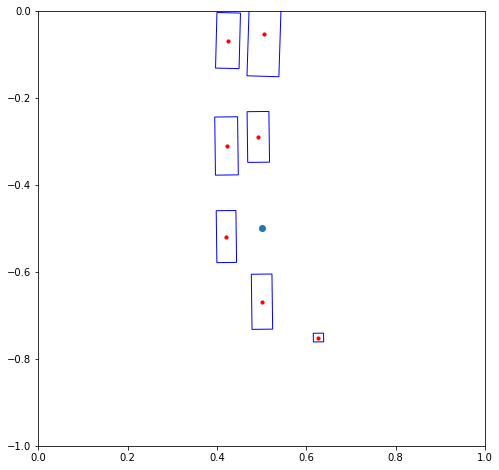

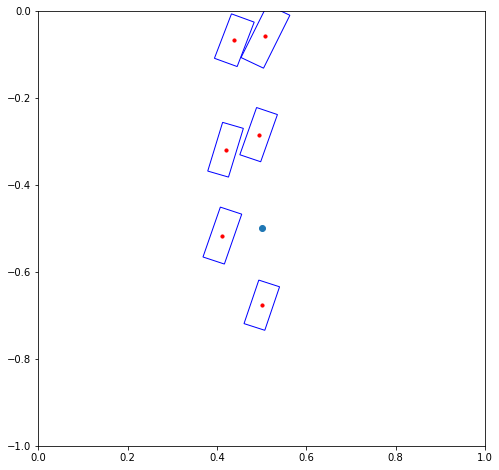

threshold : 0.5
Step : 550  --  551 Batch 11.039711 Targets =  52 Ratio = 0.21230213458721453 Threshold (0.5):
Step : 551  --  552 Batch 12.621814 Targets =  54 Ratio = 0.23373729211312752 Threshold (0.5):
Step : 552  --  553 Batch 10.236128 Targets =  34 Ratio = 0.30106258392333984 Threshold (0.5):
Step : 553  --  554 Batch 8.154587 Targets =  35 Ratio = 0.23298819405691965 Threshold (0.5):
Step : 554  --  555 Batch 10.301704 Targets =  73 Ratio = 0.1411192384484696 Threshold (0.5):
Step : 555  --  556 Batch 10.144695 Targets =  32 Ratio = 0.3170217275619507 Threshold (0.5):
Step : 556  --  557 Batch 10.149948 Targets =  52 Ratio = 0.1951913100022536 Threshold (0.5):
Step : 557  --  558 Batch 9.609782 Targets =  49 Ratio = 0.19611800446802255 Threshold (0.5):
Step : 558  --  559 Batch 9.330467 Targets =  66 Ratio = 0.14137071551698627 Threshold (0.5):
Step : 559  --  560 Batch 10.696645 Targets =  53 Ratio = 0.20182348647207585 Threshold (0.5):
Step : 560  --  561 Batch 9.434805 Targe

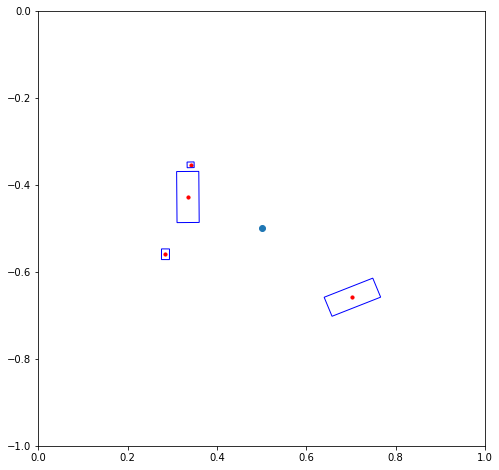

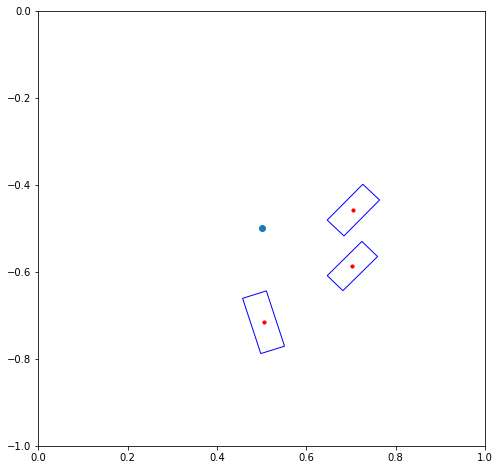

threshold : 0.5
Step : 600  --  601 Batch 15.073085 Targets =  37 Ratio = 0.40738067111453496 Threshold (0.5):
Step : 601  --  602 Batch 8.504271 Targets =  50 Ratio = 0.17008541107177735 Threshold (0.5):
Step : 602  --  603 Batch 12.516448 Targets =  68 Ratio = 0.1840654120725744 Threshold (0.5):
Step : 603  --  604 Batch 8.1108 Targets =  67 Ratio = 0.12105671327505539 Threshold (0.5):
Step : 604  --  605 Batch 11.0771055 Targets =  46 Ratio = 0.2408066417859948 Threshold (0.5):
Step : 605  --  606 Batch 9.815908 Targets =  32 Ratio = 0.3067471385002136 Threshold (0.5):
Step : 606  --  607 Batch 14.962553 Targets =  39 Ratio = 0.3836552057510767 Threshold (0.5):
Step : 607  --  608 Batch 8.611041 Targets =  59 Ratio = 0.14594984862764002 Threshold (0.5):
Step : 608  --  609 Batch 10.097939 Targets =  54 Ratio = 0.186998861807364 Threshold (0.5):
Step : 609  --  610 Batch 9.456118 Targets =  77 Ratio = 0.12280672246759589 Threshold (0.5):
Step : 610  --  611 Batch 13.139738 Targets = 

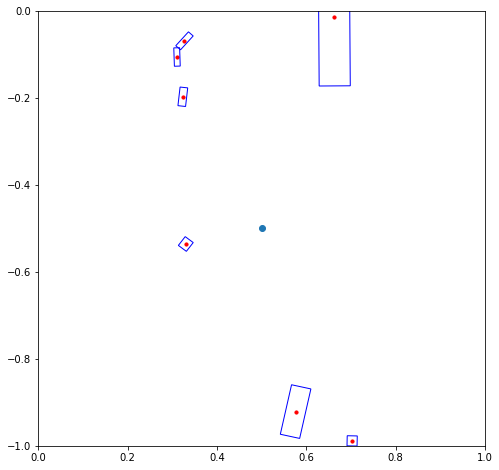

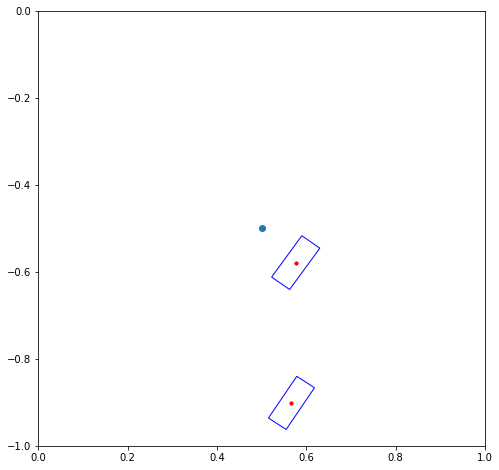

threshold : 0.5
Step : 650  --  651 Batch 10.536361 Targets =  38 Ratio = 0.2772726510700427 Threshold (0.5):
Step : 651  --  652 Batch 11.040943 Targets =  43 Ratio = 0.2567661196686501 Threshold (0.5):
Step : 652  --  653 Batch 9.936692 Targets =  26 Ratio = 0.3821804706866925 Threshold (0.5):
Step : 653  --  654 Batch 13.709615 Targets =  44 Ratio = 0.3115821534937078 Threshold (0.5):
Step : 654  --  655 Batch 9.226171 Targets =  35 Ratio = 0.2636048725673131 Threshold (0.5):
Step : 655  --  656 Batch 10.518392 Targets =  56 Ratio = 0.1878284215927124 Threshold (0.5):
Step : 656  --  657 Batch 10.207734 Targets =  71 Ratio = 0.14377090292917172 Threshold (0.5):
Step : 657  --  658 Batch 11.36461 Targets =  35 Ratio = 0.3247031348092215 Threshold (0.5):
Step : 658  --  659 Batch 10.215868 Targets =  90 Ratio = 0.113509644402398 Threshold (0.5):
Step : 659  --  660 Batch 11.004758 Targets =  73 Ratio = 0.15075010796115823 Threshold (0.5):
Step : 660  --  661 Batch 9.400566 Targets =  

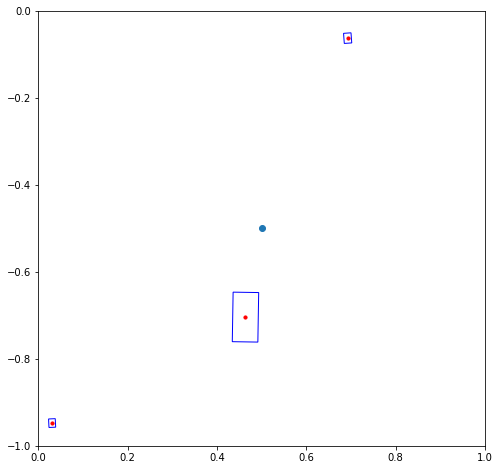

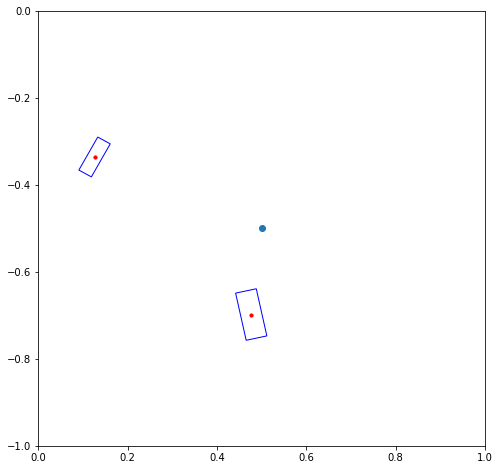

threshold : 0.5
Step : 700  --  701 Batch 11.189168 Targets =  52 Ratio = 0.21517630723806527 Threshold (0.5):
Step : 701  --  702 Batch 9.936714 Targets =  42 Ratio = 0.2365884326753162 Threshold (0.5):
Step : 702  --  703 Batch 10.798886 Targets =  42 Ratio = 0.25711634045555476 Threshold (0.5):
Step : 703  --  704 Batch 9.645522 Targets =  38 Ratio = 0.25382952941091436 Threshold (0.5):
Step : 704  --  705 Batch 11.19617 Targets =  57 Ratio = 0.19642403251246401 Threshold (0.5):
Step : 705  --  706 Batch 10.391461 Targets =  81 Ratio = 0.1282896465725369 Threshold (0.5):
Step : 706  --  707 Batch 8.403845 Targets =  26 Ratio = 0.3232248012836163 Threshold (0.5):
Step : 707  --  708 Batch 9.840509 Targets =  58 Ratio = 0.169663955425394 Threshold (0.5):
Step : 708  --  709 Batch 11.35769 Targets =  44 Ratio = 0.2581293149427934 Threshold (0.5):
Step : 709  --  710 Batch 9.5274315 Targets =  57 Ratio = 0.16714792084275631 Threshold (0.5):
Step : 710  --  711 Batch 9.363057 Targets =  

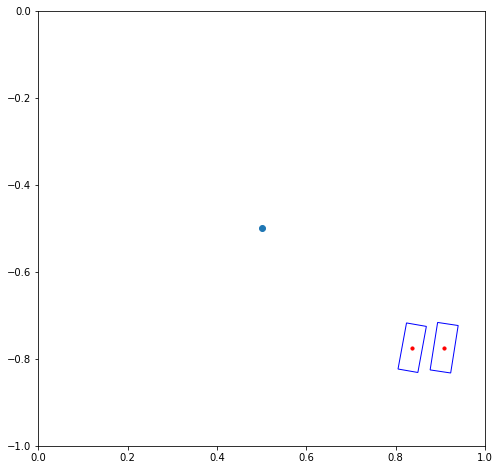

Nothing !!!!
Step : 750  --  751 Batch 10.7653265 Targets =  58 Ratio = 0.18560907758515457 Threshold (0.5):
Step : 751  --  752 Batch 8.168635 Targets =  57 Ratio = 0.1433093924271433 Threshold (0.5):
Step : 752  --  753 Batch 9.434288 Targets =  40 Ratio = 0.2358572006225586 Threshold (0.5):
Step : 753  --  754 Batch 10.263103 Targets =  48 Ratio = 0.21381463607152304 Threshold (0.5):
Step : 754  --  755 Batch 11.196809 Targets =  45 Ratio = 0.24881797366672093 Threshold (0.5):
Step : 755  --  756 Batch 10.401185 Targets =  63 Ratio = 0.1650981751699296 Threshold (0.5):
Step : 756  --  757 Batch 10.575116 Targets =  34 Ratio = 0.31103282816269817 Threshold (0.5):
Step : 757  --  758 Batch 10.279419 Targets =  60 Ratio = 0.17132364908854167 Threshold (0.5):
Step : 758  --  759 Batch 10.512446 Targets =  61 Ratio = 0.172335186942679 Threshold (0.5):
Step : 759  --  760 Batch 11.659067 Targets =  83 Ratio = 0.14047068860157427 Threshold (0.5):
Step : 760  --  761 Batch 13.110107 Targets

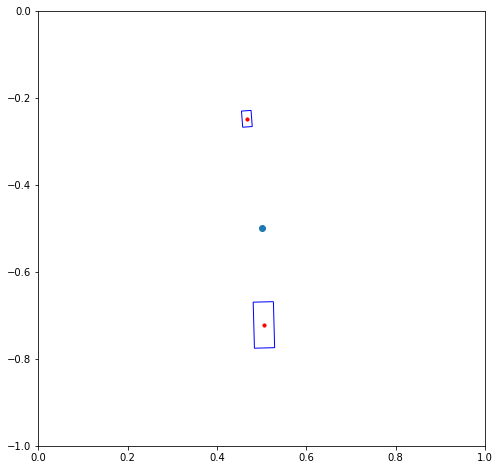

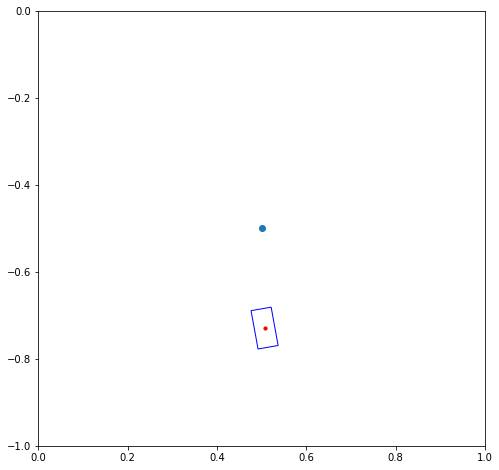

threshold : 0.5
Step : 800  --  801 Batch 9.009878 Targets =  46 Ratio = 0.19586691649063773 Threshold (0.5):
Step : 801  --  802 Batch 12.743032 Targets =  63 Ratio = 0.20227035643562438 Threshold (0.5):
Step : 802  --  803 Batch 12.110834 Targets =  54 Ratio = 0.22427470595748336 Threshold (0.5):
Step : 803  --  804 Batch 11.103353 Targets =  41 Ratio = 0.2708134767485828 Threshold (0.5):
Step : 804  --  805 Batch 10.810015 Targets =  34 Ratio = 0.3179416095509249 Threshold (0.5):
Step : 805  --  806 Batch 10.124041 Targets =  61 Ratio = 0.16596787874815894 Threshold (0.5):
Step : 806  --  807 Batch 10.113654 Targets =  68 Ratio = 0.1487302078920252 Threshold (0.5):
Step : 807  --  808 Batch 12.785534 Targets =  83 Ratio = 0.15404257716902767 Threshold (0.5):
Step : 808  --  809 Batch 11.792201 Targets =  112 Ratio = 0.10528750930513654 Threshold (0.5):
Step : 809  --  810 Batch 9.9065075 Targets =  59 Ratio = 0.16790690664517677 Threshold (0.5):
Step : 810  --  811 Batch 11.42928 Ta

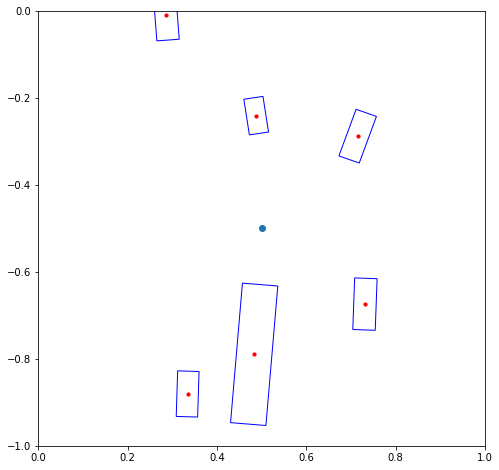

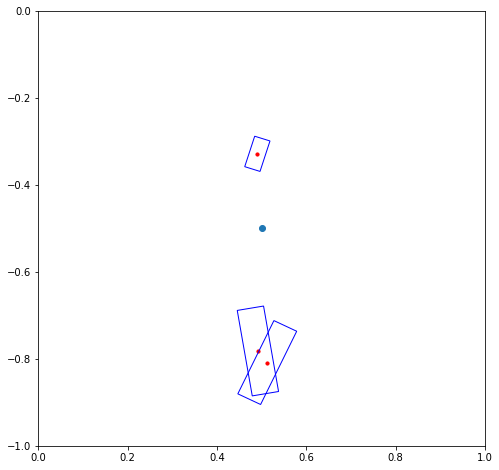

threshold : 0.5
Step : 850  --  851 Batch 11.2620325 Targets =  64 Ratio = 0.17596925795078278 Threshold (0.5):
Step : 851  --  852 Batch 11.008311 Targets =  54 Ratio = 0.20385761614199038 Threshold (0.5):
Step : 852  --  853 Batch 10.368812 Targets =  64 Ratio = 0.16201268136501312 Threshold (0.5):
Step : 853  --  854 Batch 12.354717 Targets =  55 Ratio = 0.2246312228116122 Threshold (0.5):
Step : 854  --  855 Batch 8.974863 Targets =  43 Ratio = 0.2087177454039108 Threshold (0.5):
Step : 855  --  856 Batch 9.018585 Targets =  45 Ratio = 0.20041300455729166 Threshold (0.5):
Step : 856  --  857 Batch 11.178493 Targets =  55 Ratio = 0.20324531901966442 Threshold (0.5):
Step : 857  --  858 Batch 11.2134695 Targets =  59 Ratio = 0.19005880517474674 Threshold (0.5):
Step : 858  --  859 Batch 12.600161 Targets =  59 Ratio = 0.21356204404669293 Threshold (0.5):
Step : 859  --  860 Batch 10.161866 Targets =  53 Ratio = 0.19173332430281728 Threshold (0.5):
Step : 860  --  861 Batch 11.287355 

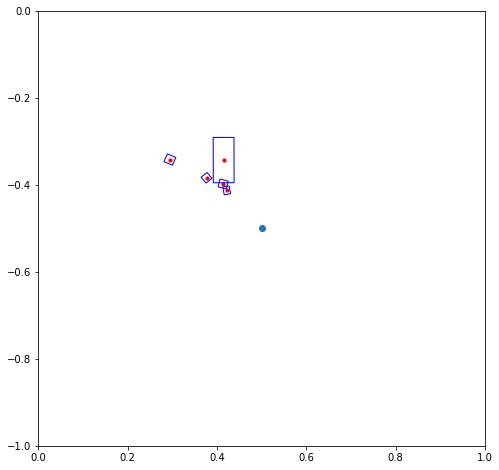

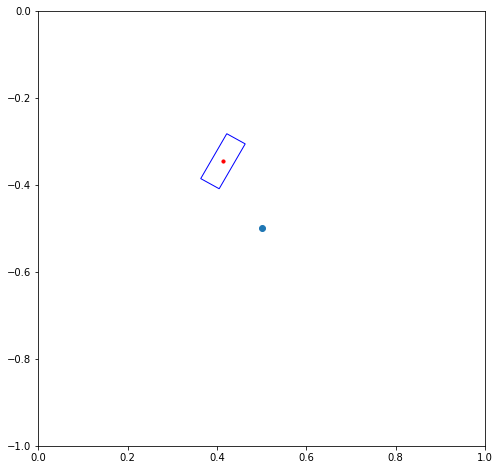

threshold : 0.3
Step : 900  --  901 Batch 11.489844 Targets =  66 Ratio = 0.17408855033643317 Threshold (0.5):
Step : 901  --  902 Batch 10.086864 Targets =  53 Ratio = 0.1903181975742556 Threshold (0.5):
Step : 902  --  903 Batch 10.550541 Targets =  60 Ratio = 0.17584234873453777 Threshold (0.5):
Step : 903  --  904 Batch 10.333377 Targets =  78 Ratio = 0.13247919082641602 Threshold (0.5):
Step : 904  --  905 Batch 10.263943 Targets =  33 Ratio = 0.31102856722745026 Threshold (0.5):
Step : 905  --  906 Batch 11.069707 Targets =  65 Ratio = 0.17030318333552433 Threshold (0.5):
Step : 906  --  907 Batch 10.69991 Targets =  39 Ratio = 0.2743566708687024 Threshold (0.5):
Step : 907  --  908 Batch 10.64571 Targets =  45 Ratio = 0.2365713331434462 Threshold (0.5):
Step : 908  --  909 Batch 11.184296 Targets =  65 Ratio = 0.1720660869891827 Threshold (0.5):
Step : 909  --  910 Batch 12.4251175 Targets =  37 Ratio = 0.33581398628853465 Threshold (0.5):
Step : 910  --  911 Batch 9.396025 Targ

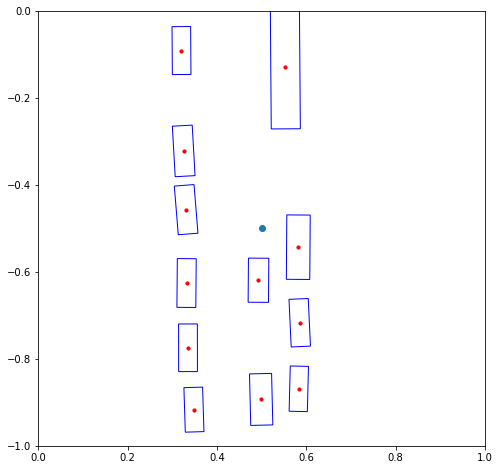

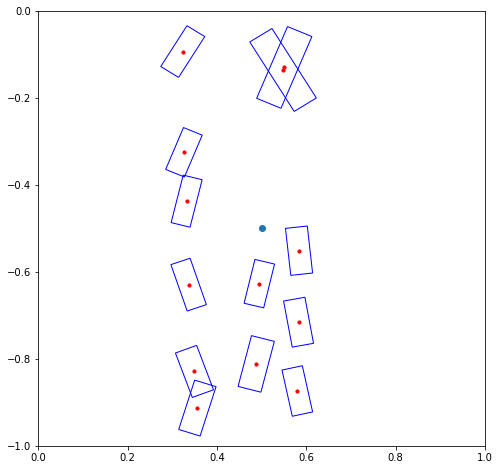

threshold : 0.5
Step : 950  --  951 Batch 9.3137045 Targets =  43 Ratio = 0.21659777885259585 Threshold (0.5):
Step : 951  --  952 Batch 9.757065 Targets =  54 Ratio = 0.1806863855432581 Threshold (0.5):
Step : 952  --  953 Batch 12.6934395 Targets =  32 Ratio = 0.39666998386383057 Threshold (0.5):
Step : 953  --  954 Batch 12.5856495 Targets =  37 Ratio = 0.34015268892855255 Threshold (0.5):
Step : 954  --  955 Batch 11.425526 Targets =  76 Ratio = 0.15033586401688426 Threshold (0.5):
Step : 955  --  956 Batch 8.38703 Targets =  38 Ratio = 0.22071130652176707 Threshold (0.5):
Step : 956  --  957 Batch 11.927099 Targets =  34 Ratio = 0.35079703611486096 Threshold (0.5):
Step : 957  --  958 Batch 11.483054 Targets =  61 Ratio = 0.18824678952576684 Threshold (0.5):
Step : 958  --  959 Batch 8.55595 Targets =  50 Ratio = 0.17111900329589844 Threshold (0.5):
Step : 959  --  960 Batch 12.778864 Targets =  46 Ratio = 0.2778013892795729 Threshold (0.5):
Step : 960  --  961 Batch 11.298475 Tar

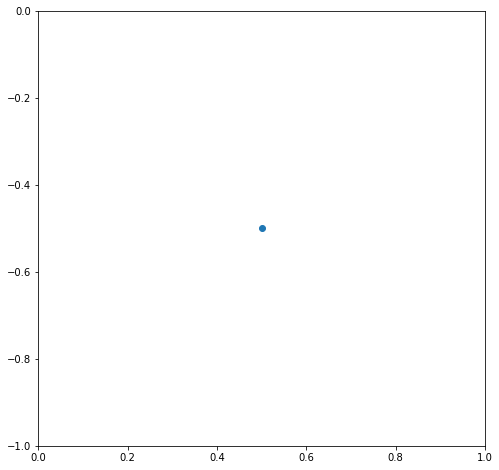

Nothing !!!!
Step : 1000  --  1001 Batch 11.260481 Targets =  61 Ratio = 0.1845980472252017 Threshold (0.5):
Step : 1001  --  1002 Batch 10.842528 Targets =  31 Ratio = 0.3497589788129253 Threshold (0.5):
Step : 1002  --  1003 Batch 10.002902 Targets =  43 Ratio = 0.2326256286266238 Threshold (0.5):
Step : 1003  --  1004 Batch 9.328528 Targets =  46 Ratio = 0.20279409574425739 Threshold (0.5):
Step : 1004  --  1005 Batch 11.790066 Targets =  67 Ratio = 0.17597113082658 Threshold (0.5):
Step : 1005  --  1006 Batch 8.221218 Targets =  41 Ratio = 0.20051751485685024 Threshold (0.5):
Step : 1006  --  1007 Batch 7.2619114 Targets =  41 Ratio = 0.17711979005394912 Threshold (0.5):
Step : 1007  --  1008 Batch 9.344776 Targets =  63 Ratio = 0.1483297802153088 Threshold (0.5):
Step : 1008  --  1009 Batch 11.780376 Targets =  61 Ratio = 0.19312092515288806 Threshold (0.5):
Step : 1009  --  1010 Batch 8.934811 Targets =  46 Ratio = 0.1942350138788638 Threshold (0.5):
Step : 1010  --  1011 Batch 9

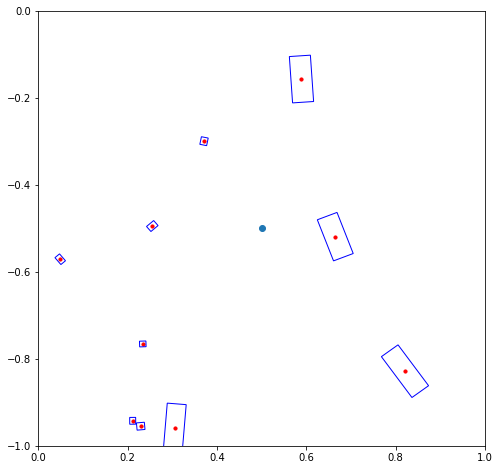

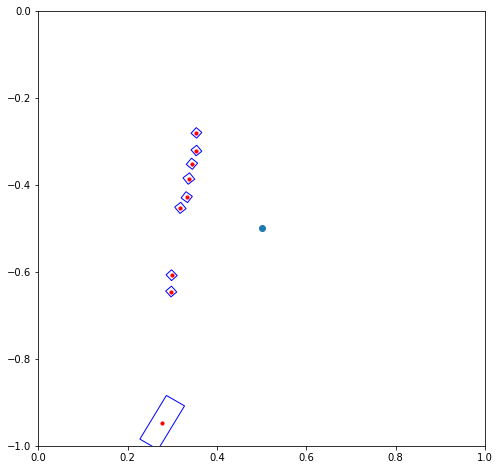

threshold : 0.5
Step : 1050  --  1051 Batch 9.67902 Targets =  61 Ratio = 0.15867245783571338 Threshold (0.5):
Step : 1051  --  1052 Batch 9.30406 Targets =  52 Ratio = 0.1789242304288424 Threshold (0.5):
Step : 1052  --  1053 Batch 11.894536 Targets =  53 Ratio = 0.22442520789380344 Threshold (0.5):
Step : 1053  --  1054 Batch 10.865965 Targets =  47 Ratio = 0.23119074233034823 Threshold (0.5):
Step : 1054  --  1055 Batch 9.413348 Targets =  48 Ratio = 0.1961114207903544 Threshold (0.5):
Step : 1055  --  1056 Batch 9.430567 Targets =  67 Ratio = 0.1407547281749213 Threshold (0.5):
Step : 1056  --  1057 Batch 12.682735 Targets =  61 Ratio = 0.20791369578877433 Threshold (0.5):
Step : 1057  --  1058 Batch 10.8260975 Targets =  54 Ratio = 0.2004832868222837 Threshold (0.5):
Step : 1058  --  1059 Batch 10.242327 Targets =  53 Ratio = 0.19325144785755086 Threshold (0.5):
Step : 1059  --  1060 Batch 8.860077 Targets =  59 Ratio = 0.15017079498808264 Threshold (0.5):
Step : 1060  --  1061 Ba

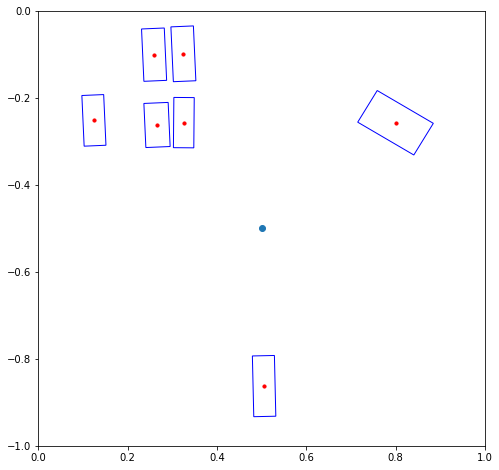

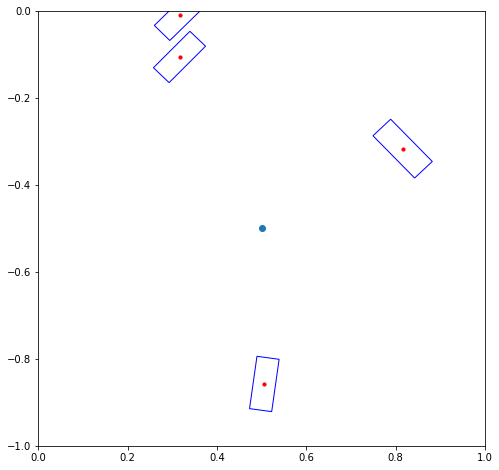

threshold : 0.5
Step : 1100  --  1101 Batch 11.66127 Targets =  59 Ratio = 0.1976486464678231 Threshold (0.5):
Step : 1101  --  1102 Batch 11.638551 Targets =  62 Ratio = 0.18771856061873898 Threshold (0.5):
Step : 1102  --  1103 Batch 8.2304735 Targets =  59 Ratio = 0.13949955115884038 Threshold (0.5):
Step : 1103  --  1104 Batch 10.294116 Targets =  45 Ratio = 0.22875813378228083 Threshold (0.5):
Step : 1104  --  1105 Batch 12.995447 Targets =  26 Ratio = 0.49982489072359526 Threshold (0.5):
Step : 1105  --  1106 Batch 9.814964 Targets =  45 Ratio = 0.21811031765407987 Threshold (0.5):
Step : 1106  --  1107 Batch 10.186513 Targets =  39 Ratio = 0.26119263966878253 Threshold (0.5):
Step : 1107  --  1108 Batch 11.050122 Targets =  50 Ratio = 0.22100244522094725 Threshold (0.5):
Step : 1108  --  1109 Batch 10.201841 Targets =  59 Ratio = 0.17291256532830707 Threshold (0.5):
Step : 1109  --  1110 Batch 9.191088 Targets =  66 Ratio = 0.1392589048905806 Threshold (0.5):
Step : 1110  --  11

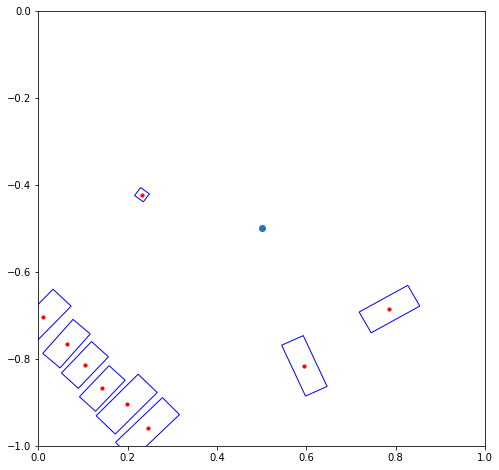

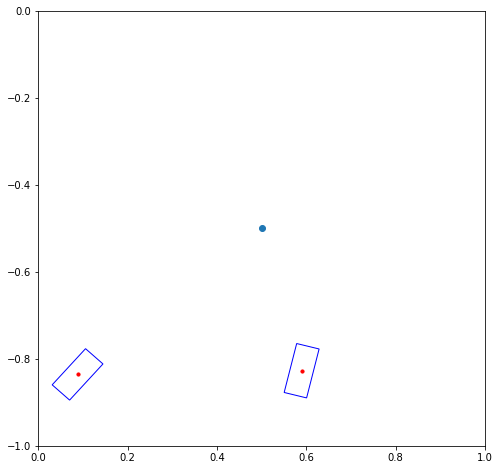

threshold : 0.5
Step : 1150  --  1151 Batch 9.8729 Targets =  81 Ratio = 0.12188765443401572 Threshold (0.5):
Step : 1151  --  1152 Batch 13.08046 Targets =  30 Ratio = 0.43601531982421876 Threshold (0.5):
Step : 1152  --  1153 Batch 7.208498 Targets =  39 Ratio = 0.18483328207945213 Threshold (0.5):
Step : 1153  --  1154 Batch 7.44848 Targets =  58 Ratio = 0.12842207119382662 Threshold (0.5):
Step : 1154  --  1155 Batch 12.8980665 Targets =  64 Ratio = 0.2015322893857956 Threshold (0.5):
Step : 1155  --  1156 Batch 9.897174 Targets =  54 Ratio = 0.18328099780612522 Threshold (0.5):
Step : 1156  --  1157 Batch 10.304257 Targets =  64 Ratio = 0.16100402176380157 Threshold (0.5):
Step : 1157  --  1158 Batch 10.24193 Targets =  47 Ratio = 0.21791340442413978 Threshold (0.5):
Step : 1158  --  1159 Batch 9.683929 Targets =  48 Ratio = 0.20174853006998697 Threshold (0.5):
Step : 1159  --  1160 Batch 12.126473 Targets =  37 Ratio = 0.327742525049158 Threshold (0.5):
Step : 1160  --  1161 Batc

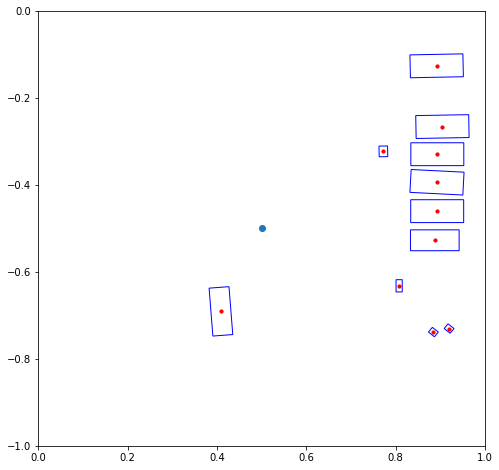

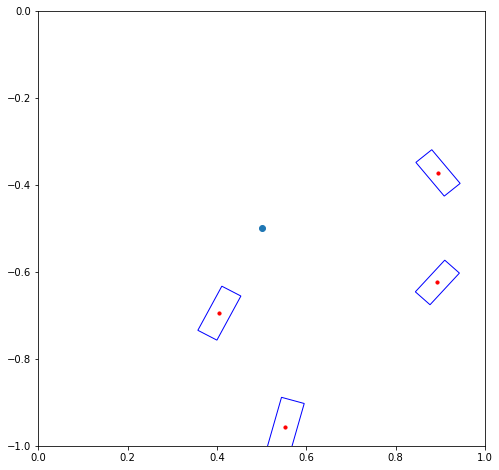

threshold : 0.5
Step : 1200  --  1201 Batch 12.837007 Targets =  49 Ratio = 0.26197972589609575 Threshold (0.5):
Step : 1201  --  1202 Batch 8.436398 Targets =  41 Ratio = 0.20576579396317646 Threshold (0.5):
Step : 1202  --  1203 Batch 8.40552 Targets =  49 Ratio = 0.17154123345199895 Threshold (0.5):
Step : 1203  --  1204 Batch 8.73654 Targets =  47 Ratio = 0.18588382639783493 Threshold (0.5):
Step : 1204  --  1205 Batch 11.08725 Targets =  59 Ratio = 0.18791948738744704 Threshold (0.5):
Step : 1205  --  1206 Batch 12.736687 Targets =  20 Ratio = 0.6368343353271484 Threshold (0.5):
Step : 1206  --  1207 Batch 9.654333 Targets =  47 Ratio = 0.20541134286434093 Threshold (0.5):
Step : 1207  --  1208 Batch 8.011935 Targets =  39 Ratio = 0.20543423677102113 Threshold (0.5):
Step : 1208  --  1209 Batch 9.66258 Targets =  56 Ratio = 0.17254606315067836 Threshold (0.5):
Step : 1209  --  1210 Batch 11.451075 Targets =  67 Ratio = 0.17091156119730935 Threshold (0.5):
Step : 1210  --  1211 Bat

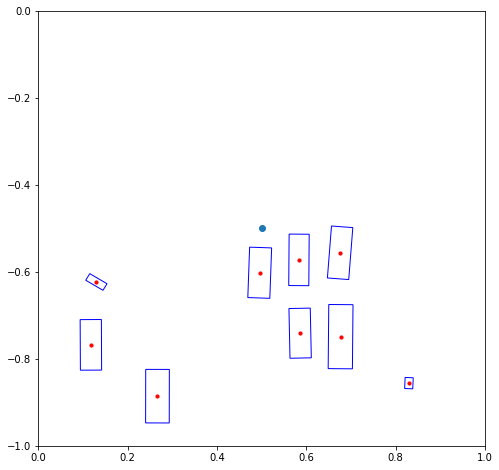

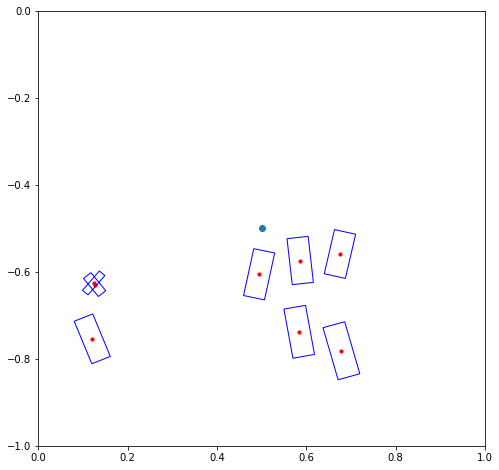

threshold : 0.5
Step : 1250  --  1251 Batch 8.994759 Targets =  74 Ratio = 0.12155079197239231 Threshold (0.5):
Step : 1251  --  1252 Batch 12.034655 Targets =  61 Ratio = 0.1972894199558946 Threshold (0.5):
Step : 1252  --  1253 Batch 8.942211 Targets =  41 Ratio = 0.21810271100300113 Threshold (0.5):
Step : 1253  --  1254 Batch 9.415276 Targets =  32 Ratio = 0.29422736167907715 Threshold (0.5):
Step : 1254  --  1255 Batch 8.481873 Targets =  36 Ratio = 0.2356075710720486 Threshold (0.5):
Step : 1255  --  1256 Batch 9.614817 Targets =  60 Ratio = 0.16024694442749024 Threshold (0.5):
Step : 1256  --  1257 Batch 10.557751 Targets =  35 Ratio = 0.3016500200544085 Threshold (0.5):
Step : 1257  --  1258 Batch 13.232208 Targets =  54 Ratio = 0.2450408935546875 Threshold (0.5):
Step : 1258  --  1259 Batch 11.87262 Targets =  47 Ratio = 0.2526089282746011 Threshold (0.5):
Step : 1259  --  1260 Batch 13.271116 Targets =  65 Ratio = 0.20417101933405948 Threshold (0.5):
Step : 1260  --  1261 Bat

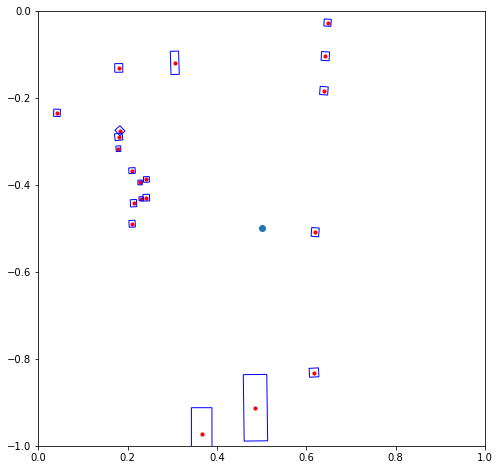

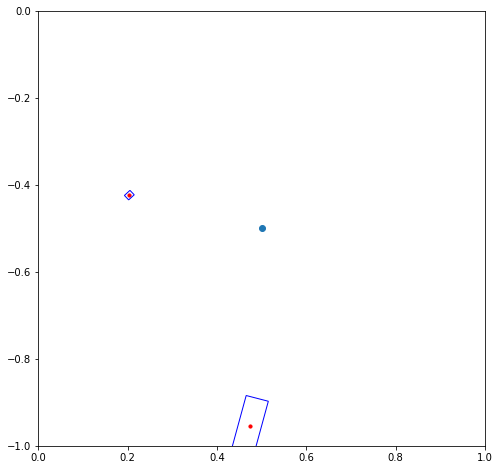

threshold : 0.5
Step : 1300  --  1301 Batch 9.253058 Targets =  56 Ratio = 0.1652331863130842 Threshold (0.5):
Step : 1301  --  1302 Batch 10.463812 Targets =  47 Ratio = 0.22263429519977976 Threshold (0.5):
Step : 1302  --  1303 Batch 10.706157 Targets =  62 Ratio = 0.17267994726857833 Threshold (0.5):
Step : 1303  --  1304 Batch 10.068789 Targets =  46 Ratio = 0.2188867071400518 Threshold (0.5):
Step : 1304  --  1305 Batch 8.96372 Targets =  59 Ratio = 0.15192746307890295 Threshold (0.5):
Step : 1305  --  1306 Batch 10.643126 Targets =  85 Ratio = 0.12521324157714844 Threshold (0.5):
Step : 1306  --  1307 Batch 9.407124 Targets =  41 Ratio = 0.22944203818716655 Threshold (0.5):
Step : 1307  --  1308 Batch 10.924561 Targets =  43 Ratio = 0.2540595476017442 Threshold (0.5):
Step : 1308  --  1309 Batch 10.754054 Targets =  40 Ratio = 0.2688513517379761 Threshold (0.5):
Step : 1309  --  1310 Batch 13.257708 Targets =  55 Ratio = 0.24104922901500356 Threshold (0.5):
Step : 1310  --  1311 

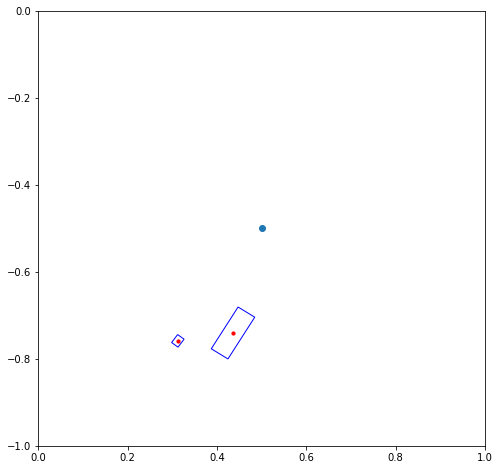

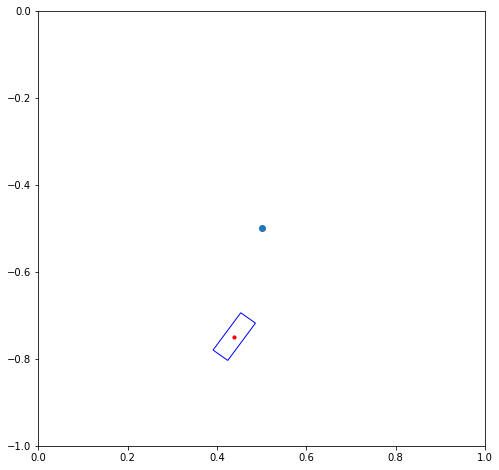

threshold : 0.3
Step : 1350  --  1351 Batch 11.303839 Targets =  36 Ratio = 0.3139955202738444 Threshold (0.5):
Step : 1351  --  1352 Batch 12.171598 Targets =  26 Ratio = 0.4681384013249324 Threshold (0.5):
Step : 1352  --  1353 Batch 10.782637 Targets =  77 Ratio = 0.14003424210981888 Threshold (0.5):
Step : 1353  --  1354 Batch 10.351951 Targets =  57 Ratio = 0.1816131692183645 Threshold (0.5):
Step : 1354  --  1355 Batch 9.75757 Targets =  37 Ratio = 0.26371811531685496 Threshold (0.5):
Step : 1355  --  1356 Batch 10.891352 Targets =  47 Ratio = 0.2317308872304064 Threshold (0.5):
Step : 1356  --  1357 Batch 7.7195086 Targets =  49 Ratio = 0.15754099281466738 Threshold (0.5):
Step : 1357  --  1358 Batch 7.9722323 Targets =  35 Ratio = 0.2277780669076102 Threshold (0.5):
Step : 1358  --  1359 Batch 9.282123 Targets =  46 Ratio = 0.20178527417390243 Threshold (0.5):
Step : 1359  --  1360 Batch 8.984087 Targets =  42 Ratio = 0.21390683310372488 Threshold (0.5):
Step : 1360  --  1361 B

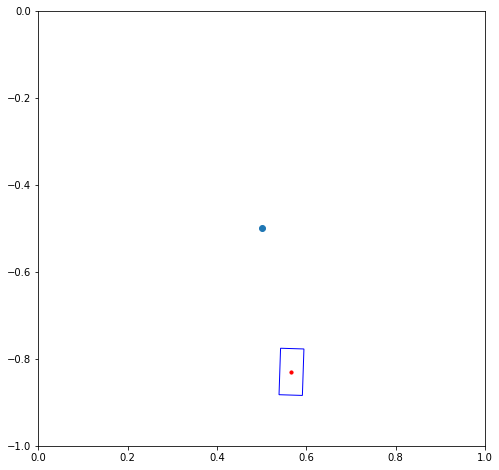

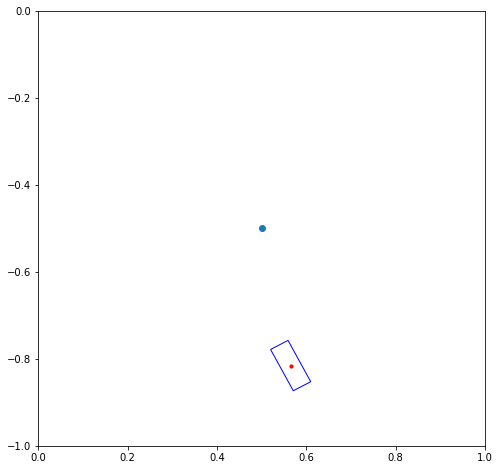

threshold : 0.5
Step : 1400  --  1401 Batch 8.989015 Targets =  73 Ratio = 0.1231371866513605 Threshold (0.5):
Step : 1401  --  1402 Batch 9.70388 Targets =  64 Ratio = 0.15162312984466553 Threshold (0.5):
Step : 1402  --  1403 Batch 10.926142 Targets =  50 Ratio = 0.21852283477783202 Threshold (0.5):
Step : 1403  --  1404 Batch 8.783299 Targets =  56 Ratio = 0.15684463296617782 Threshold (0.5):
Step : 1404  --  1405 Batch 9.203686 Targets =  58 Ratio = 0.15868423724996633 Threshold (0.5):
Step : 1405  --  1406 Batch 11.18458 Targets =  56 Ratio = 0.1997246401650565 Threshold (0.5):
Step : 1406  --  1407 Batch 8.938343 Targets =  37 Ratio = 0.2415768391377217 Threshold (0.5):
Step : 1407  --  1408 Batch 13.015604 Targets =  35 Ratio = 0.37187440054757254 Threshold (0.5):
Step : 1408  --  1409 Batch 12.409658 Targets =  70 Ratio = 0.1772808347429548 Threshold (0.5):
Step : 1409  --  1410 Batch 11.007116 Targets =  49 Ratio = 0.2246350268928372 Threshold (0.5):
Step : 1410  --  1411 Batc

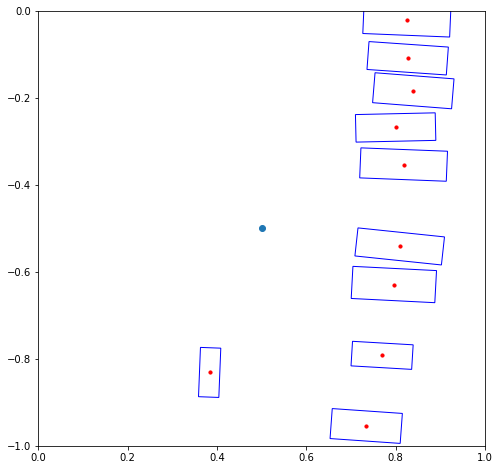

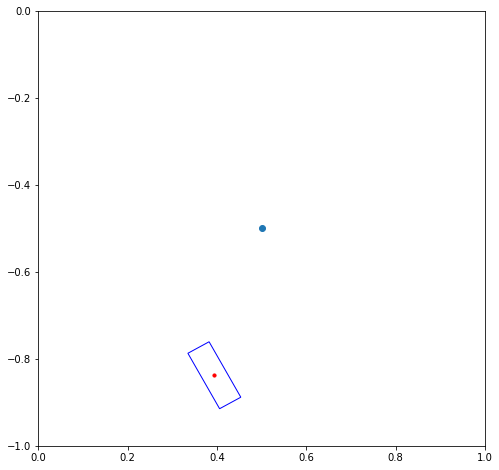

threshold : 0.5
Step : 1450  --  1451 Batch 10.749797 Targets =  57 Ratio = 0.18859292749772993 Threshold (0.5):
Step : 1451  --  1452 Batch 9.918356 Targets =  50 Ratio = 0.19836711883544922 Threshold (0.5):
Step : 1452  --  1453 Batch 9.725595 Targets =  60 Ratio = 0.16209325790405274 Threshold (0.5):
Step : 1453  --  1454 Batch 10.642192 Targets =  51 Ratio = 0.20867042915493833 Threshold (0.5):
Step : 1454  --  1455 Batch 9.561259 Targets =  53 Ratio = 0.18040111829649727 Threshold (0.5):
Step : 1455  --  1456 Batch 12.102245 Targets =  61 Ratio = 0.19839746443951717 Threshold (0.5):
Step : 1456  --  1457 Batch 9.126573 Targets =  24 Ratio = 0.38027385870615643 Threshold (0.5):
Step : 1457  --  1458 Batch 10.736229 Targets =  75 Ratio = 0.14314971923828124 Threshold (0.5):
Step : 1458  --  1459 Batch 9.942861 Targets =  40 Ratio = 0.248571515083313 Threshold (0.5):
Step : 1459  --  1460 Batch 8.798462 Targets =  67 Ratio = 0.1313203270755597 Threshold (0.5):
Step : 1460  --  1461 B

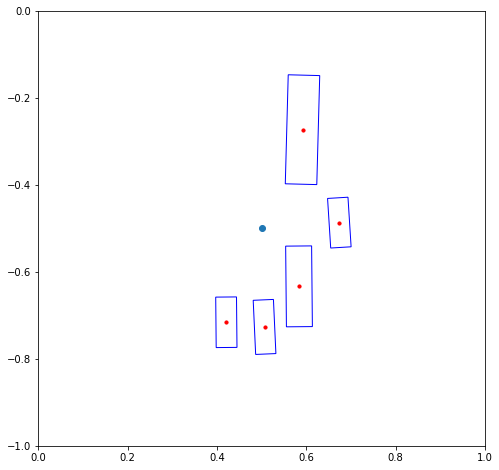

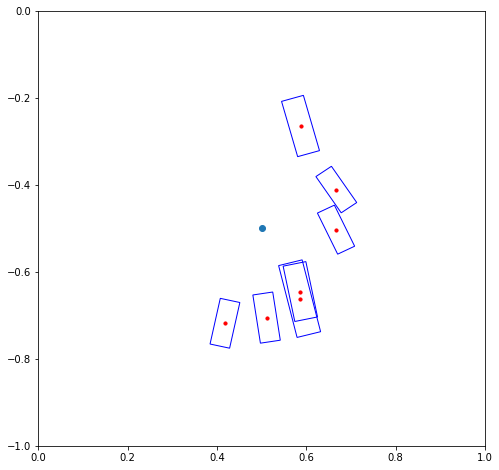

threshold : 0.5
Step : 1500  --  1501 Batch 8.454243 Targets =  34 Ratio = 0.2486541972440832 Threshold (0.5):
Step : 1501  --  1502 Batch 10.014413 Targets =  22 Ratio = 0.4552005854519931 Threshold (0.5):
Step : 1502  --  1503 Batch 11.389877 Targets =  33 Ratio = 0.34514779755563446 Threshold (0.5):
Step : 1503  --  1504 Batch 8.2782135 Targets =  54 Ratio = 0.15330025001808448 Threshold (0.5):
Step : 1504  --  1505 Batch 10.806513 Targets =  59 Ratio = 0.18316123445155258 Threshold (0.5):
Step : 1505  --  1506 Batch 11.601358 Targets =  60 Ratio = 0.1933559735616048 Threshold (0.5):
Step : 1506  --  1507 Batch 11.211168 Targets =  22 Ratio = 0.5095985585992987 Threshold (0.5):
Step : 1507  --  1508 Batch 9.577553 Targets =  66 Ratio = 0.14511443629409326 Threshold (0.5):
Step : 1508  --  1509 Batch 9.13568 Targets =  54 Ratio = 0.16917926293832283 Threshold (0.5):
Step : 1509  --  1510 Batch 10.539629 Targets =  30 Ratio = 0.3513209660847982 Threshold (0.5):
Step : 1510  --  1511 B

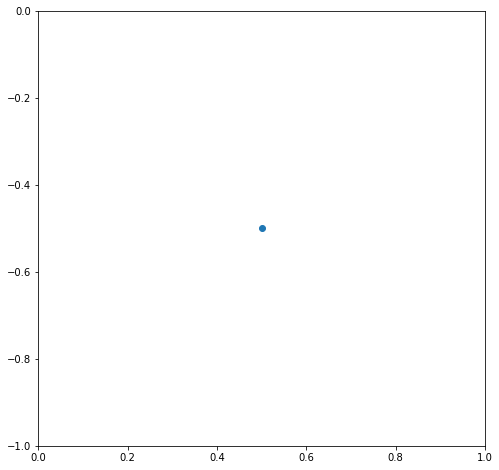

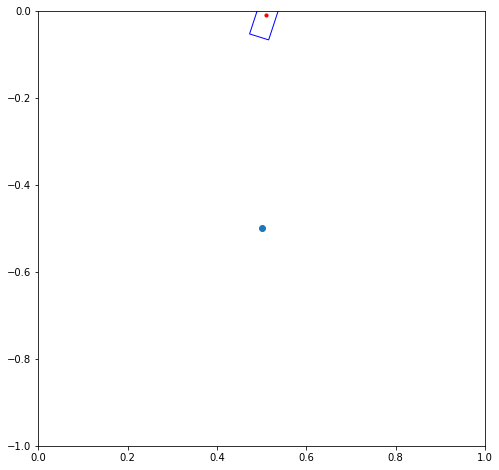

threshold : 0.3
Step : 1550  --  1551 Batch 10.475716 Targets =  40 Ratio = 0.26189289093017576 Threshold (0.5):
Step : 1551  --  1552 Batch 10.616684 Targets =  56 Ratio = 0.1895836421421596 Threshold (0.5):
Step : 1552  --  1553 Batch 9.642862 Targets =  66 Ratio = 0.14610397454464075 Threshold (0.5):
Step : 1553  --  1554 Batch 12.995223 Targets =  59 Ratio = 0.22025801771778172 Threshold (0.5):
Step : 1554  --  1555 Batch 10.913464 Targets =  72 Ratio = 0.15157588322957358 Threshold (0.5):
Step : 1555  --  1556 Batch 8.035813 Targets =  61 Ratio = 0.1317346447803935 Threshold (0.5):
Step : 1556  --  1557 Batch 7.0863514 Targets =  52 Ratio = 0.1362759883587177 Threshold (0.5):
Step : 1557  --  1558 Batch 9.587981 Targets =  63 Ratio = 0.15219017815968347 Threshold (0.5):
Step : 1558  --  1559 Batch 10.942565 Targets =  63 Ratio = 0.17369150736975292 Threshold (0.5):
Step : 1559  --  1560 Batch 13.006472 Targets =  41 Ratio = 0.31723101546124716 Threshold (0.5):
Step : 1560  --  156

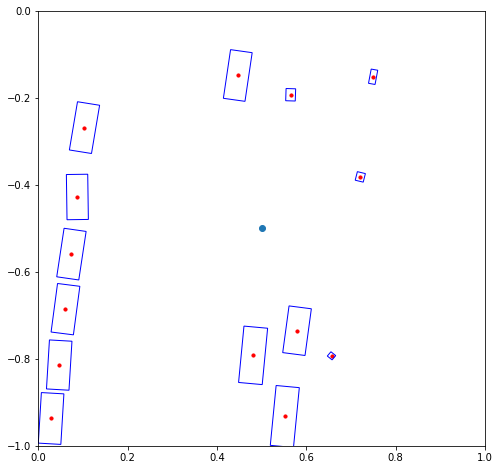

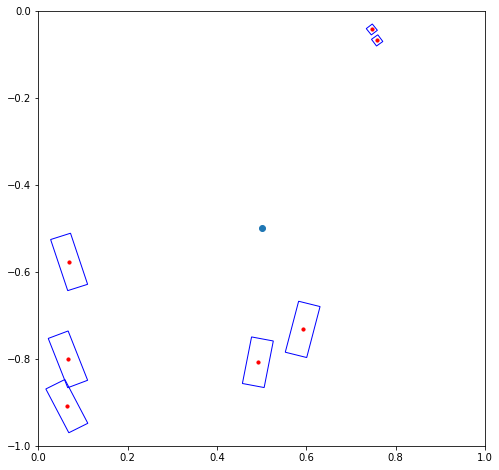

threshold : 0.5
Step : 1600  --  1601 Batch 10.933693 Targets =  59 Ratio = 0.18531682935811705 Threshold (0.5):
Step : 1601  --  1602 Batch 11.195085 Targets =  51 Ratio = 0.2195114621929094 Threshold (0.5):
Step : 1602  --  1603 Batch 10.771421 Targets =  54 Ratio = 0.1994707672684281 Threshold (0.5):
Step : 1603  --  1604 Batch 9.4202795 Targets =  40 Ratio = 0.23550698757171631 Threshold (0.5):
Step : 1604  --  1605 Batch 11.158674 Targets =  66 Ratio = 0.1690708218198834 Threshold (0.5):
Step : 1605  --  1606 Batch 9.193451 Targets =  64 Ratio = 0.1436476707458496 Threshold (0.5):
Step : 1606  --  1607 Batch 12.511257 Targets =  42 Ratio = 0.29788707551502047 Threshold (0.5):
Step : 1607  --  1608 Batch 11.320347 Targets =  49 Ratio = 0.23102748637296716 Threshold (0.5):
Step : 1608  --  1609 Batch 13.256266 Targets =  39 Ratio = 0.3399042471861228 Threshold (0.5):
Step : 1609  --  1610 Batch 10.798786 Targets =  66 Ratio = 0.16361797217166785 Threshold (0.5):
Step : 1610  --  161

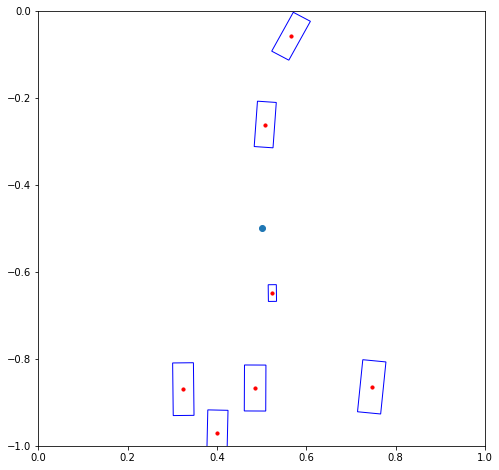

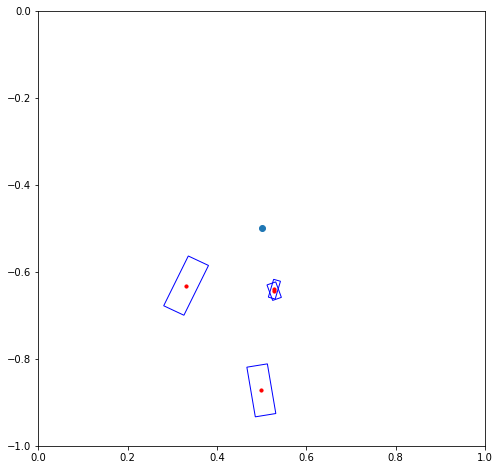

threshold : 0.5
Step : 1650  --  1651 Batch 10.453114 Targets =  34 Ratio = 0.3074445163502413 Threshold (0.5):
Step : 1651  --  1652 Batch 10.760811 Targets =  54 Ratio = 0.19927427503797743 Threshold (0.5):
Step : 1652  --  1653 Batch 11.007886 Targets =  56 Ratio = 0.1965693916593279 Threshold (0.5):
Step : 1653  --  1654 Batch 11.171467 Targets =  51 Ratio = 0.21904836916456036 Threshold (0.5):
Step : 1654  --  1655 Batch 13.082196 Targets =  52 Ratio = 0.25158069683955264 Threshold (0.5):
Step : 1655  --  1656 Batch 9.936575 Targets =  34 Ratio = 0.2922522039974437 Threshold (0.5):
Step : 1656  --  1657 Batch 11.109402 Targets =  51 Ratio = 0.21783140593884037 Threshold (0.5):
Step : 1657  --  1658 Batch 9.411032 Targets =  68 Ratio = 0.1383975253385656 Threshold (0.5):
Step : 1658  --  1659 Batch 11.193008 Targets =  52 Ratio = 0.21525016197791466 Threshold (0.5):
Step : 1659  --  1660 Batch 9.692977 Targets =  34 Ratio = 0.28508755739997416 Threshold (0.5):
Step : 1660  --  1661

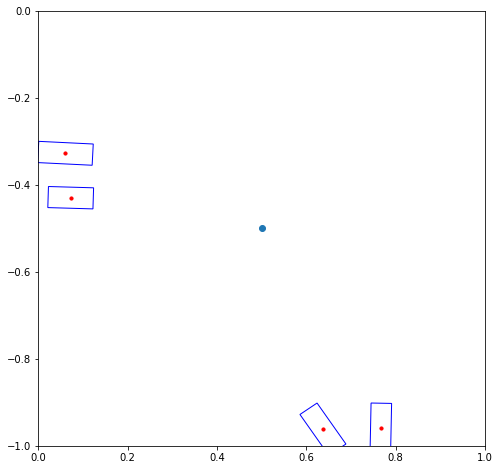

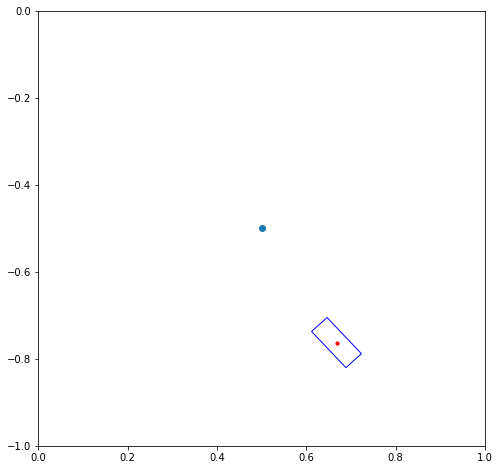

threshold : 0.5
Step : 1700  --  1701 Batch 13.8171425 Targets =  54 Ratio = 0.2558730090105975 Threshold (0.5):
Step : 1701  --  1702 Batch 10.920187 Targets =  36 Ratio = 0.30333852767944336 Threshold (0.5):
Step : 1702  --  1703 Batch 10.792592 Targets =  39 Ratio = 0.2767331294524364 Threshold (0.5):
Step : 1703  --  1704 Batch 11.337267 Targets =  57 Ratio = 0.19889941968415914 Threshold (0.5):
Step : 1704  --  1705 Batch 9.959531 Targets =  61 Ratio = 0.16327099721939836 Threshold (0.5):
Step : 1705  --  1706 Batch 10.02577 Targets =  35 Ratio = 0.2864505767822266 Threshold (0.5):
Step : 1706  --  1707 Batch 11.800762 Targets =  42 Ratio = 0.28097052801223027 Threshold (0.5):
Step : 1707  --  1708 Batch 8.915699 Targets =  36 Ratio = 0.24765830569797093 Threshold (0.5):
Step : 1708  --  1709 Batch 8.737432 Targets =  46 Ratio = 0.18994416361269745 Threshold (0.5):
Step : 1709  --  1710 Batch 9.416388 Targets =  56 Ratio = 0.1681497778211321 Threshold (0.5):
Step : 1710  --  1711 

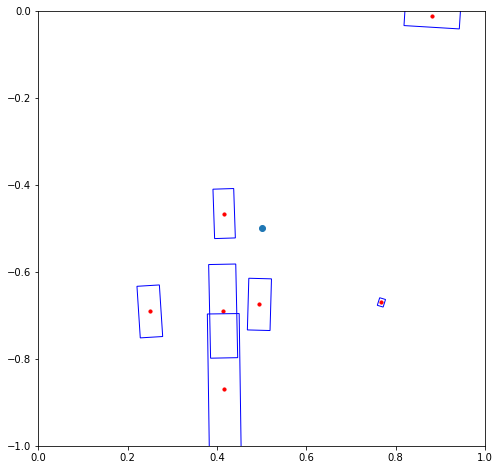

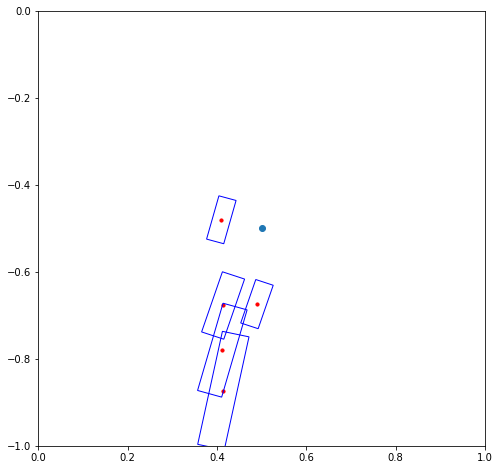

threshold : 0.5
Step : 1750  --  1751 Batch 8.786013 Targets =  43 Ratio = 0.20432587557060775 Threshold (0.5):
Step : 1751  --  1752 Batch 11.146329 Targets =  29 Ratio = 0.38435616986504917 Threshold (0.5):
Step : 1752  --  1753 Batch 10.778521 Targets =  70 Ratio = 0.15397886548723494 Threshold (0.5):
Step : 1753  --  1754 Batch 9.38121 Targets =  59 Ratio = 0.15900356486692266 Threshold (0.5):
Step : 1754  --  1755 Batch 9.294116 Targets =  55 Ratio = 0.16898392764004794 Threshold (0.5):
Step : 1755  --  1756 Batch 9.503587 Targets =  72 Ratio = 0.13199426068200004 Threshold (0.5):
Step : 1756  --  1757 Batch 10.787547 Targets =  47 Ratio = 0.22952227896832406 Threshold (0.5):
Step : 1757  --  1758 Batch 10.140578 Targets =  48 Ratio = 0.211262047290802 Threshold (0.5):
Step : 1758  --  1759 Batch 10.406684 Targets =  42 Ratio = 0.2477781886146182 Threshold (0.5):
Step : 1759  --  1760 Batch 10.897694 Targets =  36 Ratio = 0.30271371205647785 Threshold (0.5):
Step : 1760  --  1761 

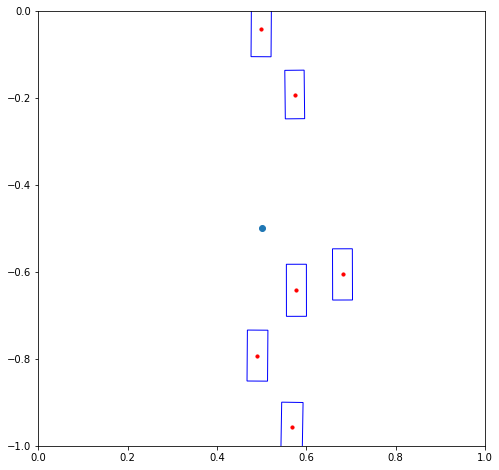

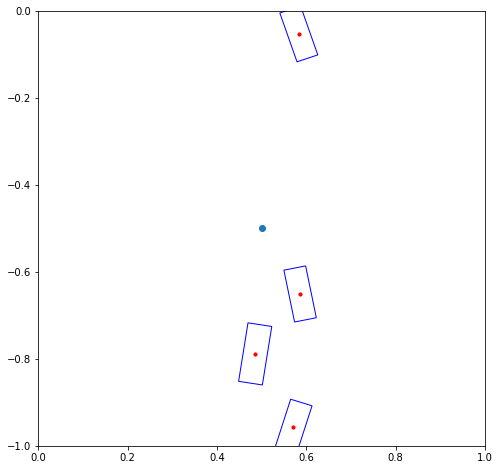

threshold : 0.5
Step : 1800  --  1801 Batch 9.370964 Targets =  47 Ratio = 0.19938221383602062 Threshold (0.5):
Step : 1801  --  1802 Batch 10.178044 Targets =  56 Ratio = 0.18175079141344344 Threshold (0.5):
Step : 1802  --  1803 Batch 11.35349 Targets =  37 Ratio = 0.3068510777241475 Threshold (0.5):
Step : 1803  --  1804 Batch 9.618216 Targets =  61 Ratio = 0.15767566493300142 Threshold (0.5):
Step : 1804  --  1805 Batch 9.150442 Targets =  60 Ratio = 0.15250736872355145 Threshold (0.5):
Step : 1805  --  1806 Batch 10.245908 Targets =  56 Ratio = 0.18296263899121964 Threshold (0.5):
Step : 1806  --  1807 Batch 11.967732 Targets =  36 Ratio = 0.33243701193067765 Threshold (0.5):
Step : 1807  --  1808 Batch 10.415617 Targets =  48 Ratio = 0.21699202060699463 Threshold (0.5):
Step : 1808  --  1809 Batch 11.315623 Targets =  42 Ratio = 0.26941960198538645 Threshold (0.5):
Step : 1809  --  1810 Batch 11.1708145 Targets =  63 Ratio = 0.17731451609778026 Threshold (0.5):
Step : 1810  --  1

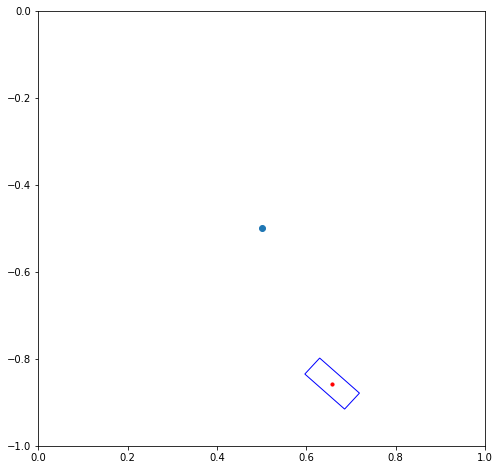

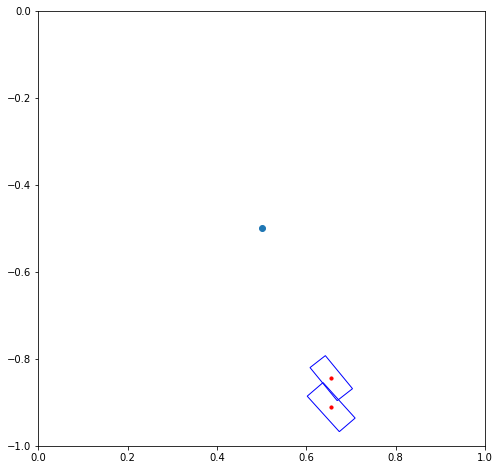

threshold : 0.3
Step : 1850  --  1851 Batch 11.204159 Targets =  35 Ratio = 0.3201188223702567 Threshold (0.5):
Step : 1851  --  1852 Batch 11.900727 Targets =  44 Ratio = 0.2704710743644021 Threshold (0.5):
Step : 1852  --  1853 Batch 13.385831 Targets =  46 Ratio = 0.290996323461118 Threshold (0.5):
Step : 1853  --  1854 Batch 10.3776245 Targets =  52 Ratio = 0.1995697021484375 Threshold (0.5):
Step : 1854  --  1855 Batch 10.789474 Targets =  51 Ratio = 0.21155830458098768 Threshold (0.5):
Step : 1855  --  1856 Batch 9.7758465 Targets =  56 Ratio = 0.17456868716648646 Threshold (0.5):
Step : 1856  --  1857 Batch 13.071278 Targets =  39 Ratio = 0.3351609645745693 Threshold (0.5):
Step : 1857  --  1858 Batch 11.110037 Targets =  46 Ratio = 0.24152254021686057 Threshold (0.5):
Step : 1858  --  1859 Batch 11.429062 Targets =  54 Ratio = 0.21164929425274884 Threshold (0.5):
Step : 1859  --  1860 Batch 9.865364 Targets =  62 Ratio = 0.1591187753985005 Threshold (0.5):
Step : 1860  --  1861

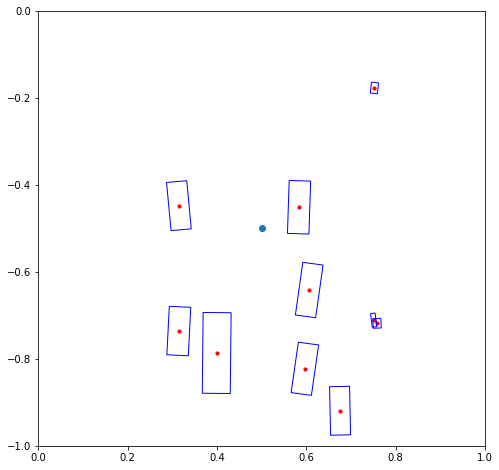

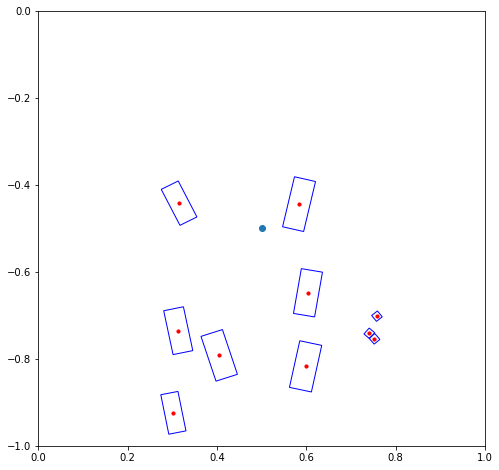

threshold : 0.5
Step : 1900  --  1901 Batch 7.583998 Targets =  47 Ratio = 0.16136166389952314 Threshold (0.5):
Step : 1901  --  1902 Batch 9.609777 Targets =  48 Ratio = 0.2002036968866984 Threshold (0.5):
Step : 1902  --  1903 Batch 8.100788 Targets =  48 Ratio = 0.16876641909281412 Threshold (0.5):
Step : 1903  --  1904 Batch 10.839381 Targets =  56 Ratio = 0.19356037889208114 Threshold (0.5):
Step : 1904  --  1905 Batch 10.134255 Targets =  69 Ratio = 0.14687326680059018 Threshold (0.5):
Step : 1905  --  1906 Batch 10.2864 Targets =  47 Ratio = 0.2188595710916722 Threshold (0.5):
Step : 1906  --  1907 Batch 16.479103 Targets =  41 Ratio = 0.40192934361899774 Threshold (0.5):
Step : 1907  --  1908 Batch 8.372341 Targets =  48 Ratio = 0.1744237740834554 Threshold (0.5):
Step : 1908  --  1909 Batch 8.907581 Targets =  92 Ratio = 0.09682153618854025 Threshold (0.5):
Step : 1909  --  1910 Batch 11.545984 Targets =  36 Ratio = 0.3207217852274577 Threshold (0.5):
Step : 1910  --  1911 Bat

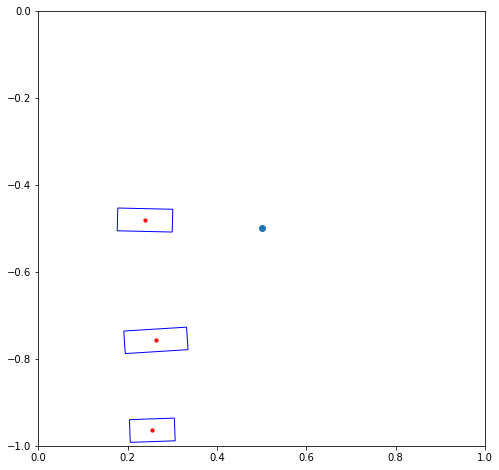

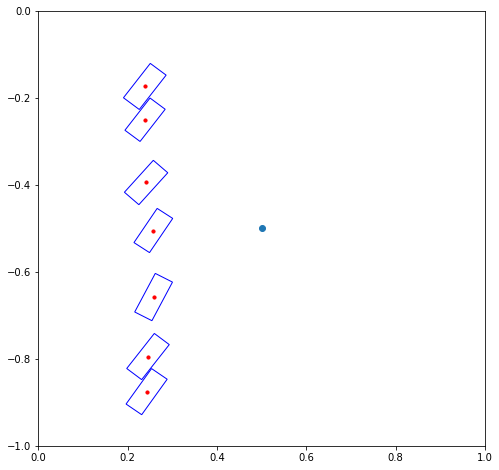

threshold : 0.5
Step : 1950  --  1951 Batch 13.30114 Targets =  53 Ratio = 0.2509649024819428 Threshold (0.5):
Step : 1951  --  1952 Batch 9.252953 Targets =  44 Ratio = 0.21029437672008167 Threshold (0.5):
Step : 1952  --  1953 Batch 12.266605 Targets =  37 Ratio = 0.3315298750593856 Threshold (0.5):
Step : 1953  --  1954 Batch 9.933923 Targets =  65 Ratio = 0.15282958104060246 Threshold (0.5):
Step : 1954  --  1955 Batch 9.859395 Targets =  61 Ratio = 0.16162942667476465 Threshold (0.5):
Step : 1955  --  1956 Batch 8.54269 Targets =  47 Ratio = 0.18175936759786404 Threshold (0.5):
Step : 1956  --  1957 Batch 12.586651 Targets =  40 Ratio = 0.3146662712097168 Threshold (0.5):
Step : 1957  --  1958 Batch 8.923213 Targets =  34 Ratio = 0.26244744132546816 Threshold (0.5):
Step : 1958  --  1959 Batch 11.903366 Targets =  65 Ratio = 0.1831287090594952 Threshold (0.5):
Step : 1959  --  1960 Batch 11.930229 Targets =  26 Ratio = 0.45885496873121995 Threshold (0.5):
Step : 1960  --  1961 Bat

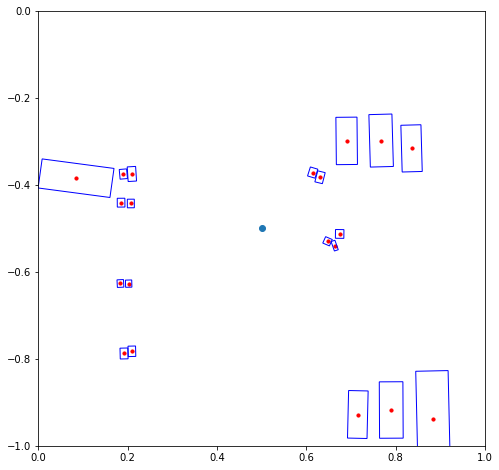

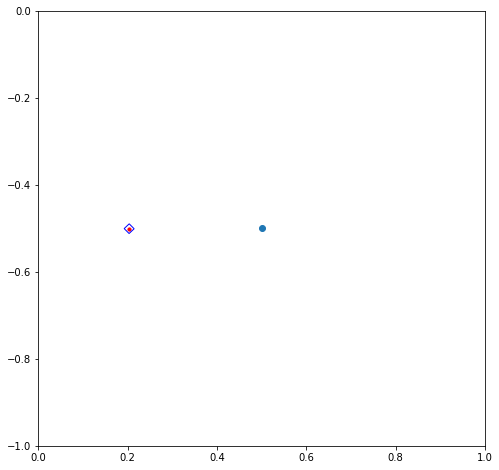

threshold : 0.5
Step : 2000  --  2001 Batch 8.351365 Targets =  42 Ratio = 0.19884202593848818 Threshold (0.5):
Step : 2001  --  2002 Batch 12.798261 Targets =  33 Ratio = 0.3878260814782345 Threshold (0.5):
Step : 2002  --  2003 Batch 8.384867 Targets =  34 Ratio = 0.2466137268963982 Threshold (0.5):
Step : 2003  --  2004 Batch 11.757819 Targets =  61 Ratio = 0.19275113402820024 Threshold (0.5):
Step : 2004  --  2005 Batch 10.412533 Targets =  43 Ratio = 0.2421519257301508 Threshold (0.5):
Step : 2005  --  2006 Batch 12.099964 Targets =  92 Ratio = 0.1315213493678881 Threshold (0.5):
Step : 2006  --  2007 Batch 9.886118 Targets =  27 Ratio = 0.36615251611780236 Threshold (0.5):
Step : 2007  --  2008 Batch 12.951345 Targets =  55 Ratio = 0.23547900806773792 Threshold (0.5):
Step : 2008  --  2009 Batch 9.184143 Targets =  62 Ratio = 0.14813133978074597 Threshold (0.5):
Step : 2009  --  2010 Batch 10.140791 Targets =  68 Ratio = 0.14912927851957433 Threshold (0.5):
Step : 2010  --  2011 

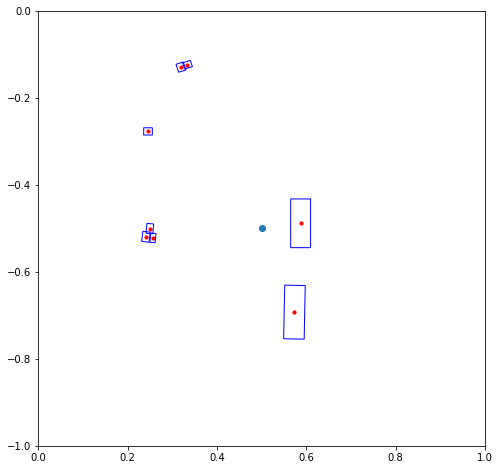

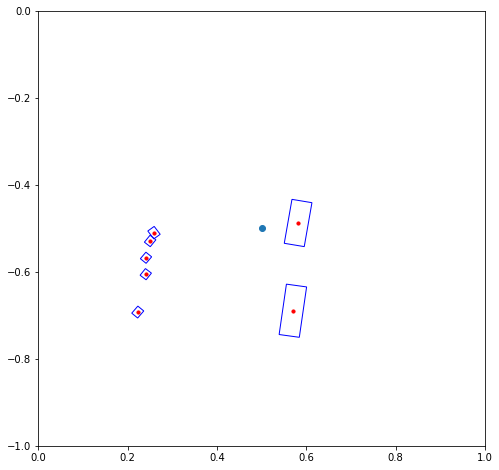

threshold : 0.5
Step : 2050  --  2051 Batch 11.014578 Targets =  49 Ratio = 0.2247873033796038 Threshold (0.5):
Step : 2051  --  2052 Batch 8.594042 Targets =  34 Ratio = 0.2527659360100241 Threshold (0.5):
Step : 2052  --  2053 Batch 8.250751 Targets =  65 Ratio = 0.12693462371826172 Threshold (0.5):
Step : 2053  --  2054 Batch 10.094463 Targets =  66 Ratio = 0.15294641436952533 Threshold (0.5):
Step : 2054  --  2055 Batch 11.21902 Targets =  54 Ratio = 0.20775962758947303 Threshold (0.5):
Step : 2055  --  2056 Batch 12.117604 Targets =  57 Ratio = 0.21258954834519772 Threshold (0.5):
Step : 2056  --  2057 Batch 10.274975 Targets =  53 Ratio = 0.1938674494905292 Threshold (0.5):
Step : 2057  --  2058 Batch 12.7411995 Targets =  61 Ratio = 0.20887212284275744 Threshold (0.5):
Step : 2058  --  2059 Batch 10.9311695 Targets =  44 Ratio = 0.2484356706792658 Threshold (0.5):
Step : 2059  --  2060 Batch 11.183379 Targets =  58 Ratio = 0.1928168822979105 Threshold (0.5):
Step : 2060  --  206

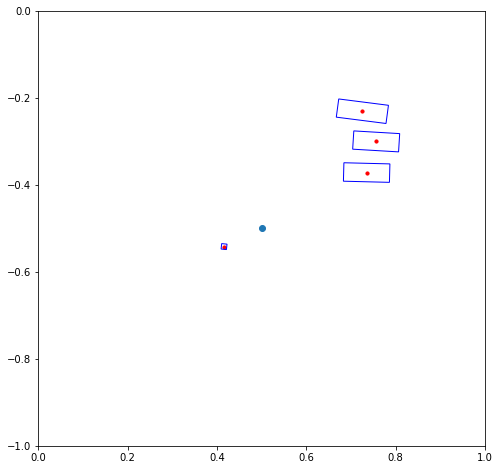

Nothing !!!!
Step : 2100  --  2101 Batch 7.8771896 Targets =  50 Ratio = 0.1575437927246094 Threshold (0.5):
Step : 2101  --  2102 Batch 11.238113 Targets =  65 Ratio = 0.17289405235877403 Threshold (0.5):
Step : 2102  --  2103 Batch 10.006378 Targets =  52 Ratio = 0.1924303494966947 Threshold (0.5):
Step : 2103  --  2104 Batch 9.790506 Targets =  56 Ratio = 0.17483047076633998 Threshold (0.5):
Step : 2104  --  2105 Batch 8.897261 Targets =  58 Ratio = 0.15340104596368198 Threshold (0.5):
Step : 2105  --  2106 Batch 11.185265 Targets =  71 Ratio = 0.15753893785073725 Threshold (0.5):
Step : 2106  --  2107 Batch 9.060717 Targets =  42 Ratio = 0.2157313483101981 Threshold (0.5):
Step : 2107  --  2108 Batch 11.53331 Targets =  71 Ratio = 0.16244098502145687 Threshold (0.5):
Step : 2108  --  2109 Batch 10.280432 Targets =  50 Ratio = 0.20560863494873047 Threshold (0.5):
Step : 2109  --  2110 Batch 11.981363 Targets =  43 Ratio = 0.2786363557327625 Threshold (0.5):
Step : 2110  --  2111 Bat

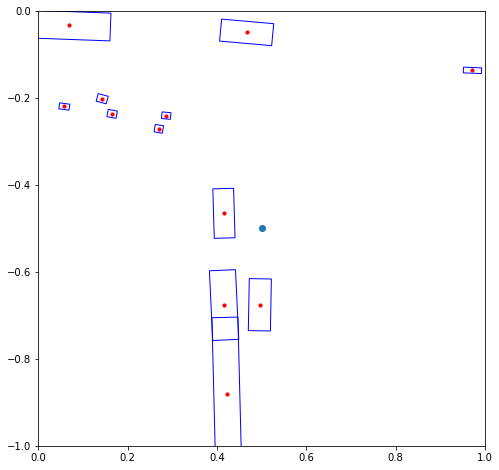

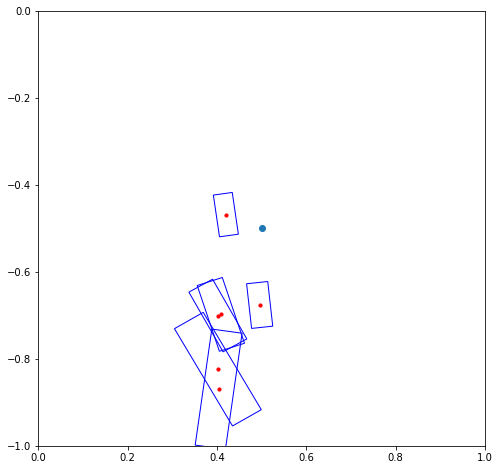

threshold : 0.5
Step : 2150  --  2151 Batch 9.903744 Targets =  54 Ratio = 0.18340266192400898 Threshold (0.5):
Step : 2151  --  2152 Batch 12.102692 Targets =  35 Ratio = 0.3457911900111607 Threshold (0.5):
Step : 2152  --  2153 Batch 10.362427 Targets =  53 Ratio = 0.19551748599646226 Threshold (0.5):
Step : 2153  --  2154 Batch 9.181122 Targets =  53 Ratio = 0.17322871370135612 Threshold (0.5):
Step : 2154  --  2155 Batch 9.236165 Targets =  63 Ratio = 0.14660579439193483 Threshold (0.5):
Step : 2155  --  2156 Batch 13.0631485 Targets =  50 Ratio = 0.26126296997070314 Threshold (0.5):
Step : 2156  --  2157 Batch 8.958408 Targets =  44 Ratio = 0.2036001899025657 Threshold (0.5):
Step : 2157  --  2158 Batch 9.277658 Targets =  50 Ratio = 0.1855531692504883 Threshold (0.5):
Step : 2158  --  2159 Batch 9.988658 Targets =  63 Ratio = 0.1585501262119838 Threshold (0.5):
Step : 2159  --  2160 Batch 10.44843 Targets =  37 Ratio = 0.28239000165784683 Threshold (0.5):
Step : 2160  --  2161 Ba

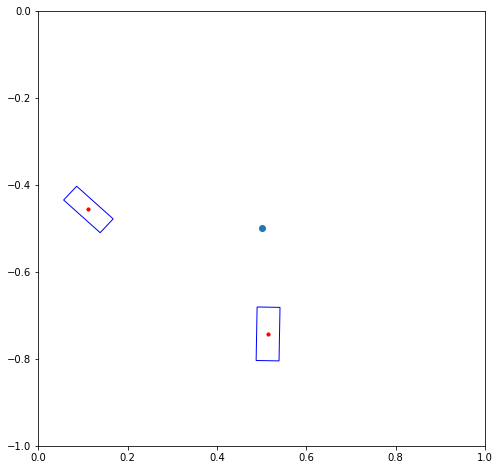

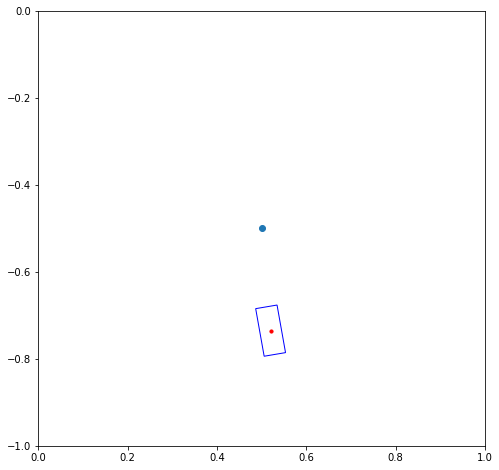

threshold : 0.5
Step : 2200  --  2201 Batch 10.522527 Targets =  50 Ratio = 0.21045053482055665 Threshold (0.5):
Step : 2201  --  2202 Batch 10.159561 Targets =  55 Ratio = 0.18471929376775567 Threshold (0.5):
Step : 2202  --  2203 Batch 9.427594 Targets =  27 Ratio = 0.34917015499538845 Threshold (0.5):
Step : 2203  --  2204 Batch 10.304134 Targets =  50 Ratio = 0.20608268737792967 Threshold (0.5):
Step : 2204  --  2205 Batch 7.9946938 Targets =  37 Ratio = 0.21607280421901393 Threshold (0.5):
Step : 2205  --  2206 Batch 11.796616 Targets =  75 Ratio = 0.1572882080078125 Threshold (0.5):
Step : 2206  --  2207 Batch 11.8082485 Targets =  46 Ratio = 0.2567010547803796 Threshold (0.5):
Step : 2207  --  2208 Batch 11.942851 Targets =  49 Ratio = 0.24373165442019093 Threshold (0.5):
Step : 2208  --  2209 Batch 9.310143 Targets =  51 Ratio = 0.18255183276008158 Threshold (0.5):
Step : 2209  --  2210 Batch 10.677056 Targets =  65 Ratio = 0.1642624048086313 Threshold (0.5):
Step : 2210  --  2

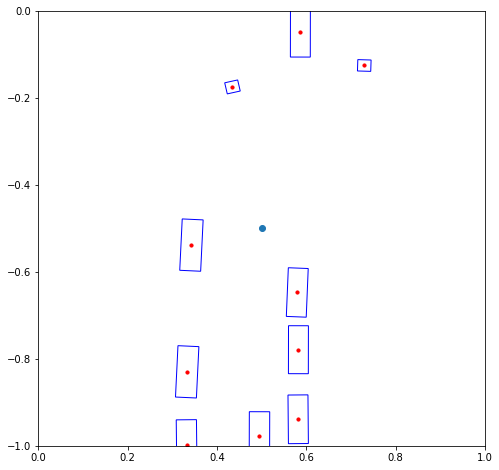

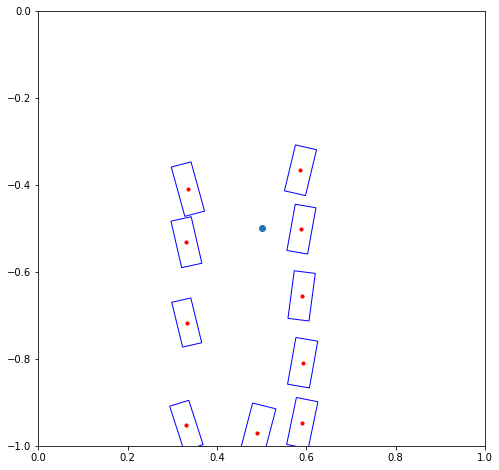

threshold : 0.5
Step : 2250  --  2251 Batch 13.002352 Targets =  54 Ratio = 0.24078429186785663 Threshold (0.5):
Step : 2251  --  2252 Batch 10.239428 Targets =  32 Ratio = 0.31998211145401 Threshold (0.5):
Step : 2252  --  2253 Batch 8.857586 Targets =  32 Ratio = 0.2767995595932007 Threshold (0.5):
Step : 2253  --  2254 Batch 11.481785 Targets =  52 Ratio = 0.22080355424147385 Threshold (0.5):
Step : 2254  --  2255 Batch 9.759612 Targets =  34 Ratio = 0.2870474142186782 Threshold (0.5):
Step : 2255  --  2256 Batch 9.886913 Targets =  33 Ratio = 0.2996034333200166 Threshold (0.5):
Step : 2256  --  2257 Batch 10.72834 Targets =  44 Ratio = 0.24382591247558594 Threshold (0.5):
Step : 2257  --  2258 Batch 11.212992 Targets =  77 Ratio = 0.14562326901918882 Threshold (0.5):
Step : 2258  --  2259 Batch 9.83282 Targets =  51 Ratio = 0.19280039095411114 Threshold (0.5):
Step : 2259  --  2260 Batch 9.254892 Targets =  51 Ratio = 0.18146847743614047 Threshold (0.5):
Step : 2260  --  2261 Batch

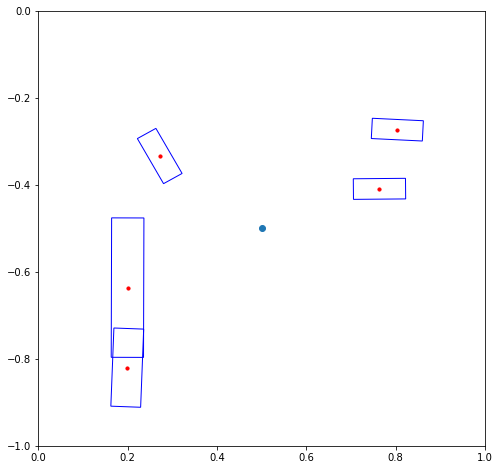

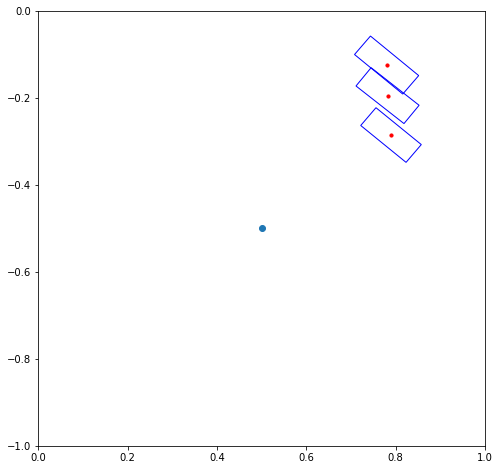

threshold : 0.3
Step : 2300  --  2301 Batch 13.004326 Targets =  73 Ratio = 0.1781414502287564 Threshold (0.5):
Step : 2301  --  2302 Batch 9.048616 Targets =  39 Ratio = 0.23201580536671174 Threshold (0.5):
Step : 2302  --  2303 Batch 9.481649 Targets =  56 Ratio = 0.16931516783578054 Threshold (0.5):
Step : 2303  --  2304 Batch 10.409504 Targets =  56 Ratio = 0.1858839988708496 Threshold (0.5):
Step : 2304  --  2305 Batch 7.3925433 Targets =  40 Ratio = 0.18481358289718627 Threshold (0.5):
Step : 2305  --  2306 Batch 10.096038 Targets =  64 Ratio = 0.15775059163570404 Threshold (0.5):
Step : 2306  --  2307 Batch 11.131642 Targets =  45 Ratio = 0.24736982981363934 Threshold (0.5):
Step : 2307  --  2308 Batch 8.842692 Targets =  47 Ratio = 0.18814239096134266 Threshold (0.5):
Step : 2308  --  2309 Batch 9.109976 Targets =  61 Ratio = 0.1493438658167104 Threshold (0.5):
Step : 2309  --  2310 Batch 9.259951 Targets =  35 Ratio = 0.2645700182233538 Threshold (0.5):
Step : 2310  --  2311 B

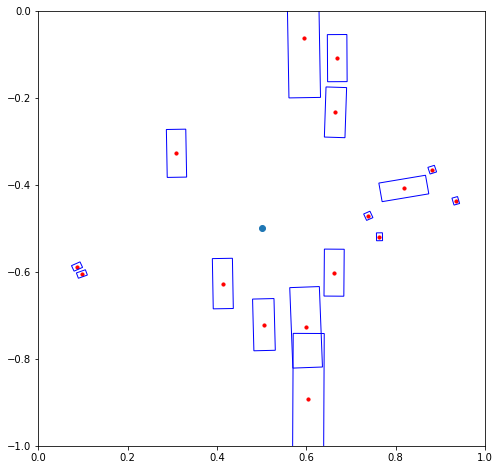

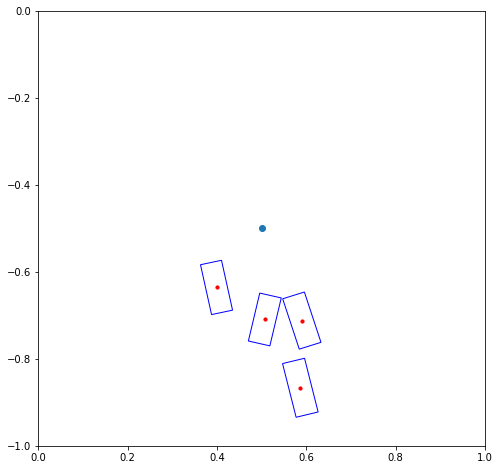

threshold : 0.5
Step : 2350  --  2351 Batch 13.18764 Targets =  23 Ratio = 0.5733756604401962 Threshold (0.5):
Step : 2351  --  2352 Batch 12.548048 Targets =  46 Ratio = 0.27278365259585174 Threshold (0.5):
Step : 2352  --  2353 Batch 14.115398 Targets =  45 Ratio = 0.3136755201551649 Threshold (0.5):
Step : 2353  --  2354 Batch 7.8628693 Targets =  57 Ratio = 0.1379450747841283 Threshold (0.5):
Step : 2354  --  2355 Batch 10.85295 Targets =  92 Ratio = 0.1179668488709823 Threshold (0.5):
Step : 2355  --  2356 Batch 7.210143 Targets =  45 Ratio = 0.16022540198432075 Threshold (0.5):
Step : 2356  --  2357 Batch 9.758619 Targets =  53 Ratio = 0.1841248926126732 Threshold (0.5):
Step : 2357  --  2358 Batch 11.727298 Targets =  57 Ratio = 0.2057420663666307 Threshold (0.5):
Step : 2358  --  2359 Batch 10.749321 Targets =  43 Ratio = 0.24998420892759812 Threshold (0.5):
Step : 2359  --  2360 Batch 9.39573 Targets =  44 Ratio = 0.2135393186049028 Threshold (0.5):
Step : 2360  --  2361 Batch

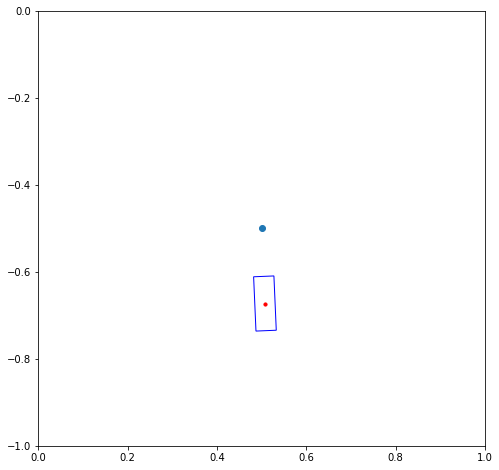

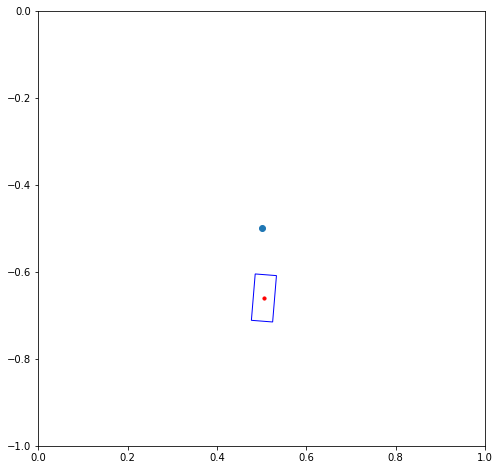

threshold : 0.5
Step : 2400  --  2401 Batch 10.264212 Targets =  51 Ratio = 0.20125905205221736 Threshold (0.5):
Step : 2401  --  2402 Batch 13.302439 Targets =  56 Ratio = 0.23754354885646276 Threshold (0.5):
Step : 2402  --  2403 Batch 9.587784 Targets =  39 Ratio = 0.24584061060196313 Threshold (0.5):
Step : 2403  --  2404 Batch 11.817291 Targets =  57 Ratio = 0.20732089929413378 Threshold (0.5):
Step : 2404  --  2405 Batch 10.014408 Targets =  42 Ratio = 0.23843828837076822 Threshold (0.5):
Step : 2405  --  2406 Batch 10.178495 Targets =  68 Ratio = 0.14968375598683076 Threshold (0.5):
Step : 2406  --  2407 Batch 8.431434 Targets =  57 Ratio = 0.14791988908198841 Threshold (0.5):
Step : 2407  --  2408 Batch 10.58825 Targets =  68 Ratio = 0.15570956117966595 Threshold (0.5):
Step : 2408  --  2409 Batch 12.501011 Targets =  60 Ratio = 0.20835018157958984 Threshold (0.5):
Step : 2409  --  2410 Batch 10.291961 Targets =  68 Ratio = 0.1513523634742288 Threshold (0.5):
Step : 2410  --  2

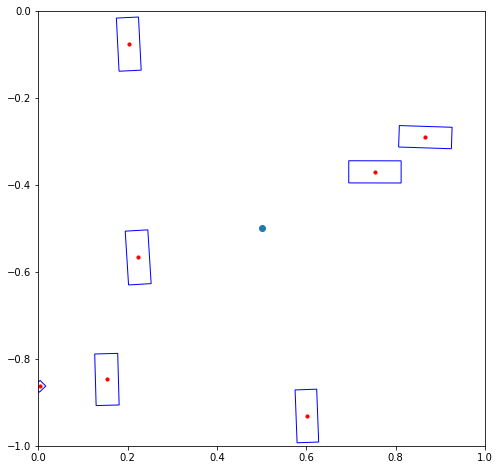

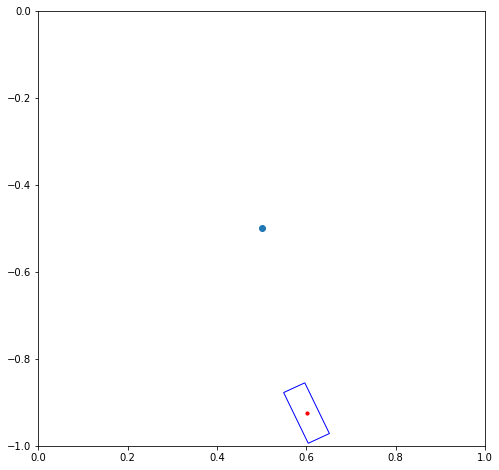

threshold : 0.5
Step : 2450  --  2451 Batch 9.147533 Targets =  33 Ratio = 0.27719798232569837 Threshold (0.5):
Step : 2451  --  2452 Batch 9.846735 Targets =  50 Ratio = 0.19693470001220703 Threshold (0.5):
Step : 2452  --  2453 Batch 9.931341 Targets =  48 Ratio = 0.20690294106801352 Threshold (0.5):
Step : 2453  --  2454 Batch 10.412245 Targets =  28 Ratio = 0.3718658855983189 Threshold (0.5):
Step : 2454  --  2455 Batch 8.475427 Targets =  44 Ratio = 0.19262333349748093 Threshold (0.5):
Step : 2455  --  2456 Batch 10.516528 Targets =  44 Ratio = 0.2390120029449463 Threshold (0.5):
Step : 2456  --  2457 Batch 11.613062 Targets =  26 Ratio = 0.4466562271118164 Threshold (0.5):
Step : 2457  --  2458 Batch 9.249504 Targets =  55 Ratio = 0.16817280162464487 Threshold (0.5):
Step : 2458  --  2459 Batch 11.255871 Targets =  41 Ratio = 0.27453343461199503 Threshold (0.5):
Step : 2459  --  2460 Batch 7.5415525 Targets =  44 Ratio = 0.17139892144636673 Threshold (0.5):
Step : 2460  --  2461 

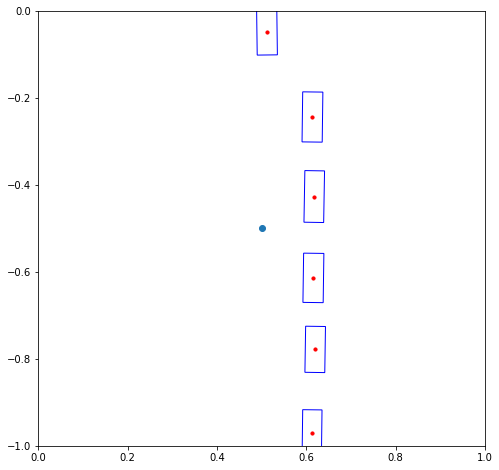

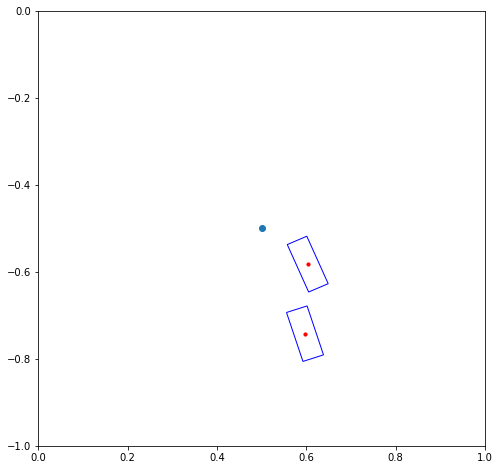

threshold : 0.5
Step : 2500  --  2501 Batch 13.006073 Targets =  47 Ratio = 0.27672495740525266 Threshold (0.5):
Step : 2501  --  2502 Batch 10.393717 Targets =  39 Ratio = 0.26650555928548175 Threshold (0.5):
Step : 2502  --  2503 Batch 10.967645 Targets =  46 Ratio = 0.23842705851015839 Threshold (0.5):
Step : 2503  --  2504 Batch 11.147516 Targets =  45 Ratio = 0.2477225833468967 Threshold (0.5):
Step : 2504  --  2505 Batch 8.722783 Targets =  48 Ratio = 0.18172464768091837 Threshold (0.5):
Step : 2505  --  2506 Batch 10.021177 Targets =  80 Ratio = 0.12526471614837648 Threshold (0.5):
Step : 2506  --  2507 Batch 11.183468 Targets =  53 Ratio = 0.21100882764132517 Threshold (0.5):
Step : 2507  --  2508 Batch 11.184819 Targets =  45 Ratio = 0.2485515382554796 Threshold (0.5):
Step : 2508  --  2509 Batch 7.848545 Targets =  45 Ratio = 0.174412112765842 Threshold (0.5):
Step : 2509  --  2510 Batch 12.780251 Targets =  49 Ratio = 0.2608214397819675 Threshold (0.5):
Step : 2510  --  2511

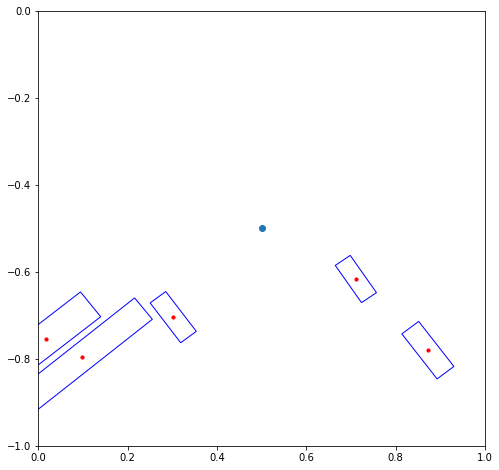

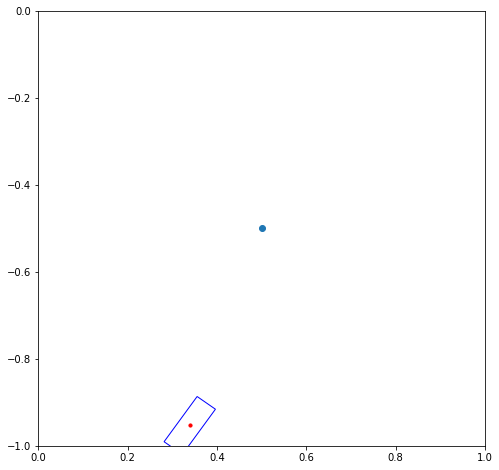

threshold : 0.3
Step : 2550  --  2551 Batch 8.36964 Targets =  36 Ratio = 0.23249000973171657 Threshold (0.5):
Step : 2551  --  2552 Batch 10.745212 Targets =  45 Ratio = 0.23878248002794053 Threshold (0.5):
Step : 2552  --  2553 Batch 11.599598 Targets =  44 Ratio = 0.26362722570245917 Threshold (0.5):
Step : 2553  --  2554 Batch 12.479846 Targets =  61 Ratio = 0.20458763935526864 Threshold (0.5):
Step : 2554  --  2555 Batch 9.152524 Targets =  37 Ratio = 0.2473655133634 Threshold (0.5):
Step : 2555  --  2556 Batch 9.527433 Targets =  66 Ratio = 0.14435505144523852 Threshold (0.5):
Step : 2556  --  2557 Batch 10.096325 Targets =  53 Ratio = 0.19049669661611882 Threshold (0.5):
Step : 2557  --  2558 Batch 13.529701 Targets =  57 Ratio = 0.2373631795247396 Threshold (0.5):
Step : 2558  --  2559 Batch 12.925196 Targets =  54 Ratio = 0.2393554758142542 Threshold (0.5):
Step : 2559  --  2560 Batch 10.898362 Targets =  41 Ratio = 0.26581371121290254 Threshold (0.5):
Step : 2560  --  2561 Ba

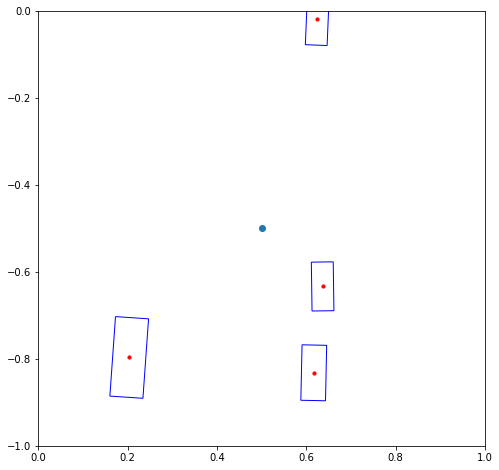

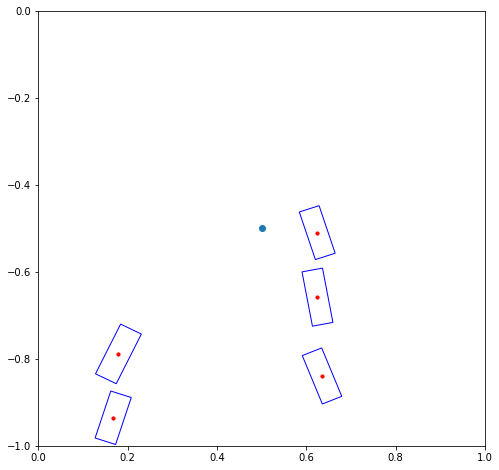

threshold : 0.5
Step : 2600  --  2601 Batch 11.079447 Targets =  44 Ratio = 0.251805608922785 Threshold (0.5):
Step : 2601  --  2602 Batch 10.619192 Targets =  36 Ratio = 0.2949775589836968 Threshold (0.5):
Step : 2602  --  2603 Batch 12.797087 Targets =  31 Ratio = 0.4128092488934917 Threshold (0.5):
Step : 2603  --  2604 Batch 10.649125 Targets =  58 Ratio = 0.18360560515831256 Threshold (0.5):
Step : 2604  --  2605 Batch 7.0491953 Targets =  33 Ratio = 0.21361197847308536 Threshold (0.5):
Step : 2605  --  2606 Batch 12.961769 Targets =  36 Ratio = 0.3600491417778863 Threshold (0.5):
Step : 2606  --  2607 Batch 10.841788 Targets =  40 Ratio = 0.2710447072982788 Threshold (0.5):
Step : 2607  --  2608 Batch 10.7366905 Targets =  57 Ratio = 0.18836299160070585 Threshold (0.5):
Step : 2608  --  2609 Batch 9.649054 Targets =  45 Ratio = 0.2144234127468533 Threshold (0.5):
Step : 2609  --  2610 Batch 6.762012 Targets =  29 Ratio = 0.2331728277535274 Threshold (0.5):
Step : 2610  --  2611 B

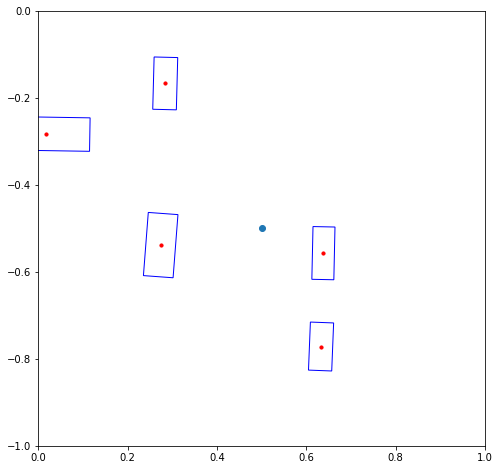

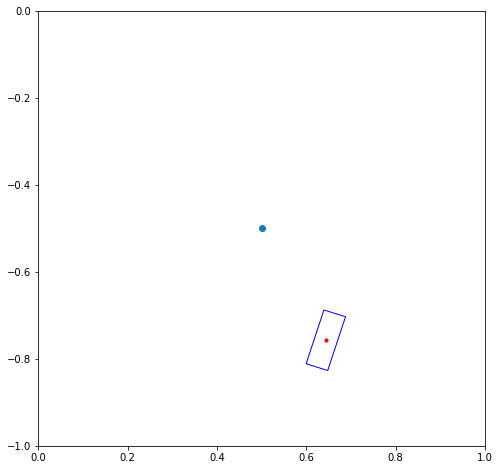

threshold : 0.5
Step : 2650  --  2651 Batch 11.563498 Targets =  49 Ratio = 0.23598974578234613 Threshold (0.5):
Step : 2651  --  2652 Batch 11.146339 Targets =  53 Ratio = 0.2103082908774322 Threshold (0.5):
Step : 2652  --  2653 Batch 12.172374 Targets =  37 Ratio = 0.3289830749099319 Threshold (0.5):
Step : 2653  --  2654 Batch 9.854506 Targets =  37 Ratio = 0.2663379875389305 Threshold (0.5):
Step : 2654  --  2655 Batch 8.906813 Targets =  26 Ratio = 0.3425697179941031 Threshold (0.5):
Step : 2655  --  2656 Batch 13.077145 Targets =  56 Ratio = 0.23352043969290598 Threshold (0.5):
Step : 2656  --  2657 Batch 10.433409 Targets =  88 Ratio = 0.11856146292252974 Threshold (0.5):
Step : 2657  --  2658 Batch 10.523216 Targets =  33 Ratio = 0.3188853408351089 Threshold (0.5):
Step : 2658  --  2659 Batch 10.8328705 Targets =  51 Ratio = 0.21240922516467525 Threshold (0.5):
Step : 2659  --  2660 Batch 12.242894 Targets =  67 Ratio = 0.182729763771171 Threshold (0.5):
Step : 2660  --  2661 

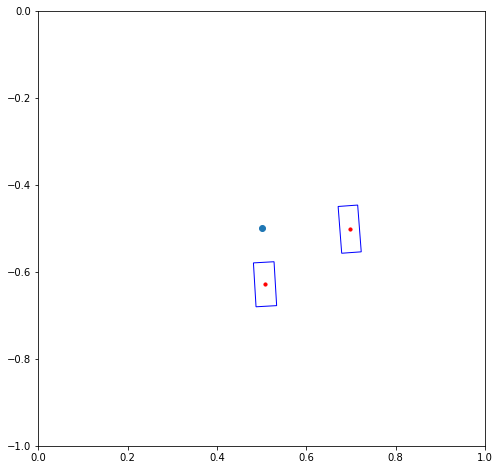

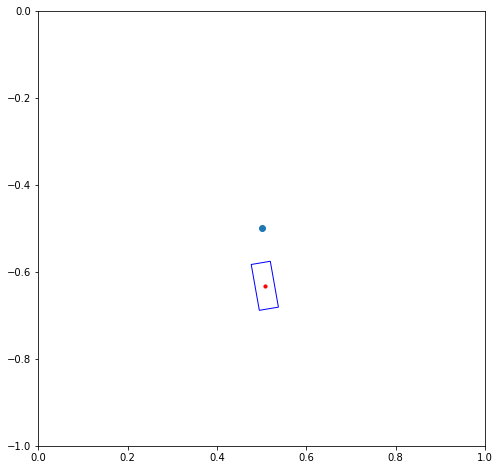

threshold : 0.5
Step : 2700  --  2701 Batch 10.126449 Targets =  44 Ratio = 0.23014655980196866 Threshold (0.5):
Step : 2701  --  2702 Batch 9.10448 Targets =  53 Ratio = 0.1717826375421488 Threshold (0.5):
Step : 2702  --  2703 Batch 9.48489 Targets =  41 Ratio = 0.23133878010075268 Threshold (0.5):
Step : 2703  --  2704 Batch 13.72753 Targets =  26 Ratio = 0.5279819048368014 Threshold (0.5):
Step : 2704  --  2705 Batch 13.126616 Targets =  74 Ratio = 0.1773866962742161 Threshold (0.5):
Step : 2705  --  2706 Batch 12.87656 Targets =  48 Ratio = 0.2682616710662842 Threshold (0.5):
Step : 2706  --  2707 Batch 10.283049 Targets =  66 Ratio = 0.155803767117587 Threshold (0.5):
Step : 2707  --  2708 Batch 12.0646 Targets =  61 Ratio = 0.197780327718766 Threshold (0.5):
Step : 2708  --  2709 Batch 10.252518 Targets =  62 Ratio = 0.16536318871282762 Threshold (0.5):
Step : 2709  --  2710 Batch 14.239732 Targets =  31 Ratio = 0.45934618673016947 Threshold (0.5):
Step : 2710  --  2711 Batch 9.

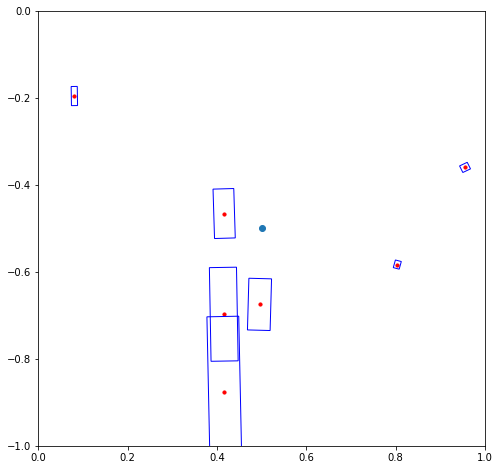

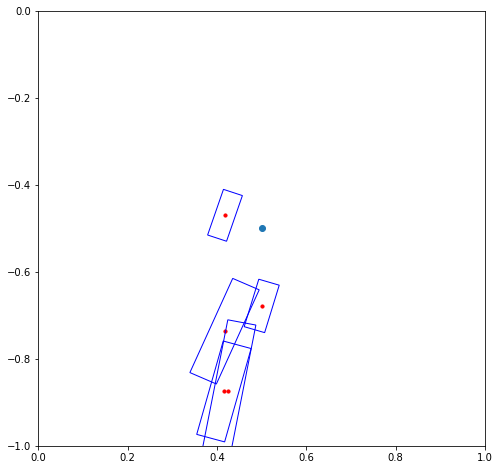

threshold : 0.5
Step : 2750  --  2751 Batch 9.954144 Targets =  62 Ratio = 0.1605507020027407 Threshold (0.5):
Step : 2751  --  2752 Batch 10.398625 Targets =  45 Ratio = 0.23108056386311848 Threshold (0.5):
Step : 2752  --  2753 Batch 10.934733 Targets =  66 Ratio = 0.16567777864860767 Threshold (0.5):
Step : 2753  --  2754 Batch 11.2918415 Targets =  65 Ratio = 0.17372063856858475 Threshold (0.5):
Step : 2754  --  2755 Batch 7.768434 Targets =  43 Ratio = 0.18066125692323196 Threshold (0.5):
Step : 2755  --  2756 Batch 10.612245 Targets =  68 Ratio = 0.15606242067673626 Threshold (0.5):
Step : 2756  --  2757 Batch 11.625382 Targets =  27 Ratio = 0.43056971938521776 Threshold (0.5):
Step : 2757  --  2758 Batch 9.606561 Targets =  53 Ratio = 0.18125586239796765 Threshold (0.5):
Step : 2758  --  2759 Batch 10.956715 Targets =  45 Ratio = 0.24348254733615451 Threshold (0.5):
Step : 2759  --  2760 Batch 8.748532 Targets =  52 Ratio = 0.1682410056774433 Threshold (0.5):
Step : 2760  --  27

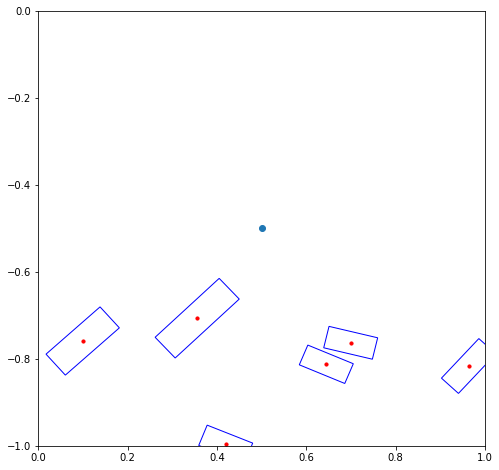

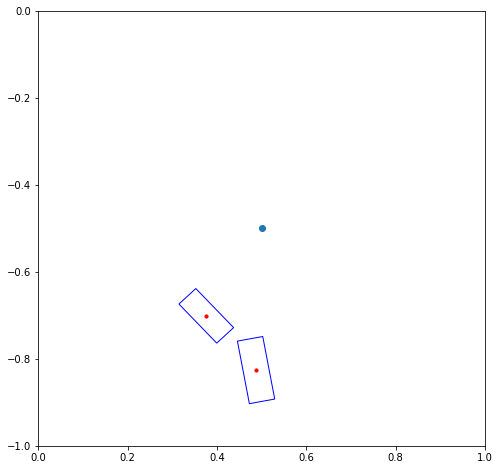

threshold : 0.5
Step : 2800  --  2801 Batch 9.843894 Targets =  46 Ratio = 0.21399769575699515 Threshold (0.5):
Step : 2801  --  2802 Batch 10.451806 Targets =  52 Ratio = 0.20099627054654634 Threshold (0.5):
Step : 2802  --  2803 Batch 10.973225 Targets =  70 Ratio = 0.1567603519984654 Threshold (0.5):
Step : 2803  --  2804 Batch 9.17121 Targets =  67 Ratio = 0.13688373565673828 Threshold (0.5):
Step : 2804  --  2805 Batch 8.597056 Targets =  62 Ratio = 0.1386621998202416 Threshold (0.5):
Step : 2805  --  2806 Batch 9.3340225 Targets =  77 Ratio = 0.1212210717139306 Threshold (0.5):
Step : 2806  --  2807 Batch 8.977764 Targets =  51 Ratio = 0.17603459077722886 Threshold (0.5):
Step : 2807  --  2808 Batch 10.256218 Targets =  57 Ratio = 0.17993364836040296 Threshold (0.5):
Step : 2808  --  2809 Batch 8.914842 Targets =  56 Ratio = 0.15919360092708043 Threshold (0.5):
Step : 2809  --  2810 Batch 10.267211 Targets =  72 Ratio = 0.14260015222761366 Threshold (0.5):
Step : 2810  --  2811 B

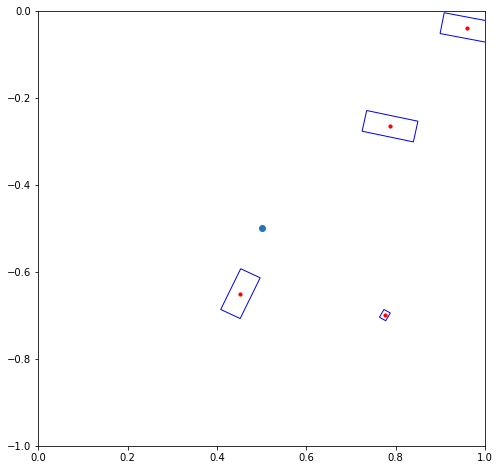

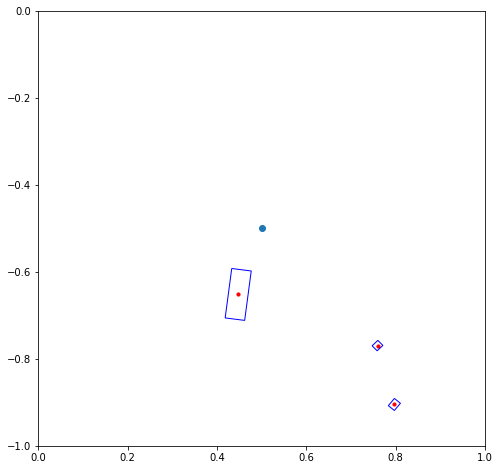

threshold : 0.5
Step : 2850  --  2851 Batch 12.545767 Targets =  34 Ratio = 0.3689931420718922 Threshold (0.5):
Step : 2851  --  2852 Batch 9.569812 Targets =  42 Ratio = 0.22785266240437826 Threshold (0.5):
Step : 2852  --  2853 Batch 9.9119835 Targets =  44 Ratio = 0.2252723520452326 Threshold (0.5):
Step : 2853  --  2854 Batch 12.265804 Targets =  43 Ratio = 0.285251262576081 Threshold (0.5):
Step : 2854  --  2855 Batch 8.939611 Targets =  32 Ratio = 0.27936285734176636 Threshold (0.5):
Step : 2855  --  2856 Batch 10.89835 Targets =  53 Ratio = 0.20562924079175265 Threshold (0.5):
Step : 2856  --  2857 Batch 8.979895 Targets =  68 Ratio = 0.13205727408914006 Threshold (0.5):
Step : 2857  --  2858 Batch 10.771464 Targets =  52 Ratio = 0.20714354515075684 Threshold (0.5):
Step : 2858  --  2859 Batch 10.723674 Targets =  63 Ratio = 0.1702170447697715 Threshold (0.5):
Step : 2859  --  2860 Batch 13.849539 Targets =  32 Ratio = 0.4327980875968933 Threshold (0.5):
Step : 2860  --  2861 Ba

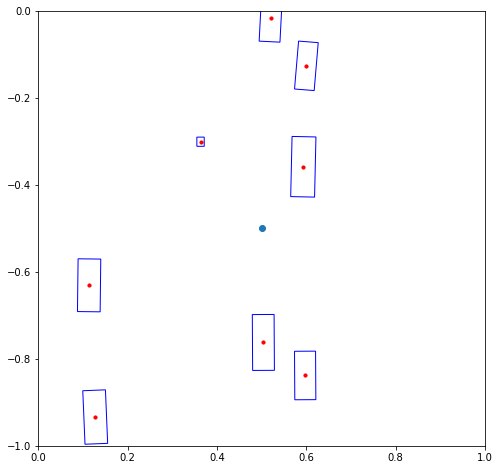

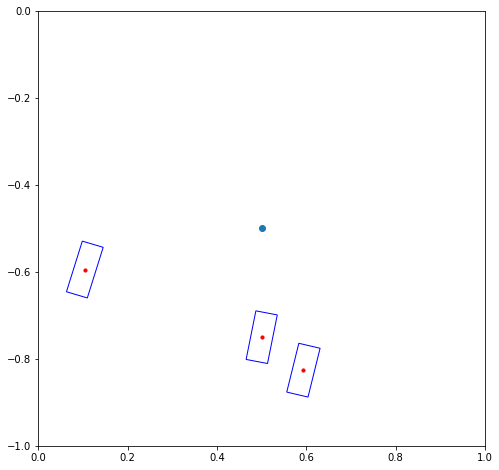

threshold : 0.5
Step : 2900  --  2901 Batch 9.274646 Targets =  33 Ratio = 0.2810498728896632 Threshold (0.5):
Step : 2901  --  2902 Batch 9.015672 Targets =  57 Ratio = 0.15816967947441235 Threshold (0.5):
Step : 2902  --  2903 Batch 13.336089 Targets =  38 Ratio = 0.3509497140583239 Threshold (0.5):
Step : 2903  --  2904 Batch 10.779329 Targets =  54 Ratio = 0.1996172092579029 Threshold (0.5):
Step : 2904  --  2905 Batch 9.969472 Targets =  61 Ratio = 0.16343396608946753 Threshold (0.5):
Step : 2905  --  2906 Batch 10.93813 Targets =  58 Ratio = 0.18858845480557146 Threshold (0.5):
Step : 2906  --  2907 Batch 9.06436 Targets =  35 Ratio = 0.25898170471191406 Threshold (0.5):
Step : 2907  --  2908 Batch 12.168554 Targets =  64 Ratio = 0.19013366103172302 Threshold (0.5):
Step : 2908  --  2909 Batch 9.175174 Targets =  46 Ratio = 0.19946029911870541 Threshold (0.5):
Step : 2909  --  2910 Batch 10.580072 Targets =  74 Ratio = 0.14297395139127164 Threshold (0.5):
Step : 2910  --  2911 Ba

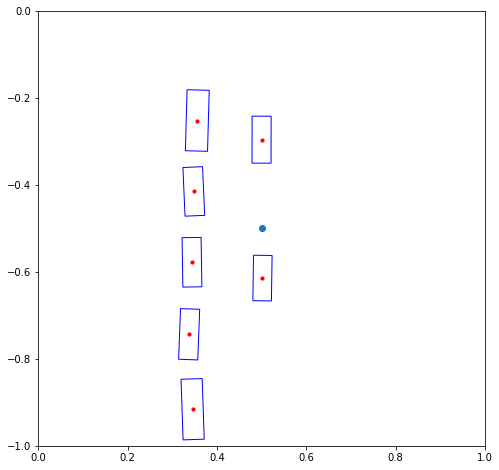

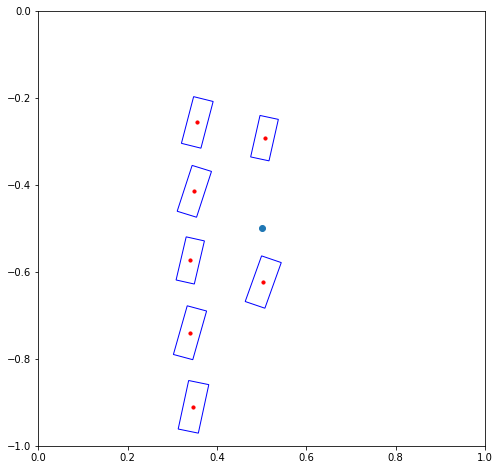

threshold : 0.5
Step : 2950  --  2951 Batch 11.471858 Targets =  51 Ratio = 0.22493839263916016 Threshold (0.5):
Step : 2951  --  2952 Batch 11.2486515 Targets =  78 Ratio = 0.14421348082713592 Threshold (0.5):
Step : 2952  --  2953 Batch 11.252773 Targets =  50 Ratio = 0.2250554656982422 Threshold (0.5):
Step : 2953  --  2954 Batch 10.85973 Targets =  52 Ratio = 0.20884095705472505 Threshold (0.5):
Step : 2954  --  2955 Batch 11.085139 Targets =  31 Ratio = 0.3575851378902312 Threshold (0.5):
Step : 2955  --  2956 Batch 8.801038 Targets =  53 Ratio = 0.16605731676209648 Threshold (0.5):
Step : 2956  --  2957 Batch 10.138849 Targets =  47 Ratio = 0.21572019698772024 Threshold (0.5):
Step : 2957  --  2958 Batch 8.638191 Targets =  56 Ratio = 0.1542534146990095 Threshold (0.5):
Step : 2958  --  2959 Batch 12.27318 Targets =  39 Ratio = 0.3146969232803736 Threshold (0.5):
Step : 2959  --  2960 Batch 11.369068 Targets =  75 Ratio = 0.1515875752766927 Threshold (0.5):
Step : 2960  --  2961 

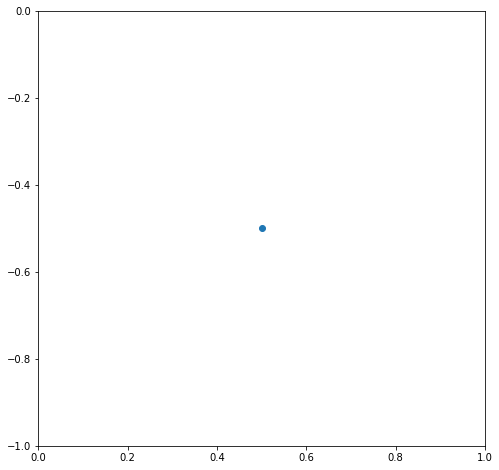

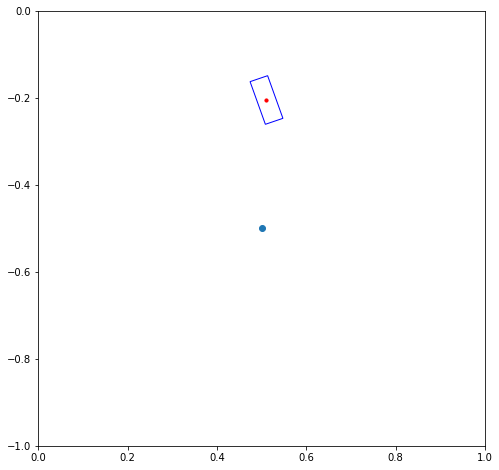

threshold : 0.3
Step : 3000  --  3001 Batch 9.267545 Targets =  33 Ratio = 0.2808346892848159 Threshold (0.5):
Step : 3001  --  3002 Batch 10.581359 Targets =  53 Ratio = 0.19964828131333837 Threshold (0.5):
Step : 3002  --  3003 Batch 11.175782 Targets =  45 Ratio = 0.24835071563720704 Threshold (0.5):
Step : 3003  --  3004 Batch 9.591219 Targets =  56 Ratio = 0.17127176693507604 Threshold (0.5):
Step : 3004  --  3005 Batch 9.051209 Targets =  38 Ratio = 0.23818972236231753 Threshold (0.5):
Step : 3005  --  3006 Batch 8.387484 Targets =  55 Ratio = 0.15249970176003197 Threshold (0.5):
Step : 3006  --  3007 Batch 11.1685295 Targets =  90 Ratio = 0.12409477233886719 Threshold (0.5):
Step : 3007  --  3008 Batch 9.22507 Targets =  60 Ratio = 0.1537511666615804 Threshold (0.5):
Step : 3008  --  3009 Batch 10.877041 Targets =  46 Ratio = 0.2364574100660241 Threshold (0.5):
Step : 3009  --  3010 Batch 8.787379 Targets =  72 Ratio = 0.12204693423377143 Threshold (0.5):
Step : 3010  --  3011 B

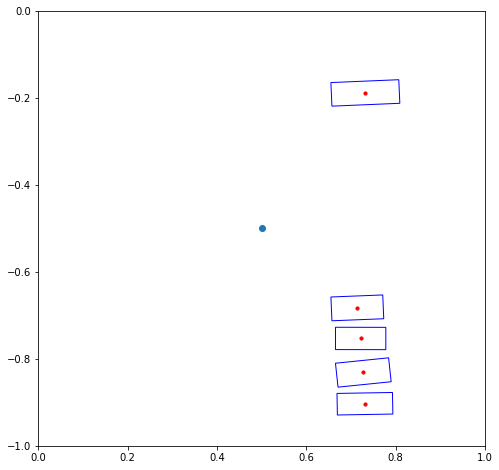

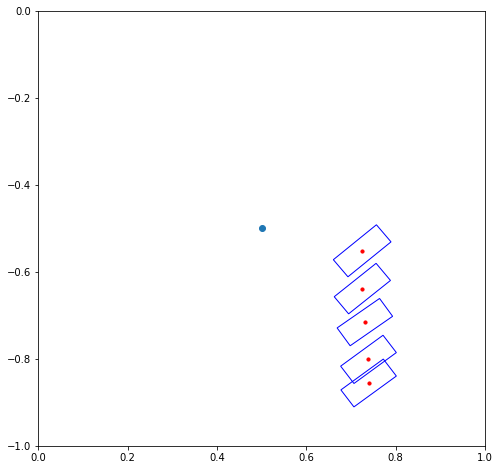

threshold : 0.5
Step : 3050  --  3051 Batch 10.916069 Targets =  68 Ratio = 0.16053042692296646 Threshold (0.5):
Step : 3051  --  3052 Batch 7.9944153 Targets =  36 Ratio = 0.2220670912000868 Threshold (0.5):
Step : 3052  --  3053 Batch 9.91055 Targets =  41 Ratio = 0.2417207345729921 Threshold (0.5):
Step : 3053  --  3054 Batch 10.120762 Targets =  55 Ratio = 0.18401385220614347 Threshold (0.5):
Step : 3054  --  3055 Batch 10.889942 Targets =  45 Ratio = 0.24199871487087674 Threshold (0.5):
Step : 3055  --  3056 Batch 9.997135 Targets =  39 Ratio = 0.2563367990347055 Threshold (0.5):
Step : 3056  --  3057 Batch 10.385374 Targets =  79 Ratio = 0.13146043125587173 Threshold (0.5):
Step : 3057  --  3058 Batch 10.178559 Targets =  68 Ratio = 0.14968469563652487 Threshold (0.5):
Step : 3058  --  3059 Batch 10.936535 Targets =  16 Ratio = 0.6835334300994873 Threshold (0.5):
Step : 3059  --  3060 Batch 9.433031 Targets =  41 Ratio = 0.2300739288330078 Threshold (0.5):
Step : 3060  --  3061 B

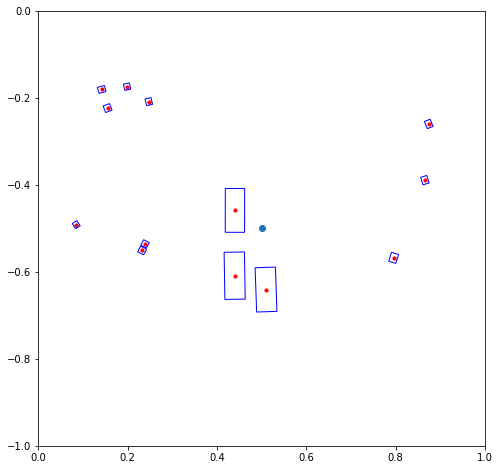

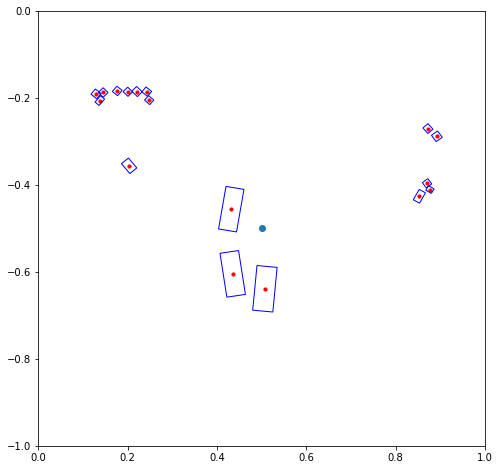

threshold : 0.5
Step : 3100  --  3101 Batch 9.188791 Targets =  47 Ratio = 0.195506197340945 Threshold (0.5):
Step : 3101  --  3102 Batch 9.675 Targets =  96 Ratio = 0.10078125198682149 Threshold (0.5):
Step : 3102  --  3103 Batch 11.043487 Targets =  30 Ratio = 0.36811621983846027 Threshold (0.5):
Step : 3103  --  3104 Batch 8.914055 Targets =  45 Ratio = 0.19809010823567708 Threshold (0.5):
Step : 3104  --  3105 Batch 10.756083 Targets =  58 Ratio = 0.18544969887569032 Threshold (0.5):
Step : 3105  --  3106 Batch 10.498094 Targets =  79 Ratio = 0.13288726082331018 Threshold (0.5):
Step : 3106  --  3107 Batch 13.624987 Targets =  33 Ratio = 0.41287838328968396 Threshold (0.5):
Step : 3107  --  3108 Batch 9.524959 Targets =  42 Ratio = 0.226784728822254 Threshold (0.5):
Step : 3108  --  3109 Batch 9.403269 Targets =  62 Ratio = 0.1516656260336599 Threshold (0.5):
Step : 3109  --  3110 Batch 6.8967495 Targets =  35 Ratio = 0.19704998561314174 Threshold (0.5):
Step : 3110  --  3111 Batch

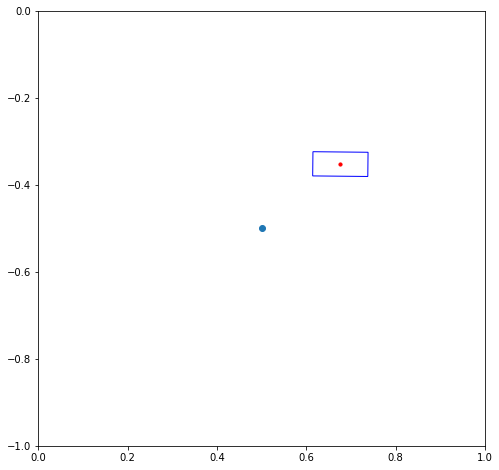

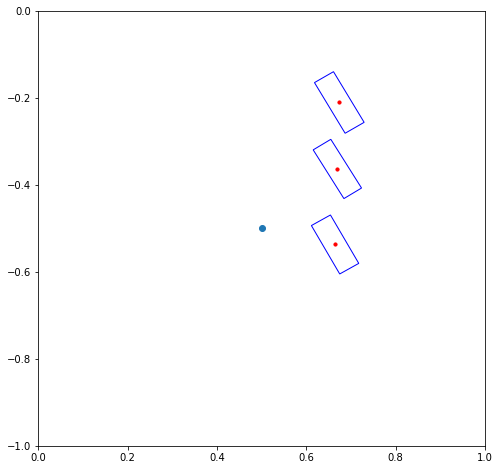

threshold : 0.3
Step : 3150  --  3151 Batch 11.004893 Targets =  75 Ratio = 0.1467319107055664 Threshold (0.5):
Step : 3151  --  3152 Batch 9.855087 Targets =  73 Ratio = 0.1350011956201841 Threshold (0.5):
Step : 3152  --  3153 Batch 8.478996 Targets =  52 Ratio = 0.163057620708759 Threshold (0.5):
Step : 3153  --  3154 Batch 10.306765 Targets =  64 Ratio = 0.1610431969165802 Threshold (0.5):
Step : 3154  --  3155 Batch 10.496824 Targets =  68 Ratio = 0.15436506271362305 Threshold (0.5):
Step : 3155  --  3156 Batch 9.950954 Targets =  32 Ratio = 0.3109673261642456 Threshold (0.5):
Step : 3156  --  3157 Batch 12.532317 Targets =  63 Ratio = 0.19892566923111205 Threshold (0.5):
Step : 3157  --  3158 Batch 8.982953 Targets =  70 Ratio = 0.12832790102277483 Threshold (0.5):
Step : 3158  --  3159 Batch 11.552253 Targets =  58 Ratio = 0.1991767718874175 Threshold (0.5):
Step : 3159  --  3160 Batch 13.262828 Targets =  67 Ratio = 0.19795265482432806 Threshold (0.5):
Step : 3160  --  3161 Bat

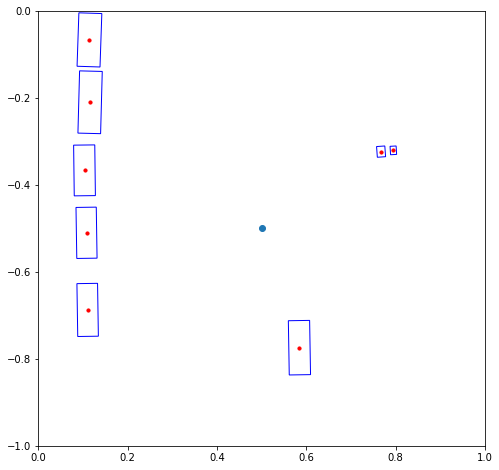

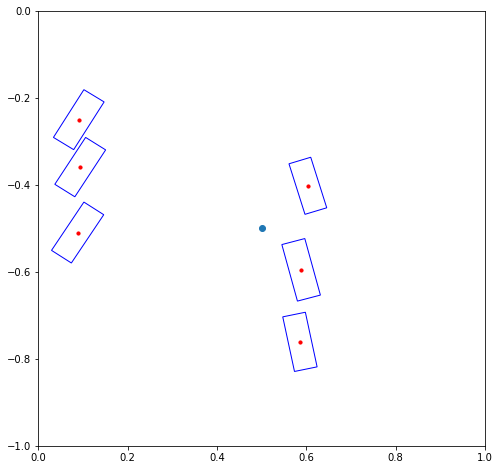

threshold : 0.5
Step : 3200  --  3201 Batch 11.0056715 Targets =  45 Ratio = 0.24457047780354818 Threshold (0.5):
Step : 3201  --  3202 Batch 8.772259 Targets =  66 Ratio = 0.1329130114931049 Threshold (0.5):
Step : 3202  --  3203 Batch 10.4335 Targets =  57 Ratio = 0.18304386473538584 Threshold (0.5):
Step : 3203  --  3204 Batch 11.088929 Targets =  28 Ratio = 0.3960331848689488 Threshold (0.5):
Step : 3204  --  3205 Batch 9.028023 Targets =  84 Ratio = 0.10747646150134858 Threshold (0.5):
Step : 3205  --  3206 Batch 11.033026 Targets =  61 Ratio = 0.1808692744520844 Threshold (0.5):
Step : 3206  --  3207 Batch 10.139771 Targets =  67 Ratio = 0.15133987255950473 Threshold (0.5):
Step : 3207  --  3208 Batch 7.2870207 Targets =  44 Ratio = 0.16561410643837668 Threshold (0.5):
Step : 3208  --  3209 Batch 8.443981 Targets =  48 Ratio = 0.1759162743886312 Threshold (0.5):
Step : 3209  --  3210 Batch 11.49902 Targets =  82 Ratio = 0.14023194661954555 Threshold (0.5):
Step : 3210  --  3211 B

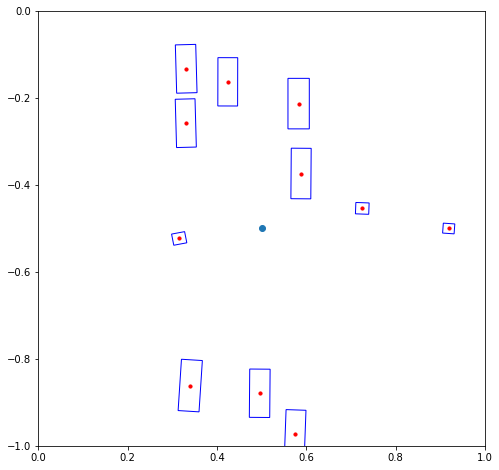

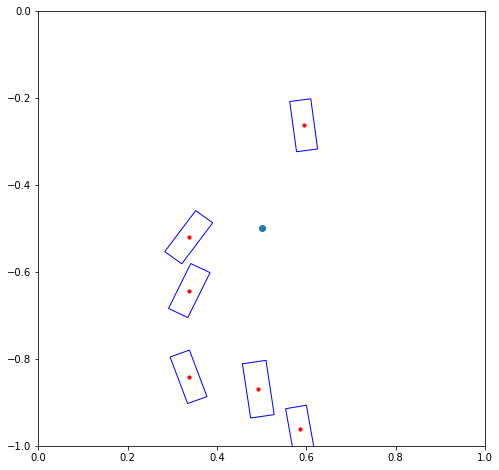

threshold : 0.5
Step : 3250  --  3251 Batch 10.220937 Targets =  35 Ratio = 0.2920267650059291 Threshold (0.5):
Step : 3251  --  3252 Batch 10.296873 Targets =  68 Ratio = 0.15142460430369659 Threshold (0.5):
Step : 3252  --  3253 Batch 10.470862 Targets =  33 Ratio = 0.31729886026093457 Threshold (0.5):
Step : 3253  --  3254 Batch 10.037233 Targets =  50 Ratio = 0.20074466705322266 Threshold (0.5):
Step : 3254  --  3255 Batch 8.608229 Targets =  60 Ratio = 0.14347047805786134 Threshold (0.5):
Step : 3255  --  3256 Batch 7.840791 Targets =  54 Ratio = 0.14519983750802498 Threshold (0.5):
Step : 3256  --  3257 Batch 11.394918 Targets =  47 Ratio = 0.2424450732292013 Threshold (0.5):
Step : 3257  --  3258 Batch 9.21731 Targets =  51 Ratio = 0.18073156768200443 Threshold (0.5):
Step : 3258  --  3259 Batch 8.964891 Targets =  35 Ratio = 0.25613975524902344 Threshold (0.5):
Step : 3259  --  3260 Batch 9.674813 Targets =  51 Ratio = 0.18970222099154604 Threshold (0.5):
Step : 3260  --  3261 

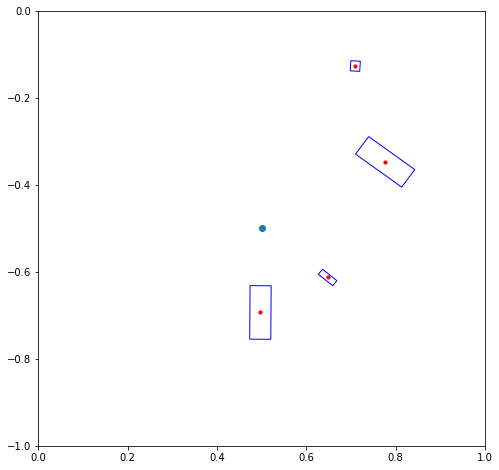

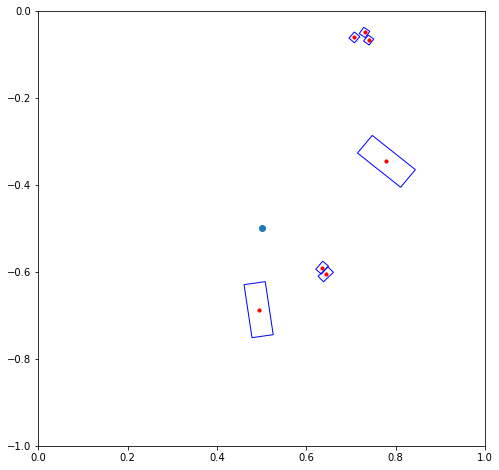

threshold : 0.5
Step : 3300  --  3301 Batch 12.637398 Targets =  41 Ratio = 0.308229213807641 Threshold (0.5):
Step : 3301  --  3302 Batch 14.618862 Targets =  20 Ratio = 0.7309431076049805 Threshold (0.5):
Step : 3302  --  3303 Batch 9.499424 Targets =  49 Ratio = 0.19386579552475286 Threshold (0.5):
Step : 3303  --  3304 Batch 10.718248 Targets =  59 Ratio = 0.181665226564569 Threshold (0.5):
Step : 3304  --  3305 Batch 11.369864 Targets =  49 Ratio = 0.23203805028175822 Threshold (0.5):
Step : 3305  --  3306 Batch 6.4432535 Targets =  58 Ratio = 0.1110905778819117 Threshold (0.5):
Step : 3306  --  3307 Batch 10.230916 Targets =  53 Ratio = 0.19303615138215838 Threshold (0.5):
Step : 3307  --  3308 Batch 13.357669 Targets =  77 Ratio = 0.1734762191772461 Threshold (0.5):
Step : 3308  --  3309 Batch 7.67303 Targets =  36 Ratio = 0.21313971943325466 Threshold (0.5):
Step : 3309  --  3310 Batch 9.488772 Targets =  64 Ratio = 0.14826206862926483 Threshold (0.5):
Step : 3310  --  3311 Bat

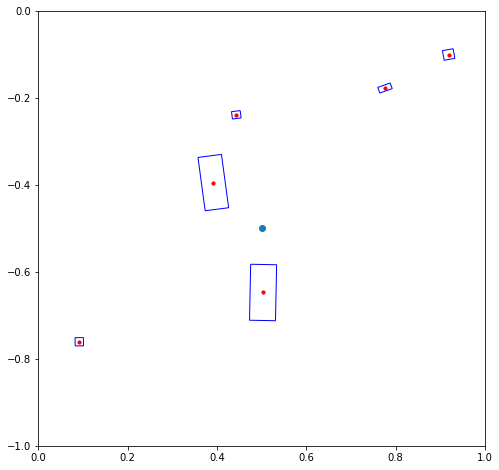

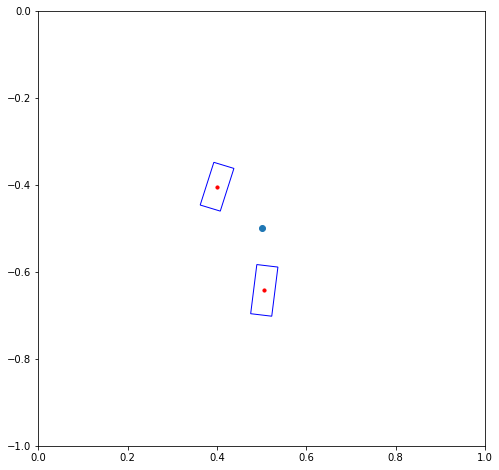

threshold : 0.5
Step : 3350  --  3351 Batch 8.447911 Targets =  72 Ratio = 0.1173321008682251 Threshold (0.5):
Step : 3351  --  3352 Batch 9.806083 Targets =  73 Ratio = 0.1343299003496562 Threshold (0.5):
Step : 3352  --  3353 Batch 10.110514 Targets =  67 Ratio = 0.1509031893602058 Threshold (0.5):
Step : 3353  --  3354 Batch 10.852745 Targets =  52 Ratio = 0.20870663569523737 Threshold (0.5):
Step : 3354  --  3355 Batch 9.174753 Targets =  47 Ratio = 0.1952075146614237 Threshold (0.5):
Step : 3355  --  3356 Batch 8.934187 Targets =  60 Ratio = 0.14890311559041342 Threshold (0.5):
Step : 3356  --  3357 Batch 8.644242 Targets =  60 Ratio = 0.1440707047780355 Threshold (0.5):
Step : 3357  --  3358 Batch 8.207687 Targets =  45 Ratio = 0.18239305284288193 Threshold (0.5):
Step : 3358  --  3359 Batch 10.358986 Targets =  40 Ratio = 0.25897464752197263 Threshold (0.5):
Step : 3359  --  3360 Batch 13.106216 Targets =  80 Ratio = 0.16382770538330077 Threshold (0.5):
Step : 3360  --  3361 Bat

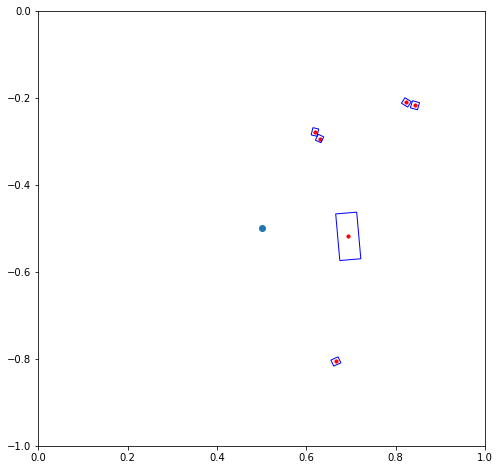

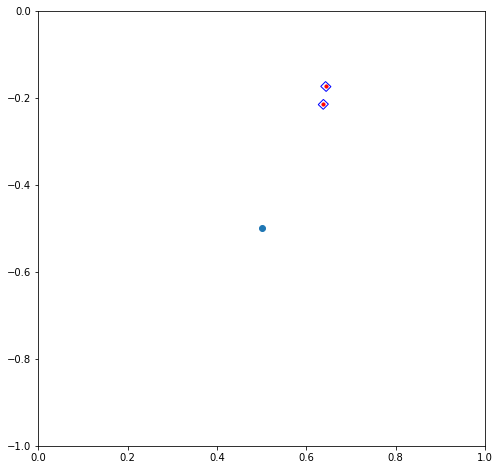

threshold : 0.5
Step : 3400  --  3401 Batch 11.86816 Targets =  44 Ratio = 0.2697309147227894 Threshold (0.5):
Step : 3401  --  3402 Batch 12.618323 Targets =  39 Ratio = 0.32354675195156 Threshold (0.5):
Step : 3402  --  3403 Batch 8.511069 Targets =  50 Ratio = 0.17022138595581054 Threshold (0.5):
Step : 3403  --  3404 Batch 10.107485 Targets =  43 Ratio = 0.23505778645360192 Threshold (0.5):
Step : 3404  --  3405 Batch 13.927206 Targets =  33 Ratio = 0.42203654664935486 Threshold (0.5):
Step : 3405  --  3406 Batch 11.444965 Targets =  50 Ratio = 0.22889930725097657 Threshold (0.5):
Step : 3406  --  3407 Batch 12.8527355 Targets =  38 Ratio = 0.3382298820897153 Threshold (0.5):
Step : 3407  --  3408 Batch 7.2861814 Targets =  46 Ratio = 0.15839524891065515 Threshold (0.5):
Step : 3408  --  3409 Batch 10.250355 Targets =  75 Ratio = 0.13667139689127605 Threshold (0.5):
Step : 3409  --  3410 Batch 8.753795 Targets =  35 Ratio = 0.2501084191458566 Threshold (0.5):
Step : 3410  --  3411 

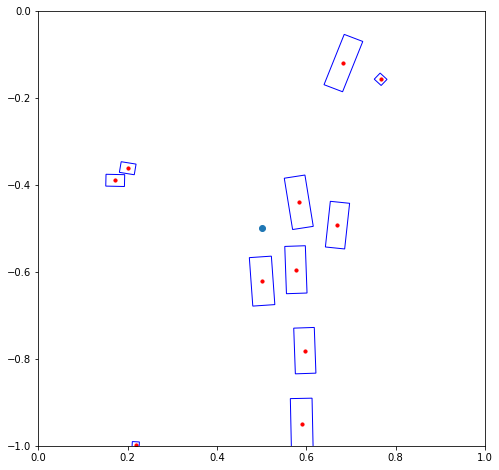

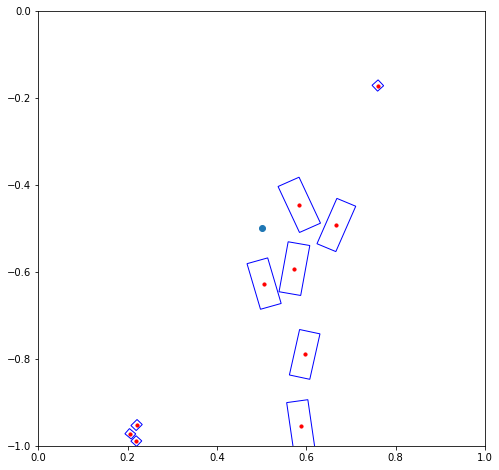

threshold : 0.5
Step : 3450  --  3451 Batch 11.342336 Targets =  56 Ratio = 0.20254170894622803 Threshold (0.5):
Step : 3451  --  3452 Batch 11.845852 Targets =  24 Ratio = 0.4935771624247233 Threshold (0.5):
Step : 3452  --  3453 Batch 10.960751 Targets =  45 Ratio = 0.24357223510742188 Threshold (0.5):
Step : 3453  --  3454 Batch 9.83484 Targets =  32 Ratio = 0.30733874440193176 Threshold (0.5):
Step : 3454  --  3455 Batch 9.593893 Targets =  31 Ratio = 0.3094804210047568 Threshold (0.5):
Step : 3455  --  3456 Batch 11.659551 Targets =  43 Ratio = 0.2711523410885833 Threshold (0.5):
Step : 3456  --  3457 Batch 8.202954 Targets =  50 Ratio = 0.16405908584594728 Threshold (0.5):
Step : 3457  --  3458 Batch 9.76013 Targets =  37 Ratio = 0.2637872953672667 Threshold (0.5):
Step : 3458  --  3459 Batch 9.8857 Targets =  62 Ratio = 0.159446777835969 Threshold (0.5):
Step : 3459  --  3460 Batch 6.8057137 Targets =  48 Ratio = 0.14178570111592612 Threshold (0.5):
Step : 3460  --  3461 Batch 7

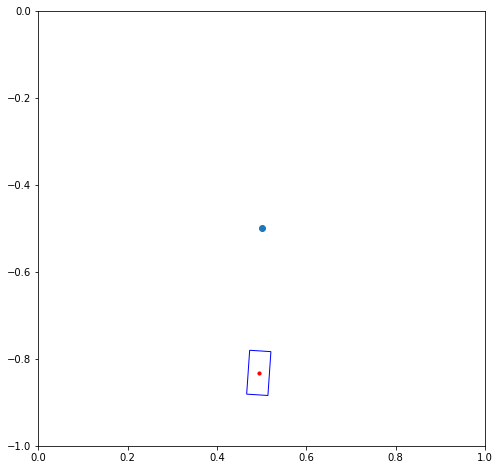

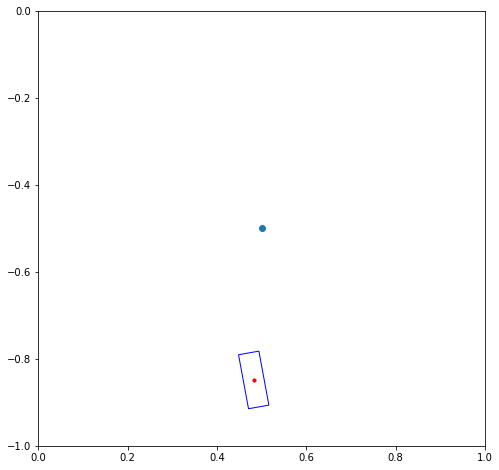

threshold : 0.5
Step : 3500  --  3501 Batch 8.160267 Targets =  66 Ratio = 0.1236404072154652 Threshold (0.5):
Step : 3501  --  3502 Batch 13.263936 Targets =  67 Ratio = 0.19796919466844246 Threshold (0.5):
Step : 3502  --  3503 Batch 8.133405 Targets =  39 Ratio = 0.20854883927565354 Threshold (0.5):
Step : 3503  --  3504 Batch 14.722902 Targets =  46 Ratio = 0.3200630934342094 Threshold (0.5):
Step : 3504  --  3505 Batch 9.39775 Targets =  52 Ratio = 0.1807259596311129 Threshold (0.5):
Step : 3505  --  3506 Batch 9.817252 Targets =  50 Ratio = 0.19634504318237306 Threshold (0.5):
Step : 3506  --  3507 Batch 11.062978 Targets =  51 Ratio = 0.2169211331535788 Threshold (0.5):
Step : 3507  --  3508 Batch 10.943907 Targets =  43 Ratio = 0.2545094600943632 Threshold (0.5):
Step : 3508  --  3509 Batch 10.18608 Targets =  89 Ratio = 0.11445033684205473 Threshold (0.5):
Step : 3509  --  3510 Batch 10.0519495 Targets =  74 Ratio = 0.135837155419427 Threshold (0.5):
Step : 3510  --  3511 Batc

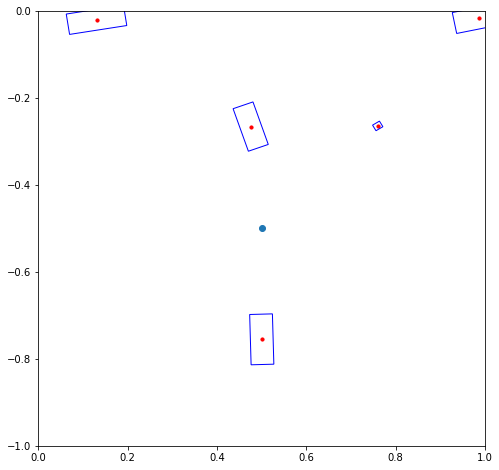

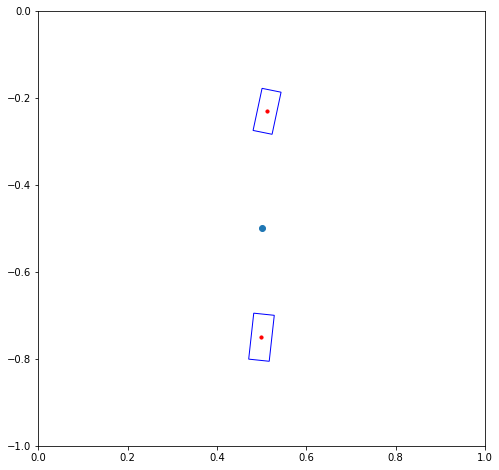

threshold : 0.5
Step : 3550  --  3551 Batch 11.287523 Targets =  64 Ratio = 0.17636755108833313 Threshold (0.5):
Step : 3551  --  3552 Batch 11.442897 Targets =  67 Ratio = 0.17078950511875438 Threshold (0.5):
Step : 3552  --  3553 Batch 7.189294 Targets =  33 Ratio = 0.21785738973906546 Threshold (0.5):
Step : 3553  --  3554 Batch 10.933909 Targets =  54 Ratio = 0.20247980400368018 Threshold (0.5):
Step : 3554  --  3555 Batch 9.3974085 Targets =  28 Ratio = 0.33562173162187847 Threshold (0.5):
Step : 3555  --  3556 Batch 11.217823 Targets =  93 Ratio = 0.1206217529953167 Threshold (0.5):
Step : 3556  --  3557 Batch 10.179883 Targets =  42 Ratio = 0.24237816674368723 Threshold (0.5):
Step : 3557  --  3558 Batch 7.2706947 Targets =  25 Ratio = 0.2908277893066406 Threshold (0.5):
Step : 3558  --  3559 Batch 8.196661 Targets =  45 Ratio = 0.1821480221218533 Threshold (0.5):
Step : 3559  --  3560 Batch 8.053793 Targets =  52 Ratio = 0.15488063372098482 Threshold (0.5):
Step : 3560  --  356

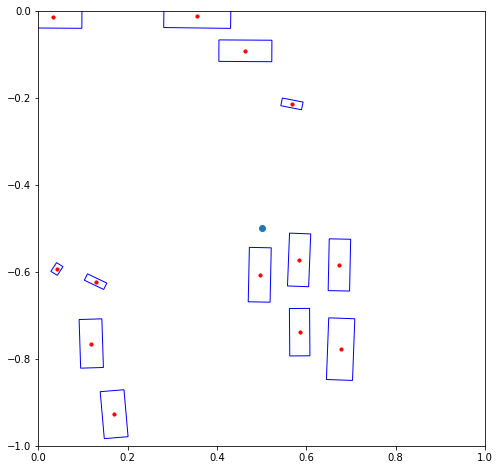

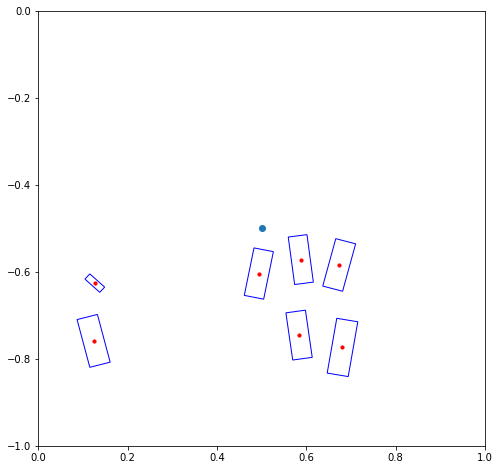

threshold : 0.5
Step : 3600  --  3601 Batch 12.738455 Targets =  41 Ratio = 0.3106940199689167 Threshold (0.5):
Step : 3601  --  3602 Batch 11.215265 Targets =  88 Ratio = 0.12744619629599832 Threshold (0.5):
Step : 3602  --  3603 Batch 12.511822 Targets =  83 Ratio = 0.1507448403232069 Threshold (0.5):
Step : 3603  --  3604 Batch 9.635201 Targets =  77 Ratio = 0.1251324864176961 Threshold (0.5):
Step : 3604  --  3605 Batch 13.223337 Targets =  40 Ratio = 0.33058342933654783 Threshold (0.5):
Step : 3605  --  3606 Batch 10.608404 Targets =  72 Ratio = 0.1473389466603597 Threshold (0.5):
Step : 3606  --  3607 Batch 13.088703 Targets =  55 Ratio = 0.23797642100941052 Threshold (0.5):
Step : 3607  --  3608 Batch 8.974958 Targets =  30 Ratio = 0.2991652806599935 Threshold (0.5):
Step : 3608  --  3609 Batch 10.710613 Targets =  52 Ratio = 0.20597333174485427 Threshold (0.5):
Step : 3609  --  3610 Batch 10.8978815 Targets =  70 Ratio = 0.15568402154105052 Threshold (0.5):
Step : 3610  --  361

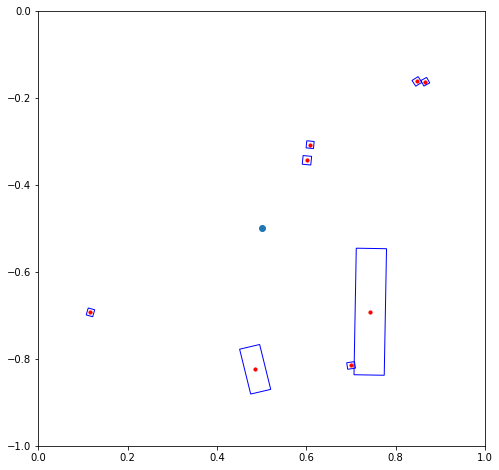

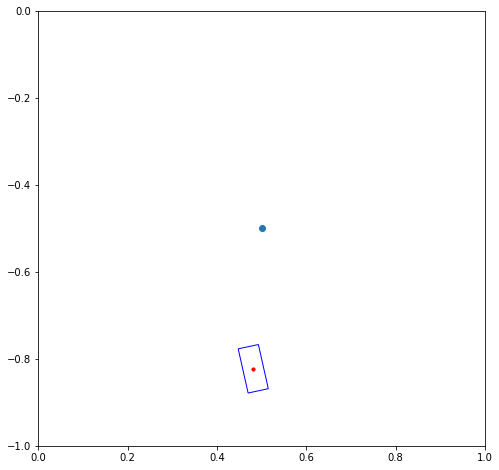

threshold : 0.5
Step : 3650  --  3651 Batch 10.940124 Targets =  34 Ratio = 0.32176833994248333 Threshold (0.5):
Step : 3651  --  3652 Batch 11.282575 Targets =  43 Ratio = 0.26238545706105787 Threshold (0.5):
Step : 3652  --  3653 Batch 13.1928835 Targets =  78 Ratio = 0.16913953194251427 Threshold (0.5):
Step : 3653  --  3654 Batch 12.059717 Targets =  45 Ratio = 0.26799371507432723 Threshold (0.5):
Step : 3654  --  3655 Batch 8.185585 Targets =  57 Ratio = 0.1436067547714501 Threshold (0.5):
Step : 3655  --  3656 Batch 9.959969 Targets =  55 Ratio = 0.18109033757990056 Threshold (0.5):
Step : 3656  --  3657 Batch 11.189441 Targets =  44 Ratio = 0.25430547107349744 Threshold (0.5):
Step : 3657  --  3658 Batch 11.055097 Targets =  54 Ratio = 0.20472401159780998 Threshold (0.5):
Step : 3658  --  3659 Batch 8.414366 Targets =  63 Ratio = 0.13356136140369235 Threshold (0.5):
Step : 3659  --  3660 Batch 8.83652 Targets =  81 Ratio = 0.10909284191367066 Threshold (0.5):
Step : 3660  --  36

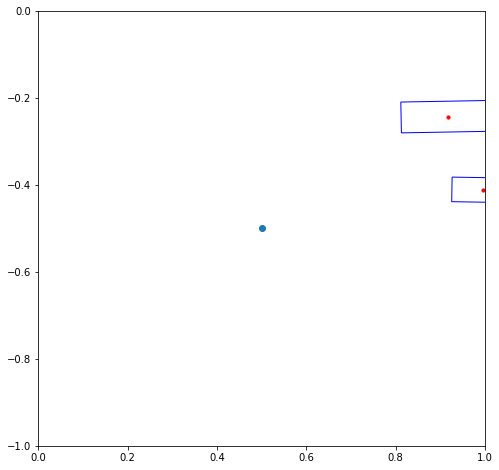

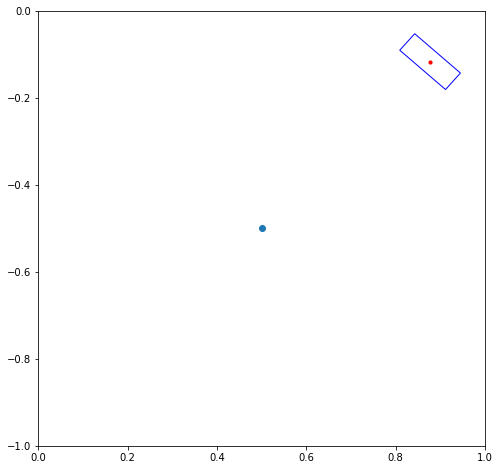

threshold : 0.3
Step : 3700  --  3701 Batch 13.503094 Targets =  33 Ratio = 0.409184658166134 Threshold (0.5):
Step : 3701  --  3702 Batch 6.145412 Targets =  40 Ratio = 0.15363529920578003 Threshold (0.5):
Step : 3702  --  3703 Batch 7.5539637 Targets =  70 Ratio = 0.10791376658848353 Threshold (0.5):
Step : 3703  --  3704 Batch 10.037403 Targets =  45 Ratio = 0.22305340237087673 Threshold (0.5):
Step : 3704  --  3705 Batch 11.284408 Targets =  65 Ratio = 0.17360627101017878 Threshold (0.5):
Step : 3705  --  3706 Batch 9.209696 Targets =  56 Ratio = 0.16445885385785783 Threshold (0.5):
Step : 3706  --  3707 Batch 9.45392 Targets =  55 Ratio = 0.17188946117054332 Threshold (0.5):
Step : 3707  --  3708 Batch 8.859827 Targets =  59 Ratio = 0.15016656002755893 Threshold (0.5):
Step : 3708  --  3709 Batch 9.905678 Targets =  44 Ratio = 0.22512904080477628 Threshold (0.5):
Step : 3709  --  3710 Batch 10.003252 Targets =  55 Ratio = 0.181877309625799 Threshold (0.5):
Step : 3710  --  3711 Ba

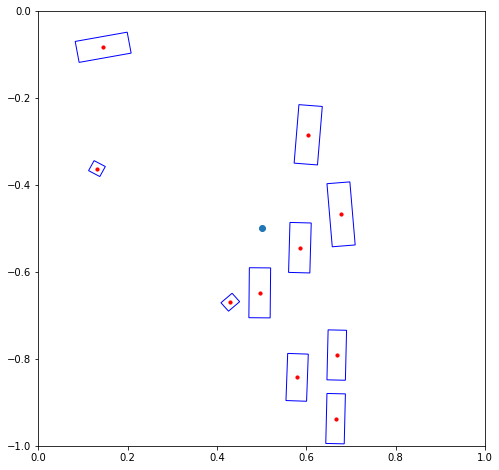

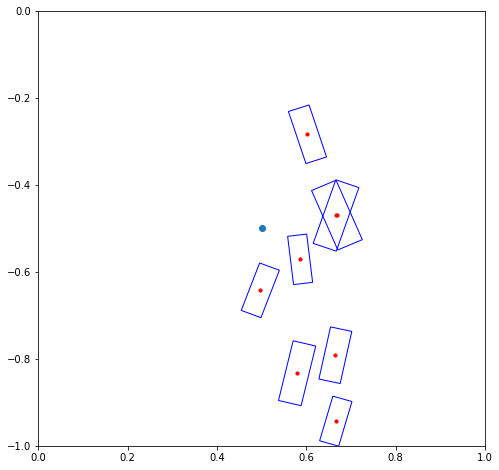

threshold : 0.5
Step : 3750  --  3751 Batch 7.9527535 Targets =  72 Ratio = 0.11045491033130223 Threshold (0.5):
Step : 3751  --  3752 Batch 12.000631 Targets =  76 Ratio = 0.157903043847335 Threshold (0.5):
Step : 3752  --  3753 Batch 11.922301 Targets =  54 Ratio = 0.22078335726702655 Threshold (0.5):
Step : 3753  --  3754 Batch 9.600899 Targets =  51 Ratio = 0.18825291652305454 Threshold (0.5):
Step : 3754  --  3755 Batch 11.251014 Targets =  52 Ratio = 0.2163656491499681 Threshold (0.5):
Step : 3755  --  3756 Batch 9.565983 Targets =  58 Ratio = 0.16493073825178475 Threshold (0.5):
Step : 3756  --  3757 Batch 12.671498 Targets =  54 Ratio = 0.2346573759008337 Threshold (0.5):
Step : 3757  --  3758 Batch 12.933973 Targets =  44 Ratio = 0.29395393891768024 Threshold (0.5):
Step : 3758  --  3759 Batch 9.535437 Targets =  84 Ratio = 0.1135171027410598 Threshold (0.5):
Step : 3759  --  3760 Batch 12.877157 Targets =  25 Ratio = 0.5150862884521484 Threshold (0.5):
Step : 3760  --  3761 B

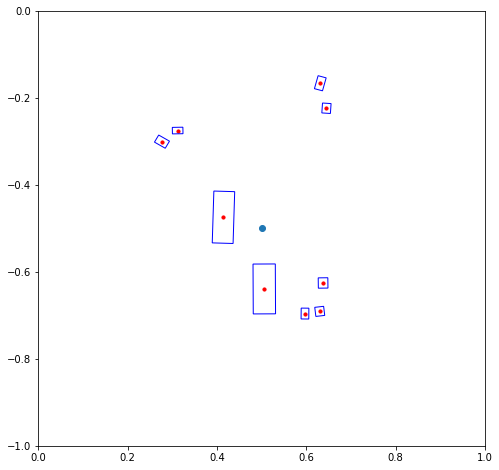

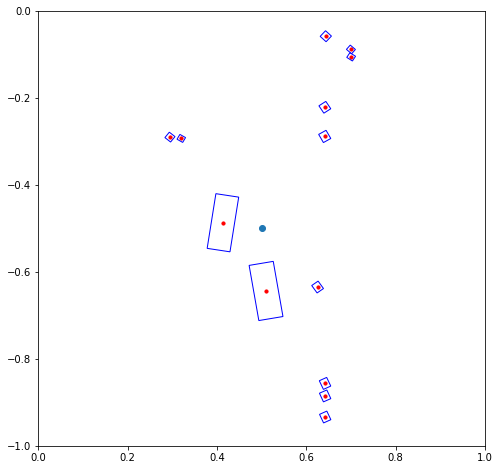

threshold : 0.5
Step : 3800  --  3801 Batch 10.140466 Targets =  66 Ratio = 0.15364342024832062 Threshold (0.5):
Step : 3801  --  3802 Batch 10.0275135 Targets =  65 Ratio = 0.15426943852351263 Threshold (0.5):
Step : 3802  --  3803 Batch 11.429481 Targets =  46 Ratio = 0.24846696853637695 Threshold (0.5):
Step : 3803  --  3804 Batch 9.997263 Targets =  31 Ratio = 0.3224923533778037 Threshold (0.5):
Step : 3804  --  3805 Batch 12.671505 Targets =  49 Ratio = 0.2586021423339844 Threshold (0.5):
Step : 3805  --  3806 Batch 12.325995 Targets =  72 Ratio = 0.17119438118404812 Threshold (0.5):
Step : 3806  --  3807 Batch 7.756257 Targets =  44 Ratio = 0.17627856948158957 Threshold (0.5):
Step : 3807  --  3808 Batch 9.226891 Targets =  55 Ratio = 0.16776164661754261 Threshold (0.5):
Step : 3808  --  3809 Batch 10.698718 Targets =  59 Ratio = 0.18133420459294725 Threshold (0.5):
Step : 3809  --  3810 Batch 9.801139 Targets =  50 Ratio = 0.19602277755737305 Threshold (0.5):
Step : 3810  --  38

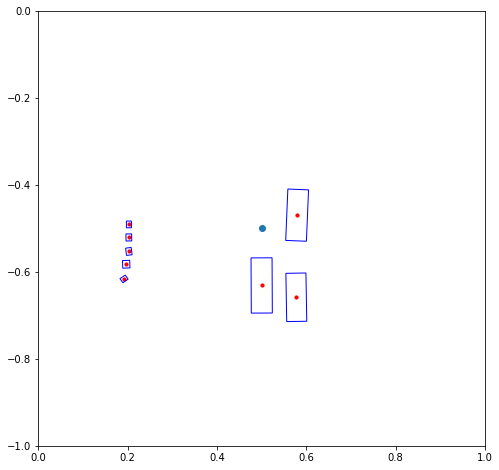

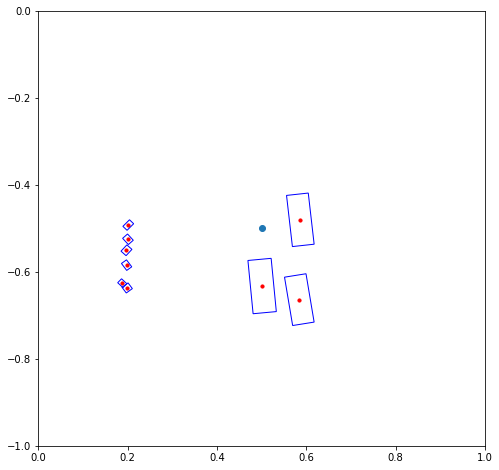

threshold : 0.5
Step : 3850  --  3851 Batch 7.7726088 Targets =  30 Ratio = 0.2590869585673014 Threshold (0.5):
Step : 3851  --  3852 Batch 11.33886 Targets =  45 Ratio = 0.2519746568467882 Threshold (0.5):
Step : 3852  --  3853 Batch 11.390705 Targets =  39 Ratio = 0.2920693617600661 Threshold (0.5):
Step : 3853  --  3854 Batch 11.879996 Targets =  36 Ratio = 0.3299998972151015 Threshold (0.5):
Step : 3854  --  3855 Batch 8.414497 Targets =  42 Ratio = 0.20034517560686385 Threshold (0.5):
Step : 3855  --  3856 Batch 9.8396435 Targets =  79 Ratio = 0.1245524490935893 Threshold (0.5):
Step : 3856  --  3857 Batch 10.455676 Targets =  73 Ratio = 0.14322843943556693 Threshold (0.5):
Step : 3857  --  3858 Batch 11.740674 Targets =  48 Ratio = 0.24459737539291382 Threshold (0.5):
Step : 3858  --  3859 Batch 12.641922 Targets =  41 Ratio = 0.308339560904154 Threshold (0.5):
Step : 3859  --  3860 Batch 10.707655 Targets =  84 Ratio = 0.1274720827738444 Threshold (0.5):
Step : 3860  --  3861 Ba

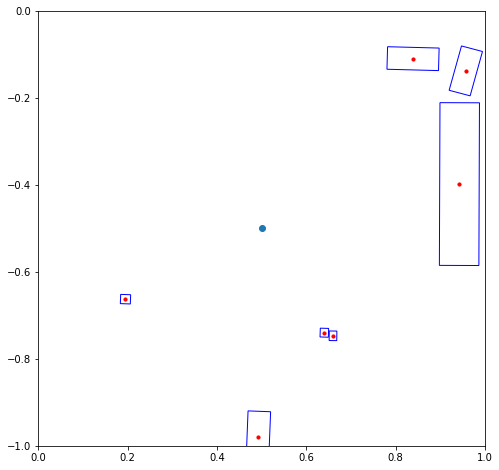

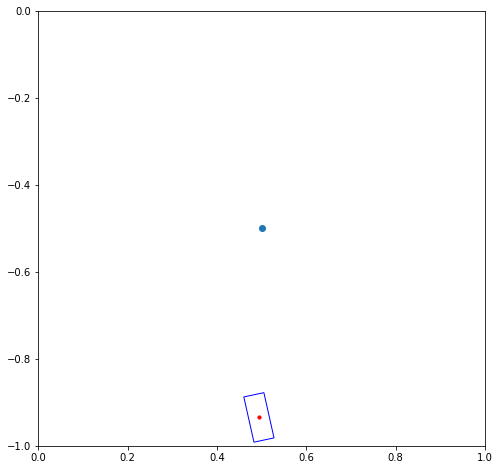

threshold : 0.5
Step : 3900  --  3901 Batch 9.879148 Targets =  72 Ratio = 0.13721038235558403 Threshold (0.5):
Step : 3901  --  3902 Batch 8.676596 Targets =  66 Ratio = 0.1314635710282759 Threshold (0.5):
Step : 3902  --  3903 Batch 11.613175 Targets =  59 Ratio = 0.19683348122289626 Threshold (0.5):
Step : 3903  --  3904 Batch 10.8947935 Targets =  65 Ratio = 0.16761220785287712 Threshold (0.5):
Step : 3904  --  3905 Batch 9.324814 Targets =  28 Ratio = 0.3330290658133371 Threshold (0.5):
Step : 3905  --  3906 Batch 8.861521 Targets =  57 Ratio = 0.1554652766177529 Threshold (0.5):
Step : 3906  --  3907 Batch 10.183784 Targets =  44 Ratio = 0.23144962570884012 Threshold (0.5):
Step : 3907  --  3908 Batch 11.971195 Targets =  53 Ratio = 0.22587160794240124 Threshold (0.5):
Step : 3908  --  3909 Batch 8.603962 Targets =  36 Ratio = 0.23899894290500218 Threshold (0.5):
Step : 3909  --  3910 Batch 12.168442 Targets =  57 Ratio = 0.21348143460457786 Threshold (0.5):
Step : 3910  --  3911

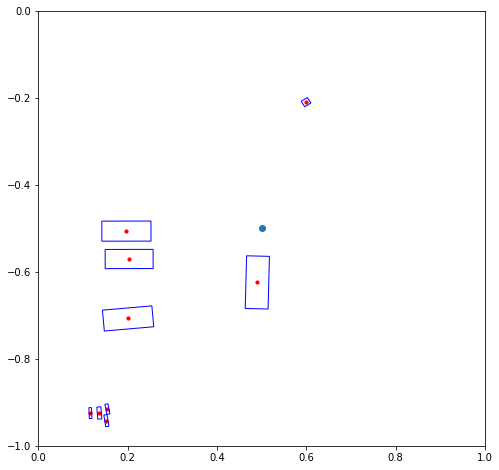

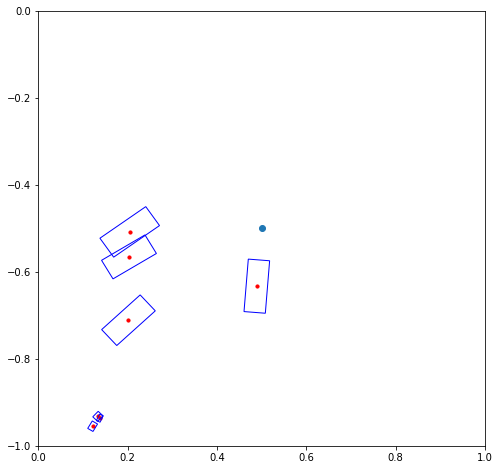

threshold : 0.5


Detecting objects:   0%|          | 0/53 [00:00<?, ?it/s]

Step : 3950  --  3951 Batch 12.548393 Targets =  20 Ratio = 0.6274196624755859 Threshold (0.5):

---- Evaluating Model ----


Computing AP: 100%|██████████| 9/9 [00:00<00:00, 211.73it/s]


+-------+----------------------+---------+
| Index | Class name           | AP      |
+-------+----------------------+---------+
| 0     | human                | 0.00000 |
| 1     | animal               | 0.00000 |
| 2     | car                  | 0.08788 |
| 3     | motorcycle           | 0.00000 |
| 4     | bicycle              | 0.00000 |
| 5     | bus                  | 0.00000 |
| 6     | truck                | 0.00114 |
| 7     | construction_vehicle | 0.00000 |
| 8     | trailer              | 0.00000 |
+-------+----------------------+---------+
---- mAP 0.009890767417493014
old: 0, new: 0.009890767417493014
Best Model Saved!!
Step : 3951  --  0 Batch 9.238231 Targets =  53 Ratio = 0.17430623972191 Threshold (0.5):
Step : 3952  --  1 Batch 8.86469 Targets =  30 Ratio = 0.2954896608988444 Threshold (0.5):
Step : 3953  --  2 Batch 9.448905 Targets =  45 Ratio = 0.20997566646999782 Threshold (0.5):
Step : 3954  --  3 Batch 11.604713 Targets =  29 Ratio = 0.40016253241177263 Thresho

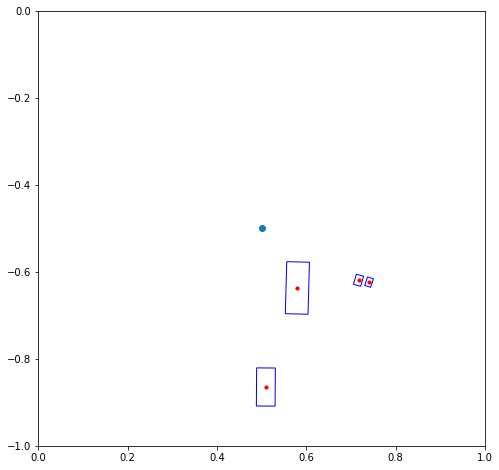

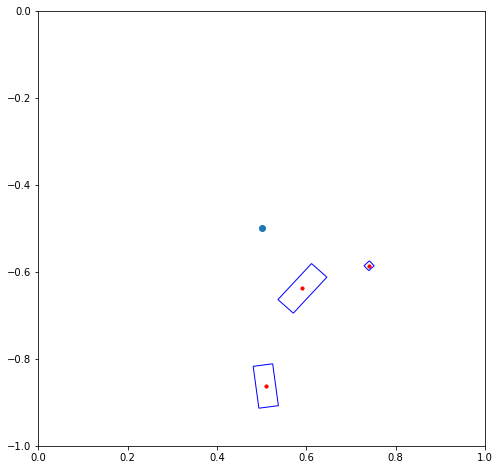

threshold : 0.5
Step : 4002  --  51 Batch 10.215132 Targets =  53 Ratio = 0.19273833508761423 Threshold (0.5):
Step : 4003  --  52 Batch 9.304176 Targets =  78 Ratio = 0.11928431193033855 Threshold (0.5):
Step : 4004  --  53 Batch 8.754902 Targets =  31 Ratio = 0.2824161898705267 Threshold (0.5):
Step : 4005  --  54 Batch 11.0401535 Targets =  49 Ratio = 0.2253092551717953 Threshold (0.5):
Step : 4006  --  55 Batch 10.873009 Targets =  51 Ratio = 0.2131962495691636 Threshold (0.5):
Step : 4007  --  56 Batch 8.44351 Targets =  42 Ratio = 0.20103595370338076 Threshold (0.5):
Step : 4008  --  57 Batch 7.3802233 Targets =  48 Ratio = 0.15375465154647827 Threshold (0.5):
Step : 4009  --  58 Batch 9.744097 Targets =  60 Ratio = 0.16240161259969074 Threshold (0.5):
Step : 4010  --  59 Batch 9.114416 Targets =  55 Ratio = 0.16571665677157316 Threshold (0.5):
Step : 4011  --  60 Batch 7.946101 Targets =  24 Ratio = 0.33108754952748615 Threshold (0.5):
Step : 4012  --  61 Batch 8.467626 Targets 

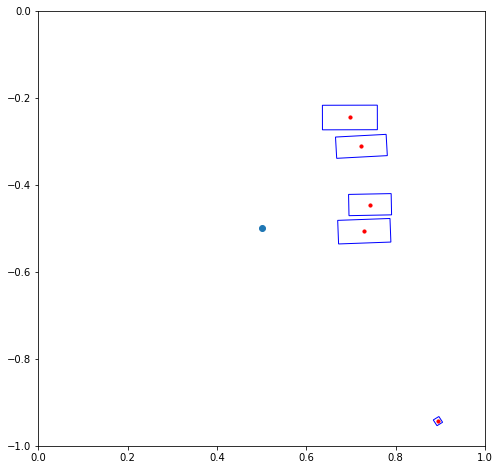

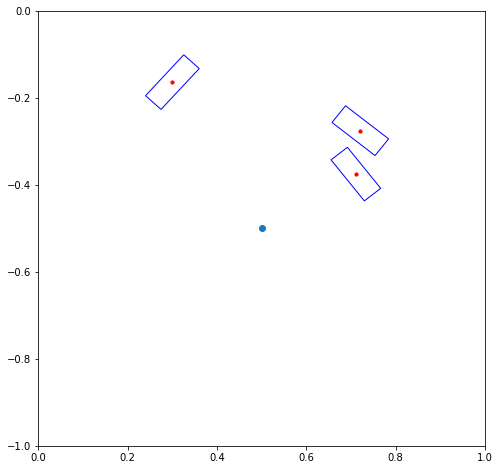

threshold : 0.5
Step : 4052  --  101 Batch 8.898701 Targets =  61 Ratio = 0.14588033957559554 Threshold (0.5):
Step : 4053  --  102 Batch 7.7794905 Targets =  26 Ratio = 0.29921117195716274 Threshold (0.5):
Step : 4054  --  103 Batch 11.79616 Targets =  37 Ratio = 0.3188151282233161 Threshold (0.5):
Step : 4055  --  104 Batch 9.262123 Targets =  58 Ratio = 0.1596917777225889 Threshold (0.5):
Step : 4056  --  105 Batch 10.543003 Targets =  29 Ratio = 0.3635518304232893 Threshold (0.5):
Step : 4057  --  106 Batch 8.676891 Targets =  54 Ratio = 0.16068317272044993 Threshold (0.5):
Step : 4058  --  107 Batch 8.203536 Targets =  78 Ratio = 0.10517353889269707 Threshold (0.5):
Step : 4059  --  108 Batch 8.782438 Targets =  40 Ratio = 0.21956095695495606 Threshold (0.5):
Step : 4060  --  109 Batch 12.512251 Targets =  46 Ratio = 0.27200545435366424 Threshold (0.5):
Step : 4061  --  110 Batch 9.307629 Targets =  67 Ratio = 0.13891983032226562 Threshold (0.5):
Step : 4062  --  111 Batch 10.6393

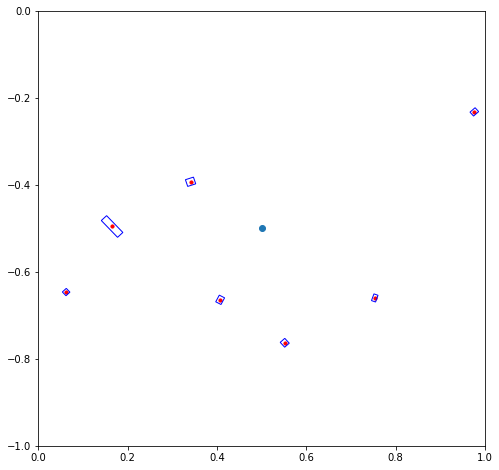

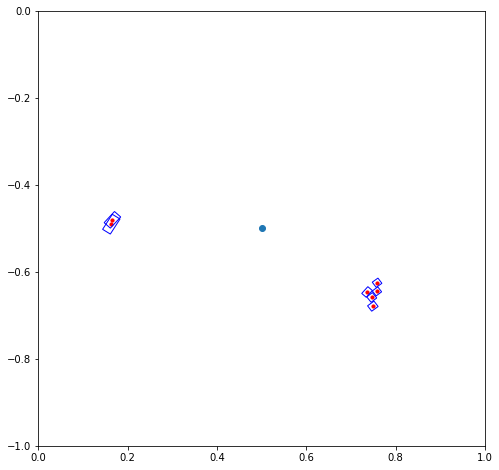

threshold : 0.5
Step : 4102  --  151 Batch 8.851208 Targets =  39 Ratio = 0.22695404443985376 Threshold (0.5):
Step : 4103  --  152 Batch 11.8498 Targets =  66 Ratio = 0.1795424259070194 Threshold (0.5):
Step : 4104  --  153 Batch 10.476153 Targets =  45 Ratio = 0.23280340830485027 Threshold (0.5):
Step : 4105  --  154 Batch 9.289816 Targets =  82 Ratio = 0.11329043783792635 Threshold (0.5):
Step : 4106  --  155 Batch 11.633793 Targets =  38 Ratio = 0.3061524441367702 Threshold (0.5):
Step : 4107  --  156 Batch 9.499173 Targets =  42 Ratio = 0.2261707896278018 Threshold (0.5):
Step : 4108  --  157 Batch 6.821478 Targets =  60 Ratio = 0.1136912981669108 Threshold (0.5):
Step : 4109  --  158 Batch 7.1684885 Targets =  43 Ratio = 0.16670903494191724 Threshold (0.5):
Step : 4110  --  159 Batch 10.842585 Targets =  32 Ratio = 0.33883076906204224 Threshold (0.5):
Step : 4111  --  160 Batch 7.622336 Targets =  36 Ratio = 0.21173155307769775 Threshold (0.5):
Step : 4112  --  161 Batch 8.588972

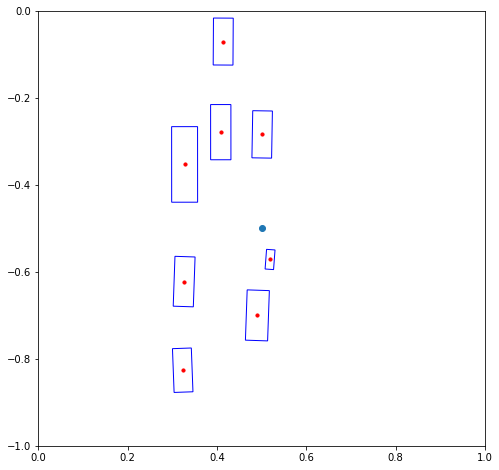

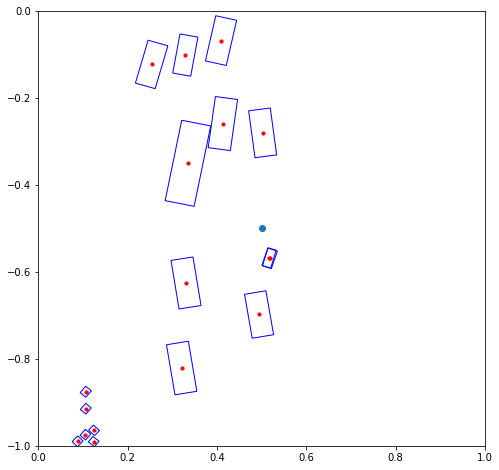

threshold : 0.5
Step : 4152  --  201 Batch 10.032581 Targets =  46 Ratio = 0.21809959411621094 Threshold (0.5):
Step : 4153  --  202 Batch 8.211844 Targets =  61 Ratio = 0.13462040072581807 Threshold (0.5):
Step : 4154  --  203 Batch 10.544733 Targets =  47 Ratio = 0.22435602228692236 Threshold (0.5):
Step : 4155  --  204 Batch 11.99906 Targets =  80 Ratio = 0.1499882459640503 Threshold (0.5):
Step : 4156  --  205 Batch 11.442376 Targets =  37 Ratio = 0.3092534091021564 Threshold (0.5):
Step : 4157  --  206 Batch 7.506164 Targets =  47 Ratio = 0.15970561859455515 Threshold (0.5):
Step : 4158  --  207 Batch 10.680436 Targets =  46 Ratio = 0.23218339422474737 Threshold (0.5):
Step : 4159  --  208 Batch 10.373104 Targets =  40 Ratio = 0.2593276023864746 Threshold (0.5):
Step : 4160  --  209 Batch 8.320572 Targets =  45 Ratio = 0.18490159776475695 Threshold (0.5):
Step : 4161  --  210 Batch 8.275303 Targets =  40 Ratio = 0.20688257217407227 Threshold (0.5):
Step : 4162  --  211 Batch 9.013

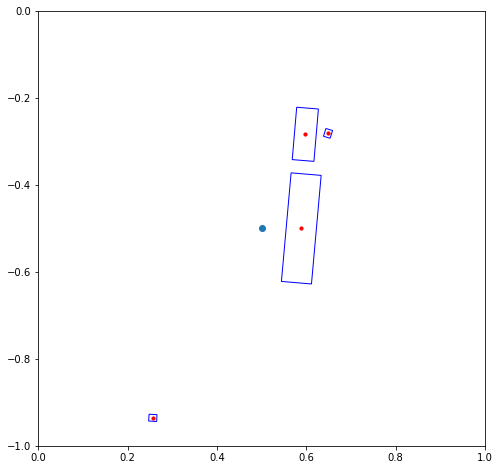

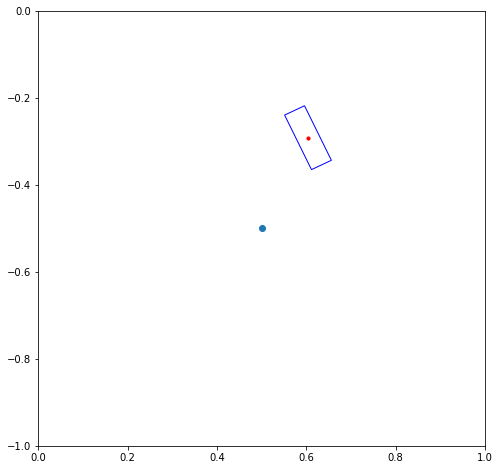

threshold : 0.5
Step : 4202  --  251 Batch 8.057558 Targets =  67 Ratio = 0.12026206059242363 Threshold (0.5):
Step : 4203  --  252 Batch 9.17255 Targets =  59 Ratio = 0.15546695256637313 Threshold (0.5):
Step : 4204  --  253 Batch 10.739821 Targets =  62 Ratio = 0.17322292635517736 Threshold (0.5):
Step : 4205  --  254 Batch 8.417938 Targets =  42 Ratio = 0.20042710077194942 Threshold (0.5):
Step : 4206  --  255 Batch 8.314674 Targets =  36 Ratio = 0.23096317715115017 Threshold (0.5):
Step : 4207  --  256 Batch 11.184262 Targets =  36 Ratio = 0.31067395210266113 Threshold (0.5):
Step : 4208  --  257 Batch 6.94886 Targets =  44 Ratio = 0.15792864019220526 Threshold (0.5):
Step : 4209  --  258 Batch 7.949257 Targets =  43 Ratio = 0.18486643946448036 Threshold (0.5):
Step : 4210  --  259 Batch 7.480799 Targets =  40 Ratio = 0.18701997995376587 Threshold (0.5):
Step : 4211  --  260 Batch 9.133003 Targets =  53 Ratio = 0.17232081575213737 Threshold (0.5):
Step : 4212  --  261 Batch 9.39668

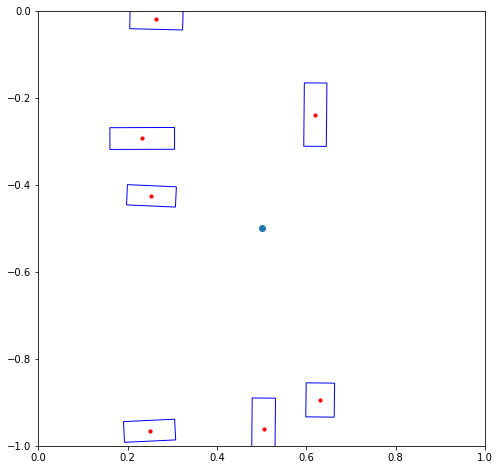

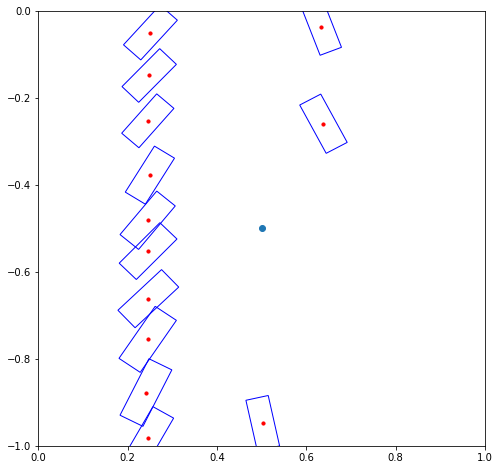

threshold : 0.5
Step : 4252  --  301 Batch 7.9862785 Targets =  52 Ratio = 0.15358227949876052 Threshold (0.5):
Step : 4253  --  302 Batch 6.2117696 Targets =  31 Ratio = 0.20037966389809886 Threshold (0.5):
Step : 4254  --  303 Batch 8.894848 Targets =  42 Ratio = 0.21178209213983445 Threshold (0.5):
Step : 4255  --  304 Batch 10.251008 Targets =  70 Ratio = 0.14644297191074918 Threshold (0.5):
Step : 4256  --  305 Batch 9.207789 Targets =  50 Ratio = 0.18415578842163086 Threshold (0.5):
Step : 4257  --  306 Batch 7.9450455 Targets =  59 Ratio = 0.13466178764731196 Threshold (0.5):
Step : 4258  --  307 Batch 10.52987 Targets =  78 Ratio = 0.13499833375979692 Threshold (0.5):
Step : 4259  --  308 Batch 10.330305 Targets =  37 Ratio = 0.2791974351212785 Threshold (0.5):
Step : 4260  --  309 Batch 8.038273 Targets =  49 Ratio = 0.16404638485032685 Threshold (0.5):
Step : 4261  --  310 Batch 12.554363 Targets =  74 Ratio = 0.16965355744233002 Threshold (0.5):
Step : 4262  --  311 Batch 9.

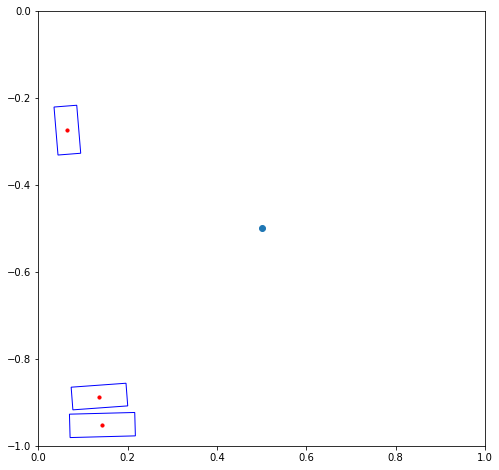

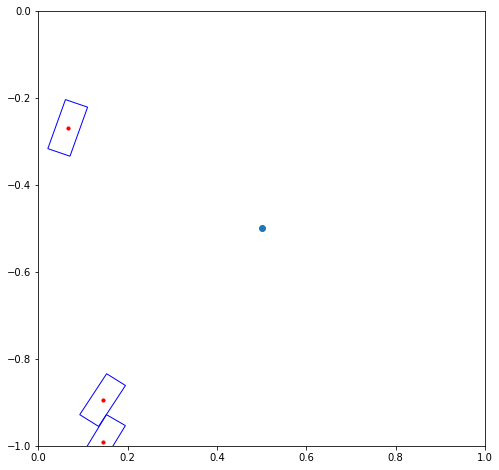

threshold : 0.5
Step : 4302  --  351 Batch 8.003454 Targets =  48 Ratio = 0.1667386293411255 Threshold (0.5):
Step : 4303  --  352 Batch 8.215219 Targets =  44 Ratio = 0.18670951236378064 Threshold (0.5):
Step : 4304  --  353 Batch 11.382836 Targets =  42 Ratio = 0.27101991290137883 Threshold (0.5):
Step : 4305  --  354 Batch 9.08055 Targets =  40 Ratio = 0.22701375484466552 Threshold (0.5):
Step : 4306  --  355 Batch 8.15508 Targets =  34 Ratio = 0.23985528945922852 Threshold (0.5):
Step : 4307  --  356 Batch 8.024884 Targets =  37 Ratio = 0.21688876280913483 Threshold (0.5):
Step : 4308  --  357 Batch 9.070522 Targets =  70 Ratio = 0.12957889011928014 Threshold (0.5):
Step : 4309  --  358 Batch 10.75022 Targets =  73 Ratio = 0.14726329176393274 Threshold (0.5):
Step : 4310  --  359 Batch 9.225155 Targets =  58 Ratio = 0.15905439442601696 Threshold (0.5):
Step : 4311  --  360 Batch 10.035372 Targets =  44 Ratio = 0.22807663137262518 Threshold (0.5):
Step : 4312  --  361 Batch 9.271856

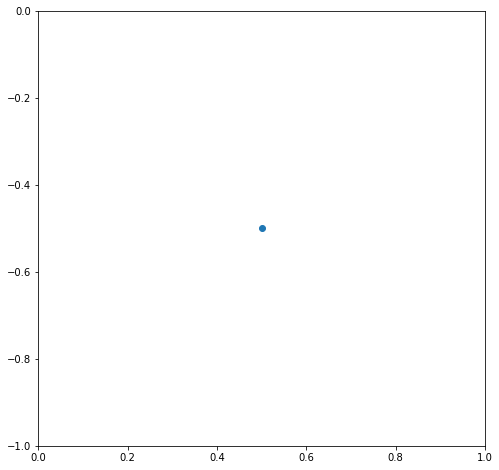

Nothing !!!!
Step : 4352  --  401 Batch 8.8694725 Targets =  47 Ratio = 0.18871218092898104 Threshold (0.5):
Step : 4353  --  402 Batch 7.8944407 Targets =  55 Ratio = 0.14353528456254439 Threshold (0.5):
Step : 4354  --  403 Batch 8.281903 Targets =  58 Ratio = 0.14279143563632307 Threshold (0.5):
Step : 4355  --  404 Batch 9.979631 Targets =  29 Ratio = 0.344125221515524 Threshold (0.5):
Step : 4356  --  405 Batch 8.781403 Targets =  35 Ratio = 0.250897216796875 Threshold (0.5):
Step : 4357  --  406 Batch 9.393662 Targets =  44 Ratio = 0.2134923284704035 Threshold (0.5):
Step : 4358  --  407 Batch 10.327013 Targets =  54 Ratio = 0.1912409817730939 Threshold (0.5):
Step : 4359  --  408 Batch 10.051329 Targets =  51 Ratio = 0.19708487566779642 Threshold (0.5):
Step : 4360  --  409 Batch 10.932902 Targets =  48 Ratio = 0.2277687986691793 Threshold (0.5):
Step : 4361  --  410 Batch 7.9825163 Targets =  47 Ratio = 0.16984077210121967 Threshold (0.5):
Step : 4362  --  411 Batch 7.1046286 T

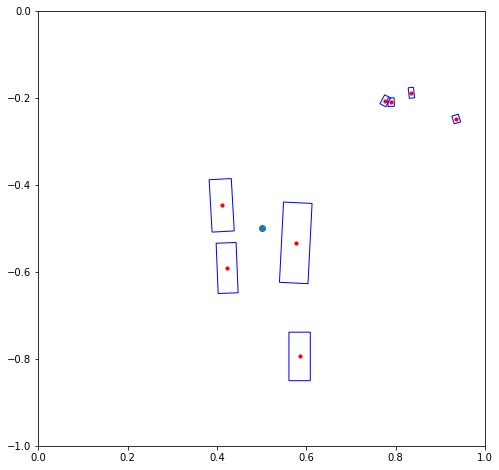

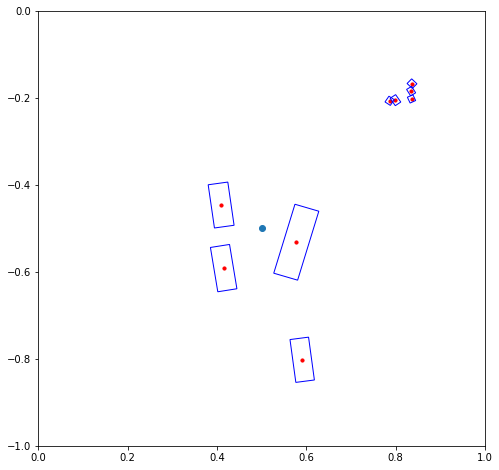

threshold : 0.5
Step : 4402  --  451 Batch 9.749695 Targets =  59 Ratio = 0.16524906481726695 Threshold (0.5):
Step : 4403  --  452 Batch 10.434948 Targets =  37 Ratio = 0.28202562074403503 Threshold (0.5):
Step : 4404  --  453 Batch 10.727059 Targets =  67 Ratio = 0.16010536364654995 Threshold (0.5):
Step : 4405  --  454 Batch 7.4766016 Targets =  57 Ratio = 0.13116844913415743 Threshold (0.5):
Step : 4406  --  455 Batch 8.013804 Targets =  43 Ratio = 0.18636754501697628 Threshold (0.5):
Step : 4407  --  456 Batch 7.997982 Targets =  37 Ratio = 0.2161616763553104 Threshold (0.5):
Step : 4408  --  457 Batch 9.08646 Targets =  68 Ratio = 0.13362441343419693 Threshold (0.5):
Step : 4409  --  458 Batch 7.57794 Targets =  44 Ratio = 0.17222590879960495 Threshold (0.5):
Step : 4410  --  459 Batch 7.483555 Targets =  51 Ratio = 0.14673636941348805 Threshold (0.5):
Step : 4411  --  460 Batch 6.493084 Targets =  30 Ratio = 0.2164361317952474 Threshold (0.5):
Step : 4412  --  461 Batch 7.774525

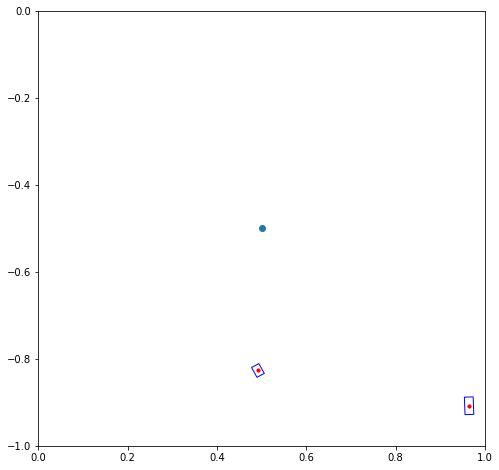

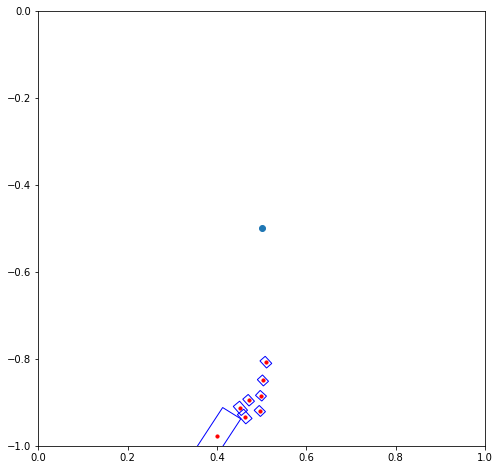

threshold : 0.3
Step : 4452  --  501 Batch 10.069502 Targets =  47 Ratio = 0.21424472078363946 Threshold (0.5):
Step : 4453  --  502 Batch 8.944233 Targets =  52 Ratio = 0.17200447962834284 Threshold (0.5):
Step : 4454  --  503 Batch 7.514845 Targets =  53 Ratio = 0.14178952630960717 Threshold (0.5):
Step : 4455  --  504 Batch 11.251463 Targets =  61 Ratio = 0.18445021207215356 Threshold (0.5):
Step : 4456  --  505 Batch 5.8418465 Targets =  47 Ratio = 0.12429460566094581 Threshold (0.5):
Step : 4457  --  506 Batch 10.909153 Targets =  46 Ratio = 0.23715549966563348 Threshold (0.5):
Step : 4458  --  507 Batch 6.7316823 Targets =  56 Ratio = 0.12020861251013619 Threshold (0.5):
Step : 4459  --  508 Batch 8.607239 Targets =  80 Ratio = 0.10759048461914063 Threshold (0.5):
Step : 4460  --  509 Batch 8.60154 Targets =  58 Ratio = 0.14830240710028286 Threshold (0.5):
Step : 4461  --  510 Batch 9.48329 Targets =  71 Ratio = 0.1335674608257455 Threshold (0.5):
Step : 4462  --  511 Batch 11.43

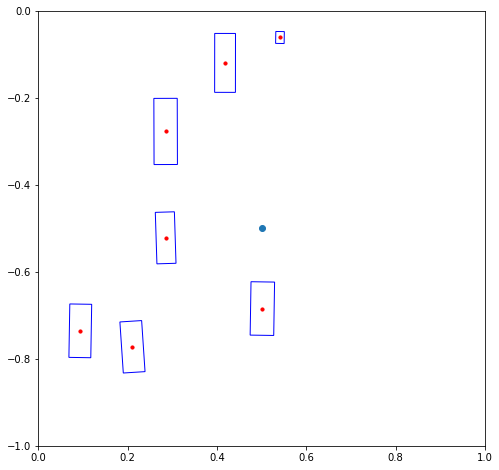

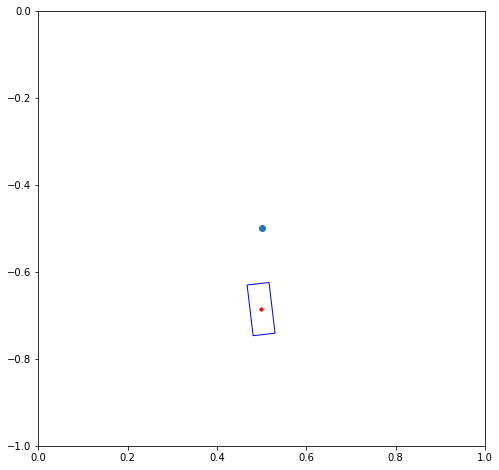

threshold : 0.5
Step : 4502  --  551 Batch 9.544321 Targets =  66 Ratio = 0.14461092515425247 Threshold (0.5):
Step : 4503  --  552 Batch 7.845101 Targets =  35 Ratio = 0.2241457394191197 Threshold (0.5):
Step : 4504  --  553 Batch 7.770649 Targets =  58 Ratio = 0.13397670614308324 Threshold (0.5):
Step : 4505  --  554 Batch 8.226551 Targets =  80 Ratio = 0.10283188819885254 Threshold (0.5):
Step : 4506  --  555 Batch 9.796865 Targets =  34 Ratio = 0.2881431018604952 Threshold (0.5):
Step : 4507  --  556 Batch 10.22148 Targets =  68 Ratio = 0.1503158877877628 Threshold (0.5):
Step : 4508  --  557 Batch 8.689798 Targets =  58 Ratio = 0.14982410957073344 Threshold (0.5):
Step : 4509  --  558 Batch 8.0945835 Targets =  72 Ratio = 0.11242477099100749 Threshold (0.5):
Step : 4510  --  559 Batch 8.797954 Targets =  31 Ratio = 0.2838049550210276 Threshold (0.5):
Step : 4511  --  560 Batch 9.188292 Targets =  68 Ratio = 0.13512193455415614 Threshold (0.5):
Step : 4512  --  561 Batch 10.510647 

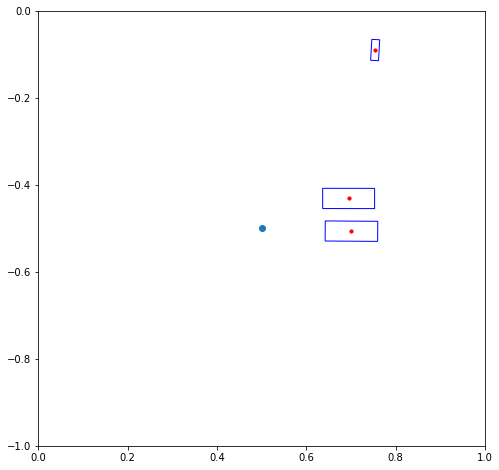

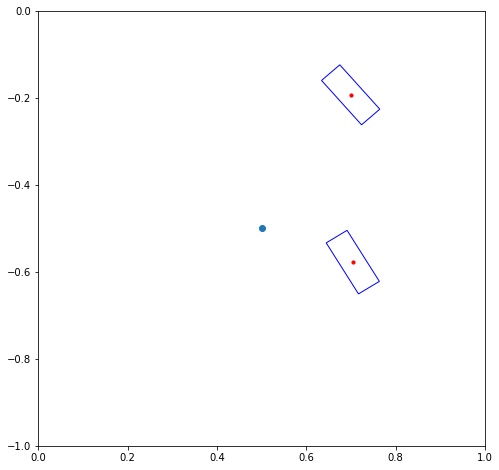

threshold : 0.5
Step : 4552  --  601 Batch 7.771035 Targets =  39 Ratio = 0.19925731267684546 Threshold (0.5):
Step : 4553  --  602 Batch 8.489301 Targets =  35 Ratio = 0.24255144936697823 Threshold (0.5):
Step : 4554  --  603 Batch 9.630525 Targets =  59 Ratio = 0.1632292311070329 Threshold (0.5):
Step : 4555  --  604 Batch 8.442524 Targets =  64 Ratio = 0.1319144368171692 Threshold (0.5):
Step : 4556  --  605 Batch 10.951156 Targets =  48 Ratio = 0.22814907630284628 Threshold (0.5):
Step : 4557  --  606 Batch 8.544258 Targets =  38 Ratio = 0.2248488978335732 Threshold (0.5):
Step : 4558  --  607 Batch 7.567219 Targets =  47 Ratio = 0.1610046549046293 Threshold (0.5):
Step : 4559  --  608 Batch 8.351155 Targets =  43 Ratio = 0.1942129135131836 Threshold (0.5):
Step : 4560  --  609 Batch 11.175024 Targets =  69 Ratio = 0.16195687003757642 Threshold (0.5):
Step : 4561  --  610 Batch 9.874045 Targets =  42 Ratio = 0.23509631838117326 Threshold (0.5):
Step : 4562  --  611 Batch 9.369906 T

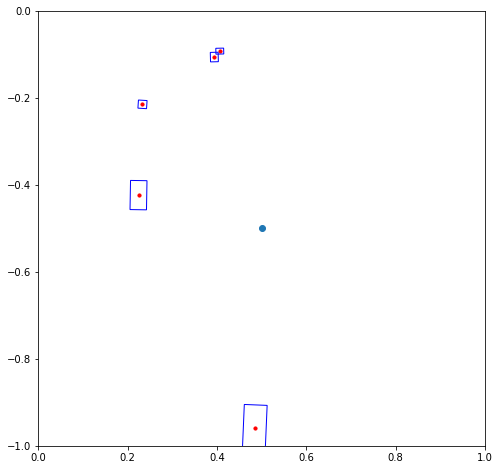

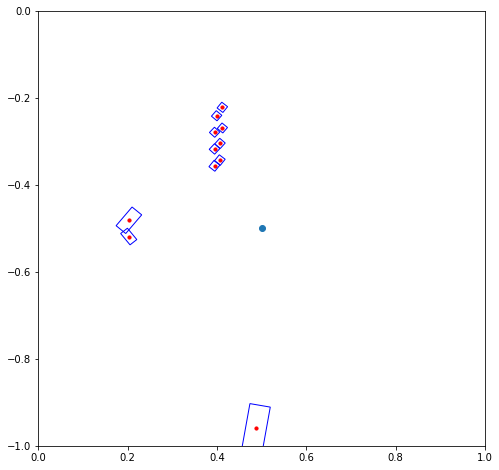

threshold : 0.5
Step : 4602  --  651 Batch 9.846252 Targets =  62 Ratio = 0.1588105232484879 Threshold (0.5):
Step : 4603  --  652 Batch 7.8180847 Targets =  49 Ratio = 0.1595527493223852 Threshold (0.5):
Step : 4604  --  653 Batch 9.377543 Targets =  57 Ratio = 0.1645183061298571 Threshold (0.5):
Step : 4605  --  654 Batch 9.066469 Targets =  60 Ratio = 0.15110781987508137 Threshold (0.5):
Step : 4606  --  655 Batch 11.740464 Targets =  49 Ratio = 0.2396013104185766 Threshold (0.5):
Step : 4607  --  656 Batch 9.104244 Targets =  45 Ratio = 0.20231653849283854 Threshold (0.5):
Step : 4608  --  657 Batch 10.082182 Targets =  49 Ratio = 0.20575881490902026 Threshold (0.5):
Step : 4609  --  658 Batch 9.94422 Targets =  107 Ratio = 0.09293663167507848 Threshold (0.5):
Step : 4610  --  659 Batch 10.870752 Targets =  66 Ratio = 0.1647083687059807 Threshold (0.5):
Step : 4611  --  660 Batch 9.288967 Targets =  67 Ratio = 0.1386413004860949 Threshold (0.5):
Step : 4612  --  661 Batch 11.660622

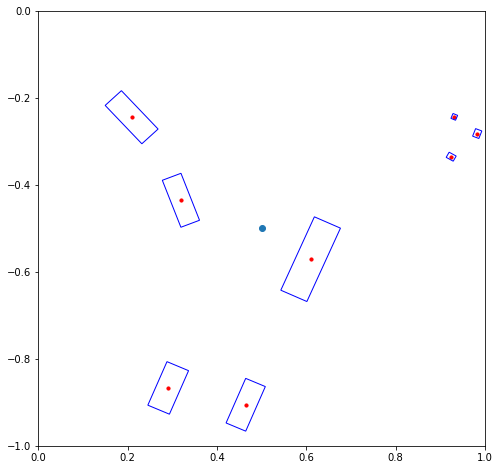

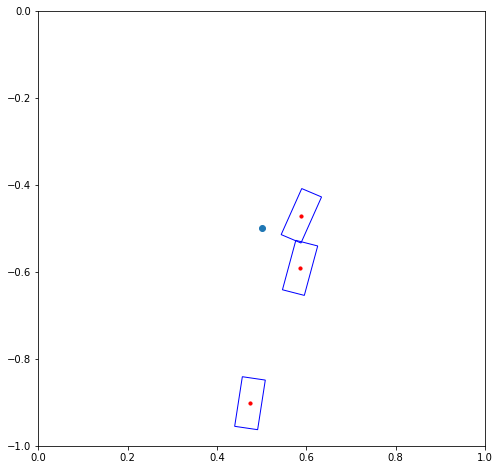

threshold : 0.5
Step : 4652  --  701 Batch 11.606504 Targets =  40 Ratio = 0.2901626110076904 Threshold (0.5):
Step : 4653  --  702 Batch 12.021188 Targets =  60 Ratio = 0.2003531297047933 Threshold (0.5):
Step : 4654  --  703 Batch 8.984278 Targets =  52 Ratio = 0.17277457163884088 Threshold (0.5):
Step : 4655  --  704 Batch 13.060466 Targets =  36 Ratio = 0.36279071701897514 Threshold (0.5):
Step : 4656  --  705 Batch 9.963433 Targets =  58 Ratio = 0.17178333216700062 Threshold (0.5):
Step : 4657  --  706 Batch 11.175197 Targets =  49 Ratio = 0.22806523770702128 Threshold (0.5):
Step : 4658  --  707 Batch 10.813953 Targets =  59 Ratio = 0.18328734575691868 Threshold (0.5):
Step : 4659  --  708 Batch 9.3314705 Targets =  48 Ratio = 0.19440563519795737 Threshold (0.5):
Step : 4660  --  709 Batch 8.487062 Targets =  36 Ratio = 0.23575173483954537 Threshold (0.5):
Step : 4661  --  710 Batch 8.658452 Targets =  65 Ratio = 0.13320695436917818 Threshold (0.5):
Step : 4662  --  711 Batch 8.5

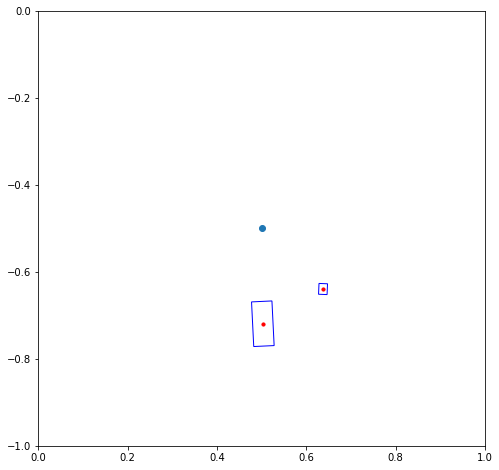

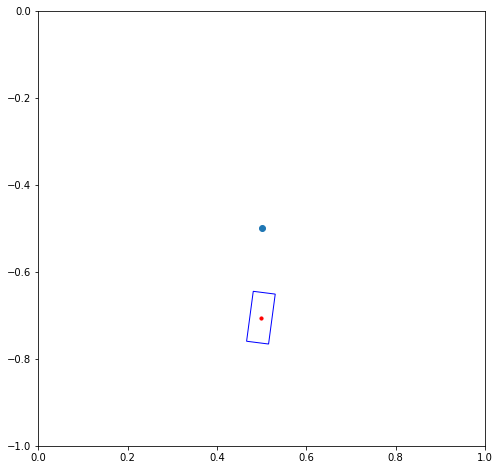

threshold : 0.5
Step : 4702  --  751 Batch 11.730919 Targets =  62 Ratio = 0.18920836910124747 Threshold (0.5):
Step : 4703  --  752 Batch 9.3204155 Targets =  40 Ratio = 0.2330103874206543 Threshold (0.5):
Step : 4704  --  753 Batch 8.193343 Targets =  64 Ratio = 0.1280209869146347 Threshold (0.5):
Step : 4705  --  754 Batch 10.845636 Targets =  48 Ratio = 0.22595075766245523 Threshold (0.5):
Step : 4706  --  755 Batch 10.134541 Targets =  53 Ratio = 0.19121774637474204 Threshold (0.5):
Step : 4707  --  756 Batch 9.882952 Targets =  32 Ratio = 0.3088422417640686 Threshold (0.5):
Step : 4708  --  757 Batch 8.806766 Targets =  77 Ratio = 0.11437357865370713 Threshold (0.5):
Step : 4709  --  758 Batch 8.135532 Targets =  58 Ratio = 0.14026779964052397 Threshold (0.5):
Step : 4710  --  759 Batch 7.93357 Targets =  43 Ratio = 0.18450162577074627 Threshold (0.5):
Step : 4711  --  760 Batch 10.349794 Targets =  63 Ratio = 0.1642824506002759 Threshold (0.5):
Step : 4712  --  761 Batch 10.1546

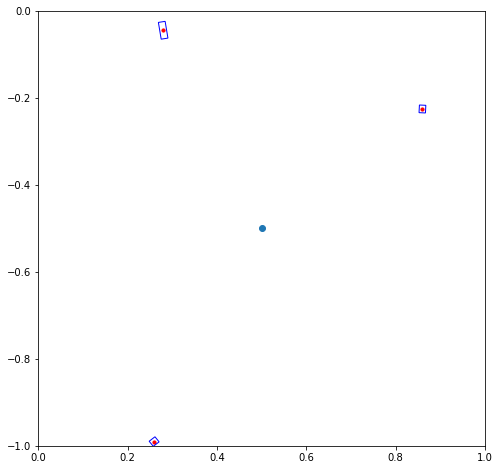

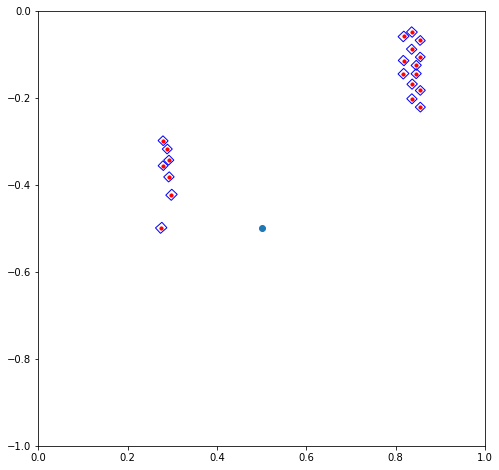

threshold : 0.3
Step : 4752  --  801 Batch 9.236031 Targets =  48 Ratio = 0.19241730372111002 Threshold (0.5):
Step : 4753  --  802 Batch 7.812471 Targets =  55 Ratio = 0.14204492568969726 Threshold (0.5):
Step : 4754  --  803 Batch 8.23956 Targets =  40 Ratio = 0.20598900318145752 Threshold (0.5):
Step : 4755  --  804 Batch 11.232162 Targets =  54 Ratio = 0.20800300880714698 Threshold (0.5):
Step : 4756  --  805 Batch 9.013847 Targets =  46 Ratio = 0.19595320328422214 Threshold (0.5):
Step : 4757  --  806 Batch 8.183172 Targets =  53 Ratio = 0.1543994759613613 Threshold (0.5):
Step : 4758  --  807 Batch 9.253435 Targets =  41 Ratio = 0.22569353987530963 Threshold (0.5):
Step : 4759  --  808 Batch 9.855844 Targets =  40 Ratio = 0.24639608860015869 Threshold (0.5):
Step : 4760  --  809 Batch 10.190021 Targets =  64 Ratio = 0.15921907126903534 Threshold (0.5):
Step : 4761  --  810 Batch 8.83288 Targets =  51 Ratio = 0.17319372588512943 Threshold (0.5):
Step : 4762  --  811 Batch 8.237095

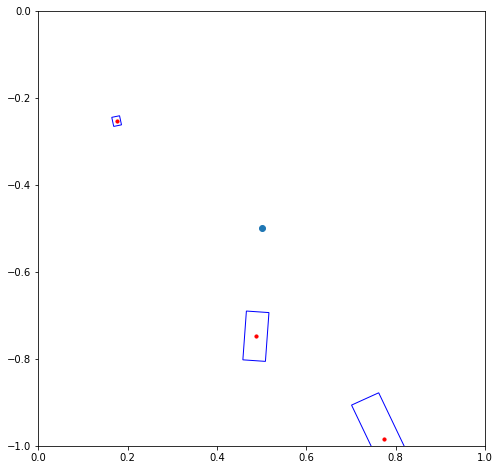

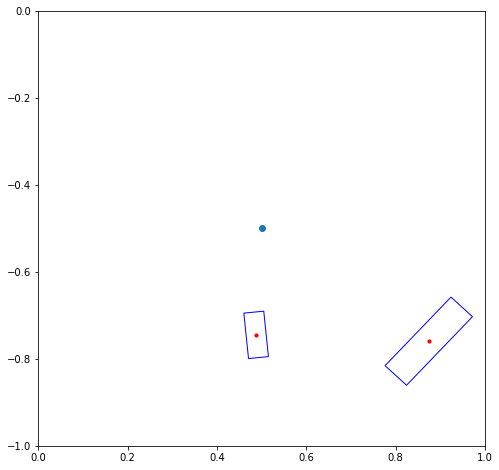

threshold : 0.5
Step : 4802  --  851 Batch 7.576698 Targets =  44 Ratio = 0.17219767787239768 Threshold (0.5):
Step : 4803  --  852 Batch 7.527655 Targets =  58 Ratio = 0.12978715732179838 Threshold (0.5):
Step : 4804  --  853 Batch 9.629084 Targets =  65 Ratio = 0.1481397482065054 Threshold (0.5):
Step : 4805  --  854 Batch 8.62521 Targets =  52 Ratio = 0.16586941939133865 Threshold (0.5):
Step : 4806  --  855 Batch 9.545628 Targets =  56 Ratio = 0.17045763560703822 Threshold (0.5):
Step : 4807  --  856 Batch 11.467556 Targets =  45 Ratio = 0.2548345777723524 Threshold (0.5):
Step : 4808  --  857 Batch 8.875004 Targets =  29 Ratio = 0.3060346142999057 Threshold (0.5):
Step : 4809  --  858 Batch 8.250603 Targets =  25 Ratio = 0.33002410888671874 Threshold (0.5):
Step : 4810  --  859 Batch 8.002966 Targets =  56 Ratio = 0.1429101058415004 Threshold (0.5):
Step : 4811  --  860 Batch 9.617517 Targets =  60 Ratio = 0.1602919578552246 Threshold (0.5):
Step : 4812  --  861 Batch 10.391621 Ta

In [ ]:
import tqdm
import json

#
if os.path.exists("/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/step-stacked-image.json"):
  with open('/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/step-stacked-image.json') as f:
    data = json.load(f)
  step = data['step']
else:
  step = 0
for epoch in tqdm.notebook.tqdm(range(opt.epochs),unit='epoch'):
    model.train()
    for batch_i, (imgs, targets) in enumerate(dataloader):
        batches_done = len(dataloader) * epoch + batch_i
        
        imgs = Variable(imgs.to(device))
        targets = Variable(targets.to(device), requires_grad=False)
        target_draw = targets.detach().clone().cpu()

        loss, outputs = model(imgs, targets)
        loss.backward()
        loss = loss.cpu().detach().numpy()

        try:
          print("Step :",step," -- ",batch_i,"Batch",loss,"Targets = ",targets.shape[0],"Ratio =",loss/targets.shape[0],"Threshold (0.5):")#, len(non_max_suppression(outputs,conf_thres = 0.5,nms_thres=0.5)[0]) ,",", len(non_max_suppression(outputs,conf_thres = 0.5,nms_thres=0.5)[1]))
        except:
          print("Step :",step," -- ",batch_i,"Batch",loss,"Targets = ",targets.shape[0],"Ratio =",loss/targets.shape[0])
          
        if batches_done % opt.gradient_accumulations == 0 and batches_done != 0:
            # Accumulates gradient before each step
            optimizer.step()
            optimizer.zero_grad()
            step += 1
            steps ={'step':step}
            if step == 400000:
              optimizer.param_groups[0]['lr'] = 0.0001
            elif step ==  450000 :
              optimizer.param_groups[0]['lr'] = 0.00001

        
        if batch_i % opt.checkpoint_interval == 0 and batch_i != 0:
            torch.save(model.state_dict(), "/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/stacked-images-20m-1.pth")
            with open("/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/step-stacked-image.json",'w+') as f:
              json.dump(steps,f)
            print("Saved")
            print("->",optimizer.param_groups[0]['lr'])
            tar = []
            for t in target_draw:
              if t[0] == 0:
                tar.append(t[2:])
            draw(tar)
            try:
                out = non_max_suppression(outputs,conf_thres = 0.5,nms_thres=0.01)
                out[0][:,:2] /=416
                out[0][:,3:5] /=416
                draw(out[0])
                print("threshold : 0.5")
            except:
                try:
                    out = non_max_suppression(outputs,conf_thres = 0.3,nms_thres=0.01)
                    out[0][:,:2] /=416
                    out[0][:,3:5] /=416
                    draw(out[0])
                    print("threshold : 0.3")
                except:
                  print("Nothing !!!!")

        del imgs,targets,outputs,loss
        torch.cuda.empty_cache()

        
    if epoch % opt.evaluation_interval == 0:# and epoch != 0:
        print("\n---- Evaluating Model ----")
        # Evaluate the model on the validation set
        precision, recall, AP, f1, ap_class = evaluate(
            model,
            test_samples,
            iou_thres=0.5,
            conf_thres=0.5,
            nms_thres=0.01,
            img_size=opt.img_size,
            batch_size=32,
        )
        evaluation_metrics = [
            ("val_precision", precision.mean()),
            ("val_recall", recall.mean()),
            ("val_mAP", AP.mean()),
            ("val_f1", f1.mean()),
        ]
        #logger.list_of_scalars_summary(evaluation_metrics, epoch)

        # Print class APs and mAP
        ap_table = [["Index", "Class name", "AP"]]
        for i, c in enumerate(ap_class):
            ap_table += [[c, class_names[c], "%.5f" % AP[i]]]
        print(AsciiTable(ap_table).table)
        print(f"---- mAP {AP.mean()}")
        with open("/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/mAP.txt",'a') as f:
            f.write(AsciiTable(ap_table).table)
            f.write('\nmAP : {map}\n'.format(map = AP.mean()))
        try:
          with open("/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/best-mAP-stacked_images_20m.txt",'r') as f:
              mAP = float(f.readline())
        except:
          mAP = 0
        if mAP < AP.mean() :
            with open("/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/best-mAP-stacked_images_20m.txt",'w') as f:
                f.write(str(AP.mean())+"\n")
                print("old: {oldmap}, new: {newmap}\nBest Model Saved!!".format(oldmap = mAP,newmap = AP.mean()))
            torch.save(model.state_dict(), "/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/aws-stacked-images-20m-best.pth")


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/aws-stacked-images-20m-5.pth")

#mAP

In [ ]:
with open("checkpoints/mAP.txt",'a') as f:
  f.write(AsciiTable(ap_table).table)
  f.write('\nmAP : {map}'.format(map = AP.mean()))

In [ ]:
!cat checkpoints/mAP.txt

+-------+--------------------------------------+---------+
| Index | Class name                           | AP      |
+-------+--------------------------------------+---------+
| 0     | human.pedestrian.adult               | 0.00000 |
| 1     | human.pedestrian.child               | 0.00000 |
| 2     | human.pedestrian.wheelchair          | 0.00000 |
| 3     | human.pedestrian.stroller            | 0.00000 |
| 4     | human.pedestrian.personal_mobility   | 0.00000 |
| 5     | human.pedestrian.police_officer      | 0.00000 |
| 6     | human.pedestrian.construction_worker | 0.00000 |
| 7     | animal                               | 0.00000 |
| 8     | vehicle.car                          | 0.05385 |
| 9     | vehicle.motorcycle                   | 0.00000 |
| 10    | vehicle.bicycle                      | 0.00000 |
| 11    | vehicle.bus.bendy                    | 0.00000 |
| 12    | vehicle.bus.rigid                    | 0.00000 |
| 13    | vehicle.truck                        | 0.00000

In [ ]:
!cat checkpoints/mAP.txt

mAP : 0.00019884741225546839
mAP : 3.461213096768677e-05
+-------+--------------------------------------+---------+
| Index | Class name                           | AP      |
+-------+--------------------------------------+---------+
| 0     | human.pedestrian.adult               | 0.00001 |
| 1     | human.pedestrian.child               | 0.00000 |
| 2     | human.pedestrian.wheelchair          | 0.00000 |
| 3     | human.pedestrian.stroller            | 0.00000 |
| 4     | human.pedestrian.personal_mobility   | 0.00000 |
| 5     | human.pedestrian.police_officer      | 0.00000 |
| 6     | human.pedestrian.construction_worker | 0.00000 |
| 7     | animal                               | 0.00000 |
| 8     | vehicle.car                          | 0.00017 |
| 9     | vehicle.motorcycle                   | 0.00004 |
| 10    | vehicle.bicycle                      | 0.00000 |
| 11    | vehicle.bus.bendy                    | 0.00000 |
| 12    | vehicle.bus.rigid                    | 0.00000 |

In [ ]:
!cat checkpoints/best-mAP-stacked_images_20m.txt

0.055037516928643844

In [ ]:
with open("checkpoints/best-mAP-stacked_images_20m.txt",'r') as f:
  mAP = float(f.readline())
  print(mAP)
  print(type(mAP))

0.055037516928643844
<class 'float'>


In [ ]:
torch.save(model.state_dict(), "checkpoints/aws-stacked-images-20m-best.pth")

In [ ]:
!ls checkpoints/

aws-1.pth		      aws-stacked-images-20m-6.pth
aws-4.pth		      aws-stacked-images-20m-best.pth
aws-short20-6.pth	      best-mAP-stacked_images_20m.txt
aws-short20-7.pth	      full_data_drive_restart-3.pth
aws-stacked-images-20m-0.pth  mAP.txt
aws-stacked-images-20m-1.pth  sampler_state.pth
aws-stacked-images-20m-2.pth  step-short20.json
aws-stacked-images-20m-3.pth  step-stacked-image.json
aws-stacked-images-20m-4.pth  step.json
aws-stacked-images-20m-5.pth


In [ ]:
precision, recall, AP, f1, ap_class = evaluate(
    model,
    test_samples,
    iou_thres=0.5,
    conf_thres=0.5,
    nms_thres=0.01, 
    img_size=opt.img_size,
    batch_size=32,
)
evaluation_metrics = [
    ("val_precision", precision.mean()),
    ("val_recall", recall.mean()),
    ("val_mAP", AP.mean()),
    ("val_f1", f1.mean()),
]
#logger.list_of_scalars_summary(evaluation_metrics, epoch)

# Print class APs and mAP
ap_table = [["Index", "Class name", "AP"]]
for i, c in enumerate(ap_class):
    ap_table += [[c, class_names[c], "%.5f" % AP[i]]]
print(AsciiTable(ap_table).table)
print(f"---- mAP {AP.mean()}")

Computing AP: 100%|██████████| 22/22 [00:00<00:00, 421.04it/s]

+-------+--------------------------------------+---------+
| Index | Class name                           | AP      |
+-------+--------------------------------------+---------+
| 0     | human.pedestrian.adult               | 0.00000 |
| 1     | human.pedestrian.child               | 0.00000 |
| 2     | human.pedestrian.wheelchair          | 0.00000 |
| 3     | human.pedestrian.stroller            | 0.00000 |
| 4     | human.pedestrian.personal_mobility   | 0.00000 |
| 5     | human.pedestrian.police_officer      | 0.00000 |
| 6     | human.pedestrian.construction_worker | 0.00000 |
| 7     | animal                               | 0.00000 |
| 8     | vehicle.car                          | 0.10713 |
| 9     | vehicle.motorcycle                   | 0.00000 |
| 10    | vehicle.bicycle                      | 0.00000 |
| 11    | vehicle.bus.bendy                    | 0.00000 |
| 12    | vehicle.bus.rigid                    | 0.00000 |
| 13    | vehicle.truck                        | 0.02059

In [ ]:
precision, recall, AP, f1, ap_class = evaluate(
    model,
    test_samples,
    iou_thres=0.5,
    conf_thres=0.5,
    nms_thres=0.01, 
    img_size=opt.img_size,
    batch_size=32,
)
evaluation_metrics = [
    ("val_precision", precision.mean()),
    ("val_recall", recall.mean()),
    ("val_mAP", AP.mean()),
    ("val_f1", f1.mean()),
]
#logger.list_of_scalars_summary(evaluation_metrics, epoch)

# Print class APs and mAP
ap_table = [["Index", "Class name", "AP"]]
for i, c in enumerate(ap_class):
    ap_table += [[c, class_names[c], "%.5f" % AP[i]]]
print(AsciiTable(ap_table).table)
print(f"---- mAP {AP.mean()}")

Computing AP: 100%|██████████| 22/22 [00:00<00:00, 462.40it/s]

+-------+--------------------------------------+---------+
| Index | Class name                           | AP      |
+-------+--------------------------------------+---------+
| 0     | human.pedestrian.adult               | 0.00000 |
| 1     | human.pedestrian.child               | 0.00000 |
| 2     | human.pedestrian.wheelchair          | 0.00000 |
| 3     | human.pedestrian.stroller            | 0.00000 |
| 4     | human.pedestrian.personal_mobility   | 0.00000 |
| 5     | human.pedestrian.police_officer      | 0.00000 |
| 6     | human.pedestrian.construction_worker | 0.00000 |
| 7     | animal                               | 0.00000 |
| 8     | vehicle.car                          | 0.09188 |
| 9     | vehicle.motorcycle                   | 0.00499 |
| 10    | vehicle.bicycle                      | 0.00000 |
| 11    | vehicle.bus.bendy                    | 0.00000 |
| 12    | vehicle.bus.rigid                    | 0.00000 |
| 13    | vehicle.truck                        | 0.01118

In [ ]:
for param_group in optimizer.param_groups:
  print(param_group['lr'])

#Visualizing Output

In [ ]:
img, tragets = next(iter(dataloader))
print(tragets)

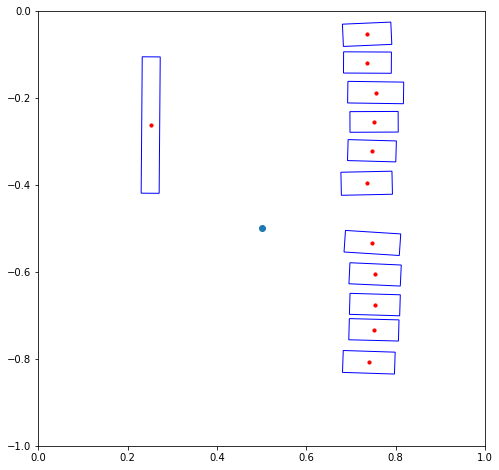

In [ ]:
img, tragets = next(iter(datal))
img = Variable(img.to(device))
model.eval()
target = []
for t in tragets:
  if t[0] == 0:
    target.append(t[2:])
output = model(img)
draw(target)

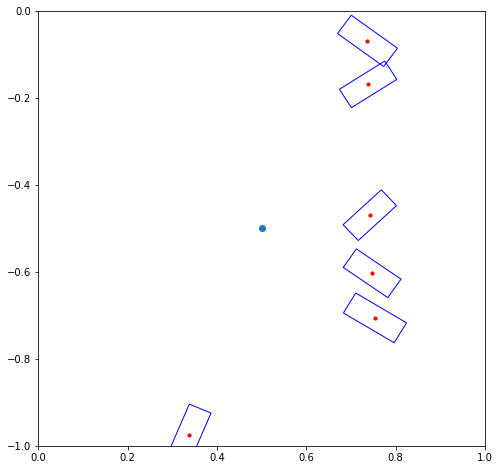

In [ ]:
out = non_max_suppression(output,conf_thres = 0.5,nms_thres = 0.001)
out[0][:,:2] /=416
out[0][:,3:5] /=416
draw(out[0])

In [ ]:
draw(out[0])

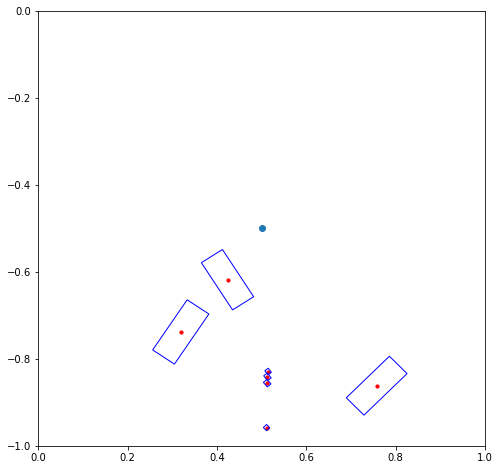

In [ ]:
draw(out[0])

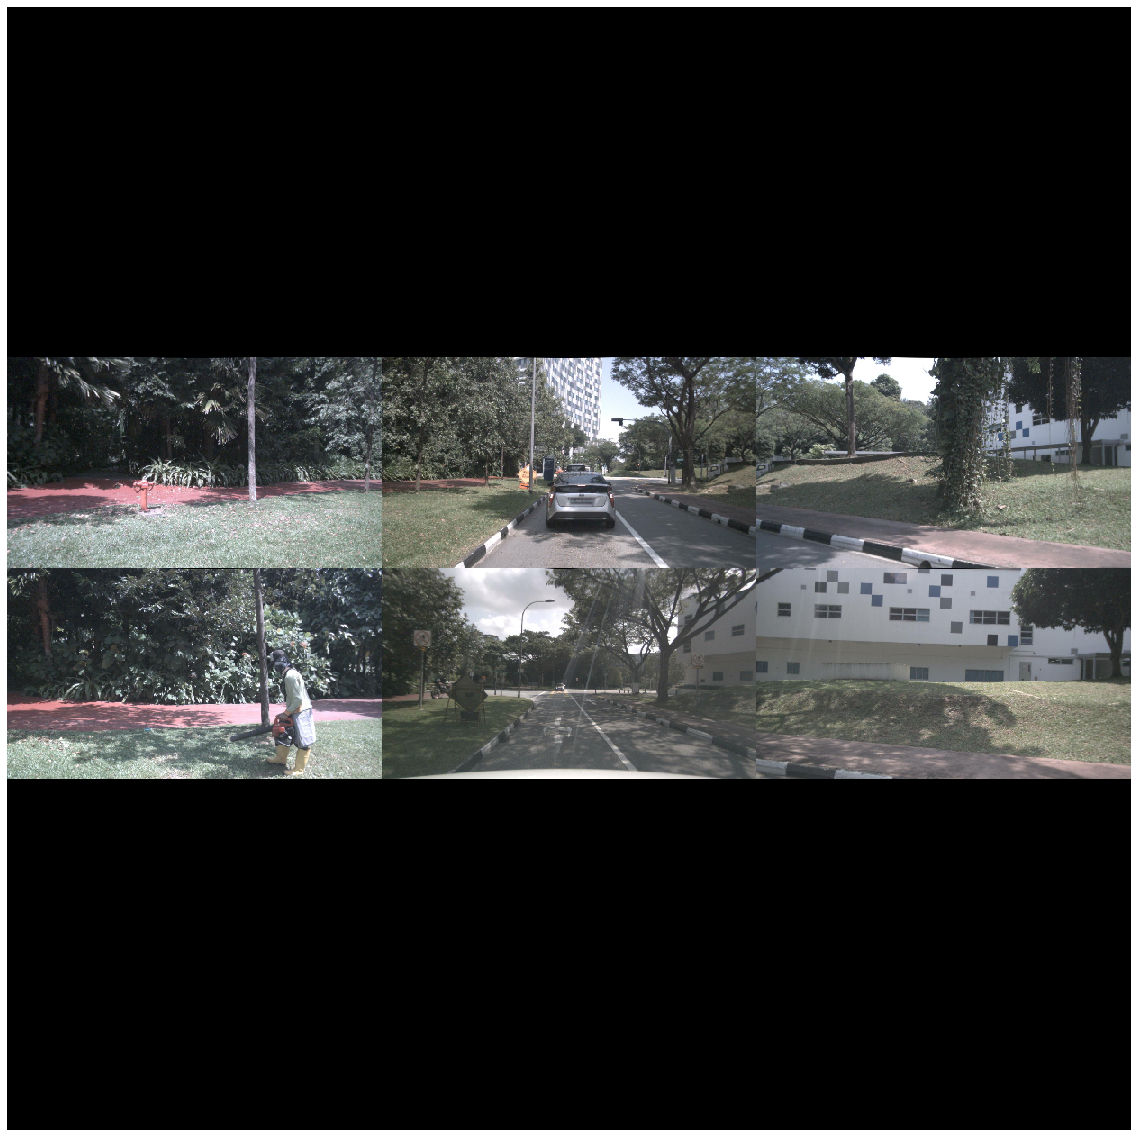

In [ ]:
dpi = 80
im_data = img[0].cpu().permute(1, 2, 0)
height, width, depth = im_data.shape

# What size does the figure need to be in inches to fit the image?
figsize = width / float(dpi), height / float(dpi)

# Create a figure of the right size with one axes that takes up the full figure
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])

# Hide spines, ticks, etc.
ax.axis('off')

# Display the image.
ax.imshow(im_data, cmap='gray')

plt.show()

In [ ]:
!mv "singledepthyolo(leastnoparameters-starting).pth" checkpoints/

#Demo

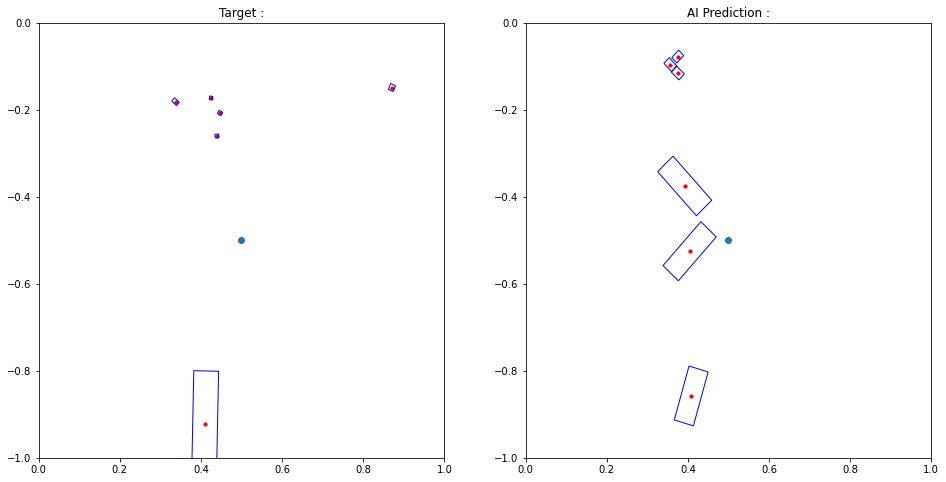

In [ ]:
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt



model.eval()
file_path = 'data/'
camera = ['CAM_FRONT_LEFT','CAM_FRONT','CAM_FRONT_RIGHT', 'CAM_BACK_RIGHT','CAM_BACK','CAM_BACK_LEFT']
scene = nusc.scene[0]
sample_token = scene['first_sample_token']
sample = nusc.get('sample',sample_token)
while not sample['next'] =='':

  #--------------
  #IMAGE
  #--------------
  new_token = sample['token']
  sample = nusc.get('sample',sample['next'])

  #Camera image stitching and applying blackout from the selected cameras
  for i, c in enumerate(camera):
    sample_data = nusc.get('sample_data',sample['data'][c])
    data = transforms.ToTensor()(Image.open(file_path + sample_data['filename']).convert('RGB'))
    #print(c)
    
    #plt.imshow( data.permute(1, 2, 0) )
    #plt.show()
    if i % 2 != 0 :
      data = torch.flip(data, [-1])
      #print("fliped")
      #plt.imshow( data.permute(1, 2, 0) ) 
      #plt.show()
    if c == 'CAM_FRONT_LEFT':
      image_data = data
    else:
      image_data = torch.cat((image_data,data),0)
    #print("Current image shape :", image_data.shape)

  image_data, _ = pad_to_square(image_data,0)
  #print("Current image shape :", image_data.shape)

  image_data = resize(image_data, [416,416])
  image_data = image_data.unsqueeze(0)

  #-----------
  #LABEL
  #-----------

  blackout_cameras = []
  annos_list = sample['anns']
  converted_anotations = []
  #ego pose
  sensor = 'LIDAR_TOP'
  lidar_top_data = nusc.get('sample_data', sample['data'][sensor])
  ego_pose = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
  ego_yaw = dataset.quaternion_yaw(ego_pose['rotation']) - math.pi/2

  boxes = []
  t=[]
  original_ego_yaw = ego_yaw + math.pi/2 #converting back to original value

  for annos in annos_list:
    annotation = nusc.get('sample_annotation', annos)
    vis = nusc.get('visibility',annotation['visibility_token'])
    vis = vis['level'][1:].split("-")
    if int(vis[1]) <= 40 :
      continue
    #print(vis)
    box = []

    #xyz
    flag = False
    cordinates = [annotation['translation'][i] - ego_pose['translation'][i] for i in range(3)]
    cordinates[0], cordinates[1] = dataset.rotate_around_point_lowperf(cordinates[:2], ego_yaw, origin=(0, 0))
    if dataset.augment :
      flag = dataset.check_cameraregion(cordinates,blackout_cameras,sample)
    cordinates = dataset.convert_to_top_corner(cordinates)
    if cordinates[0] > 2*dataset.max_width or cordinates[0] < 0 or cordinates[1] > 2*dataset.max_length or cordinates[1] < 0 or flag:# or (dataset.augment and dataset.check_cameraregion() == 0):
      continue

    #whl
    size = annotation['size']

    #angle r1, r2
      #converting to relative angle (0-360)
    rotation_yaw = dataset.quaternion_yaw(annotation['rotation']) - original_ego_yaw
    if rotation_yaw < 0:
      rotation_yaw += math.pi*2
    r1 = (1 + math.sin(rotation_yaw))/2
    r2 = (1 + math.cos(rotation_yaw))/2

    #category
    category_index = dataset.categories.index(annotation['category_name'])

    #Appending to Box
    box.append(category_index)
    for i,j in zip(cordinates, [dataset.max_width*2, dataset.max_length*2, dataset.max_height]):
      box.append(i/j)
    for i,j in zip(size, [dataset.max_width*2, dataset.max_length*2, dataset.max_height]):
      box.append(i/j)
    box.append(r1)
    box.append(r2)

    #Appending to Boxes
    boxes.append(box)
    t.append(annos)

  boxes = torch.Tensor(boxes)

  output = model(image_data.to(device))
  #print(output.shape)
  out = non_max_suppression(output,conf_thres = 0.3,nms_thres = 0.01)
  clear_output()
  try:
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1 = draw(boxes[:,1:],ax1)
    ax1.set_title("Target :")
    out[0][:,:2] /=416
    out[0][:,3:5] /=416
    #print(loss)
    ax2 = fig.add_subplot(1,2,2)
    ax2 = draw(out[0],ax2)
    ax2.set_title("AI Prediction :")
  except:
    pass
  plt.show()
  time.sleep(1)

#model changing

In [ ]:
!wget -c https://pjreddie.com/media/files/yolov3.weights

--2021-03-26 04:40:01--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  7.26MB/s    in 34s     

2021-03-26 04:40:36 (6.89 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
print(model)

Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(18, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_1): LeakyReLU(negative_slope=0.1)
    )
    (2): Sequential(
      (conv_2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_3): BatchNorm2d(64, eps=1e-05, mome

In [ ]:
for mod in model.module_list:
  for param in mod.parameters():
    if param.requires_grad == True:
      param.requires_grad = False

In [ ]:
for mod in model.module_list:
  for param in mod.parameters():
    if param.requires_grad == True:
      print(mod)

Sequential(
  (conv_80): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (batch_norm_80): BatchNorm2d(1024, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
  (leaky_80): LeakyReLU(negative_slope=0.1)
)
Sequential(
  (conv_80): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (batch_norm_80): BatchNorm2d(1024, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
  (leaky_80): LeakyReLU(negative_slope=0.1)
)
Sequential(
  (conv_80): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (batch_norm_80): BatchNorm2d(1024, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
  (leaky_80): LeakyReLU(negative_slope=0.1)
)
Sequential(
  (conv_81): Conv2d(1024, 60, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
)
Sequential(
  (conv_81): Conv2d(1024, 60, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
)
Sequential(
  (conv_92): Conv2d(256, 512, kernel_si

In [ ]:
print(model.module_list[0])

Sequential(
  (conv_0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
  (leaky_0): LeakyReLU(negative_slope=0.1)
)


In [ ]:
print(model.module_list[81])

Sequential(
  (conv_81): Conv2d(1024, 255, kernel_size=(1, 1), stride=(1, 1))
)


In [ ]:
print(model.module_list[93])

Sequential(
  (conv_93): Conv2d(512, 255, kernel_size=(1, 1), stride=(1, 1))
)


In [ ]:
print(model.module_list[105])

Sequential(
  (conv_105): Conv2d(256, 255, kernel_size=(1, 1), stride=(1, 1))
)


In [ ]:
mod = model.module_list[104]
for param in mod.parameters():
  param.requires_grad = True

In [ ]:
model.module_list[0][0] = nn.Conv2d(
                    in_channels=18,
                    out_channels=32,
                    kernel_size=3,
                    stride=1,
                    padding=1,
                    bias=False,
                )

In [ ]:
model.module_list[81][0] = nn.Conv2d(
                    in_channels=1024,
                    out_channels=54,
                    kernel_size=1,
                    stride=1,
                    padding=1,
                    bias=True,
                )

In [ ]:
model.module_list[93][0] = nn.Conv2d(
                    in_channels=512,
                    out_channels=54,
                    kernel_size=1,
                    stride=1,
                    padding=1,
                    bias=True,
                )

In [ ]:
model.module_list[105][0] = nn.Conv2d(
                    in_channels=256,
                    out_channels=54,
                    kernel_size=1,
                    stride=1,
                    padding=1,
                    bias=True,
                )

In [ ]:
print(model.module_list[0])
print(model.module_list[81])
print(model.module_list[93])
print(model.module_list[105])

Sequential(
  (conv_0): Conv2d(18, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
  (leaky_0): LeakyReLU(negative_slope=0.1)
)
Sequential(
  (conv_81): Conv2d(1024, 54, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
)
Sequential(
  (conv_93): Conv2d(512, 54, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
)
Sequential(
  (conv_105): Conv2d(256, 54, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
)


In [ ]:
!ls checkpoints/

aws-1.pth	   aws-short20-7.pth		  mAP.txt	     step.json
aws-4.pth	   aws-stacked-images-20m-1.pth   sampler_state.pth
aws-short20-6.pth  full_data_drive_restart-3.pth  step-short20.json


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/SingleImgDepthYolo/checkpoints/stacked-images-20m-0.pth")

In [ ]:
!cp 'yolov3custom-stacked.cfg' config/

In [ ]:
datas = ListDataset(test_samples,  camera_blackout_augment=False, image_augment = False, multiscale=opt.multiscale_training)
datal = torch.utils.data.DataLoader(
    datas,
    shuffle = True,
    batch_size=opt.batch_size,
    num_workers=0,
    pin_memory=True,
    collate_fn=dataset.collate_fn,
)

#Nuscenes Evaluation

In [ ]:
import json
from terminaltables import AsciiTable

with open("data/v1.0-trainval/category.json") as f:
  cat = json.load(f)
category = [c['name'] for c in cat]
count = 0
category_count = [0 for c in category]
for sce in nusc.scene:
  sample_token = sce ['first_sample_token']
  while sample_token != '':
    sample = nusc.get('sample',sample_token)
    for ann_token in sample['anns']:
      annotation = nusc.get('sample_annotation',ann_token)
      category_count[category.index(annotation['category_name'])] += 1
    count+=1
    sample_token = sample['next']
print("Count of each CLASS without filtering distance and visibility:-")
print(count)

ap_table = [["Index", "Class name", "No of occurance"]]
for i, (c,cn) in enumerate(zip(category,category_count)):
    ap_table += [[i, c, cn]]
print(AsciiTable(ap_table).table)

Count of each CLASS without filtering distance and visibility:-
34149
+-------+--------------------------------------+-----------------+
| Index | Class name                           | No of occurance |
+-------+--------------------------------------+-----------------+
| 0     | human.pedestrian.adult               | 208240          |
| 1     | human.pedestrian.child               | 2066            |
| 2     | human.pedestrian.wheelchair          | 503             |
| 3     | human.pedestrian.stroller            | 1072            |
| 4     | human.pedestrian.personal_mobility   | 395             |
| 5     | human.pedestrian.police_officer      | 727             |
| 6     | human.pedestrian.construction_worker | 9161            |
| 7     | animal                               | 787             |
| 8     | vehicle.car                          | 493322          |
| 9     | vehicle.motorcycle                   | 12617           |
| 10    | vehicle.bicycle                      | 11859     

In [ ]:
from pyquaternion import Quaternion

def rotate_around_point_lowperf(point, radians, origin=(0, 0)):
      """Rotate a point around a given point.
      
      I call this the "low performance" version since it's recalculating
      the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
      It's more readable than the next function, though.
      """
      x, y = point
      ox, oy = origin

      qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
      qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

      return qx, qy
def quaternion_yaw(q: Quaternion) -> float:
      """
      Calculate the yaw angle from a quaternion.
      See https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles.
      :param q: Quaternion of interest.
      :return: Yaw angle in radians.
      """

      a = 2.0 * (q[0] * q[3] + q[1] * q[2])
      b = 1.0 - 2.0 * (q[2] ** 2 + q[3] ** 2)

      return np.arctan2(a, b)

In [ ]:
import json
from terminaltables import AsciiTable
import numpy as np
import math

with open("/content/drive/MyDrive/data/files/category.json") as f:
  cat = json.load(f)
category = [c['name'] for c in cat]
count = 0
category_count = [0 for c in category]
for sce in nusc.scene:
  sample_token = sce ['first_sample_token']
  while sample_token != '':
    sample = nusc.get('sample',sample_token)
    sample_lidar = nusc.get('sample_data',sample['data']['LIDAR_TOP'])
    ego_pose = nusc.get('ego_pose',sample_lidar['ego_pose_token'])
    ego_yaw = quaternion_yaw(ego_pose['rotation']) - math.pi/2
    for ann_token in sample['anns']:
      annotation = nusc.get('sample_annotation', ann_token)
      vis = nusc.get('visibility',annotation['visibility_token'])
      vis = vis['level'][1:].split("-")
      if int(vis[1]) <= 40 :
        continue
      #xyz
      flag = False
      cordinates = [annotation['translation'][i] - ego_pose['translation'][i] for i in range(3)]
      cordinates[0], cordinates[1] = rotate_around_point_lowperf(cordinates[:2], ego_yaw, origin=(0, 0))
      if cordinates[0] > 20 or cordinates[0] < -20 or cordinates[1] > 20 or cordinates[1] < -20 or flag:
        continue
      category_count[category.index(annotation['category_name'])] += 1
    count+=1
    sample_token = sample['next']
#print(count)
print("Count of each CLASS with filtering distance and visibility:-")

ap_table = [["Index", "Class name", "No of occurance"]]
for i, (c,cn) in enumerate(zip(category,category_count)):
    ap_table += [[i, c, cn]]
print(AsciiTable(ap_table).table)

Count of each CLASS with filtering distance and visibility:-
+-------+--------------------------------------+-----------------+
| Index | Class name                           | No of occurance |
+-------+--------------------------------------+-----------------+
| 0     | human.pedestrian.adult               | 59810           |
| 1     | human.pedestrian.child               | 626             |
| 2     | human.pedestrian.wheelchair          | 313             |
| 3     | human.pedestrian.stroller            | 230             |
| 4     | human.pedestrian.personal_mobility   | 215             |
| 5     | human.pedestrian.police_officer      | 203             |
| 6     | human.pedestrian.construction_worker | 3495            |
| 7     | animal                               | 481             |
| 8     | vehicle.car                          | 117794          |
| 9     | vehicle.motorcycle                   | 4488            |
| 10    | vehicle.bicycle                      | 4698            |
|

In [ ]:
category_count = [0 for c in category]

for sample_token in test_samples:
  sample = nusc.get('sample',sample_token)
  sample_lidar = nusc.get('sample_data',sample['data']['LIDAR_TOP'])
  ego_pose = nusc.get('ego_pose',sample_lidar['ego_pose_token'])
  ego_yaw = quaternion_yaw(ego_pose['rotation']) - math.pi/2
  for ann_token in sample['anns']:
    annotation = nusc.get('sample_annotation', ann_token)
    vis = nusc.get('visibility',annotation['visibility_token'])
    vis = vis['level'][1:].split("-")
    if int(vis[1]) <= 40 :
      continue
    #xyz
    flag = False
    cordinates = [annotation['translation'][i] - ego_pose['translation'][i] for i in range(3)]
    cordinates[0], cordinates[1] = rotate_around_point_lowperf(cordinates[:2], ego_yaw, origin=(0, 0))
    if cordinates[0] > 20 or cordinates[0] < -20 or cordinates[1] > 20 or cordinates[1] < -20 or flag:
      continue
    category_count[category.index(annotation['category_name'])] += 1

print("TEST  -  Count of each CLASS without filtering distance and visibility:-")

ap_table = [["Index", "Class name", "No of occurance"]]
for i, (c,cn) in enumerate(zip(category,category_count)):
    ap_table += [[i, c, cn]]
print(AsciiTable(ap_table).table)

TEST  -  Count of each CLASS without filtering distance and visibility:-
+-------+--------------------------------------+-----------------+
| Index | Class name                           | No of occurance |
+-------+--------------------------------------+-----------------+
| 0     | human.pedestrian.adult               | 2785            |
| 1     | human.pedestrian.child               | 77              |
| 2     | human.pedestrian.wheelchair          | 36              |
| 3     | human.pedestrian.stroller            | 2               |
| 4     | human.pedestrian.personal_mobility   | 15              |
| 5     | human.pedestrian.police_officer      | 24              |
| 6     | human.pedestrian.construction_worker | 186             |
| 7     | animal                               | 71              |
| 8     | vehicle.car                          | 5574            |
| 9     | vehicle.motorcycle                   | 234             |
| 10    | vehicle.bicycle                      | 389    

In [ ]:
category_count = [0 for c in category]

for sample_token in train_samples:
  sample = nusc.get('sample',sample_token)
  sample_lidar = nusc.get('sample_data',sample['data']['LIDAR_TOP'])
  ego_pose = nusc.get('ego_pose',sample_lidar['ego_pose_token'])
  ego_yaw = quaternion_yaw(ego_pose['rotation']) - math.pi/2
  for ann_token in sample['anns']:
    annotation = nusc.get('sample_annotation', ann_token)
    vis = nusc.get('visibility',annotation['visibility_token'])
    vis = vis['level'][1:].split("-")
    if int(vis[1]) <= 40 :
      continue
    #xyz
    flag = False
    cordinates = [annotation['translation'][i] - ego_pose['translation'][i] for i in range(3)]
    cordinates[0], cordinates[1] = rotate_around_point_lowperf(cordinates[:2], ego_yaw, origin=(0, 0))
    if cordinates[0] > 20 or cordinates[0] < -20 or cordinates[1] > 20 or cordinates[1] < -20 or flag:
      continue
    category_count[category.index(annotation['category_name'])] += 1

print("TRAIN  :  Count of each CLASS without filtering distance and visibility:-")

ap_table = [["Index", "Class name", "No of occurance"]]
for i, (c,cn) in enumerate(zip(category,category_count)):
    ap_table += [[i, c, cn]]
print(AsciiTable(ap_table).table)

TRAIN  :  Count of each CLASS without filtering distance and visibility:-
+-------+--------------------------------------+-----------------+
| Index | Class name                           | No of occurance |
+-------+--------------------------------------+-----------------+
| 0     | human.pedestrian.adult               | 55569           |
| 1     | human.pedestrian.child               | 539             |
| 2     | human.pedestrian.wheelchair          | 269             |
| 3     | human.pedestrian.stroller            | 223             |
| 4     | human.pedestrian.personal_mobility   | 191             |
| 5     | human.pedestrian.police_officer      | 173             |
| 6     | human.pedestrian.construction_worker | 3250            |
| 7     | animal                               | 403             |
| 8     | vehicle.car                          | 109413          |
| 9     | vehicle.motorcycle                   | 4146            |
| 10    | vehicle.bicycle                      | 4196  

File existance check after unzip

In [ ]:
for scene  in nusc.scene :
  sample_token = scene['first_sample_token']
  while sample_token !='':
    sample = nusc.get('sample',sample_token)
    for key,token in sample['data'].items():
      if key in ['CAM_FRONT','CAM_FRONT_LEFT','CAM_FRONT_RIGHT','CAM_BACK','CAM_BACK_RIGHT','CAM_BACK_LEFT']:
        sample_data = nusc.get('sample_data',token)
        print('/content/data/'+sample_data['filename'])
        if os.path.exists('/content/data/'+sample_data['filename']) != True:
          print("File :",sample_data['filename'])
    sample_token = sample['next']

Streaming output truncated to the last 5000 lines.
/content/data/samples/CAM_BACK_LEFT/n015-2018-11-21-19-38-26+0800__CAM_BACK_LEFT__1542800673797433.jpg
/content/data/samples/CAM_FRONT_LEFT/n015-2018-11-21-19-38-26+0800__CAM_FRONT_LEFT__1542800673754844.jpg
/content/data/samples/CAM_FRONT/n015-2018-11-21-19-38-26+0800__CAM_FRONT__1542800674262460.jpg
/content/data/samples/CAM_FRONT_RIGHT/n015-2018-11-21-19-38-26+0800__CAM_FRONT_RIGHT__1542800674270339.jpg
/content/data/samples/CAM_BACK_RIGHT/n015-2018-11-21-19-38-26+0800__CAM_BACK_RIGHT__1542800674277893.jpg
/content/data/samples/CAM_BACK/n015-2018-11-21-19-38-26+0800__CAM_BACK__1542800674287525.jpg
/content/data/samples/CAM_BACK_LEFT/n015-2018-11-21-19-38-26+0800__CAM_BACK_LEFT__1542800674297423.jpg
/content/data/samples/CAM_FRONT_LEFT/n015-2018-11-21-19-38-26+0800__CAM_FRONT_LEFT__1542800674254844.jpg
/content/data/samples/CAM_FRONT/n015-2018-11-21-19-38-26+0800__CAM_FRONT__1542800674762460.jpg
/content/data/samples/CAM_FRONT_RIGHT/